# **BÀI 3.12 - Lôi Giang Huy**

3.12: In a study of the feed of ruminants, the data in Table 3.8 were
collected (data set: ruminant). The purpose of the study was to model the
digestible energy content, and explore the relationships with percentage dry
matter digestibility and percentage energy digestibility.
  1. Plot the digestible energy content against the other two variables, and
comment on the relationships.
  2. Compute the correlations between the three variables, and comment.
  3. Fit a suitable simple linear regression model.
  4. Perform a diagnostic analysis. In particular, one observation is diﬀerent to
the others: does the observation have a large residual or a high leverage?

Task: Nghiên cứu về động vật nhai lại. Mô hình hoá hàm DE (hàm năng lượng hấp thụ) và tìm hiểu mối quan hệ của nó với tỷ lệ tiêu hoá chất khô và tỷ lệ hấp thụ năng lượng
  1. Vẽ biểu đồ hàm DE so với hai biến còn lại và nhận xét về các mối quan hệ
  2. Tính hệ số tương quan giữa ba biến và đưa ra nhận xét.
  3. Xây dựng một mô hình hồi quy tuyến tính đơn phù hợp.
  4. Thực hiện phân tích chẩn đoán. Đặc biệt, một quan sát có sự khác biệt so với các quan sát khác: liệu quan sát đó có phần dư lớn hay high leverage?

In [ ]:
install.packages("GLMsData")
install.packages("car")
library(car)
library(GLMsData)
data(ruminant)
head(ruminant)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



,DryMatterDigest,EnergyDigest,Energy
,<dbl>,<dbl>,<dbl>
1,30.5,27.8,1.243
2,63.0,61.5,2.750
3,62.8,60.4,2.701
4,50.0,49.5,2.213
5,60.3,58.7,2.681
6,64.1,63.0,2.877


## Part 1:

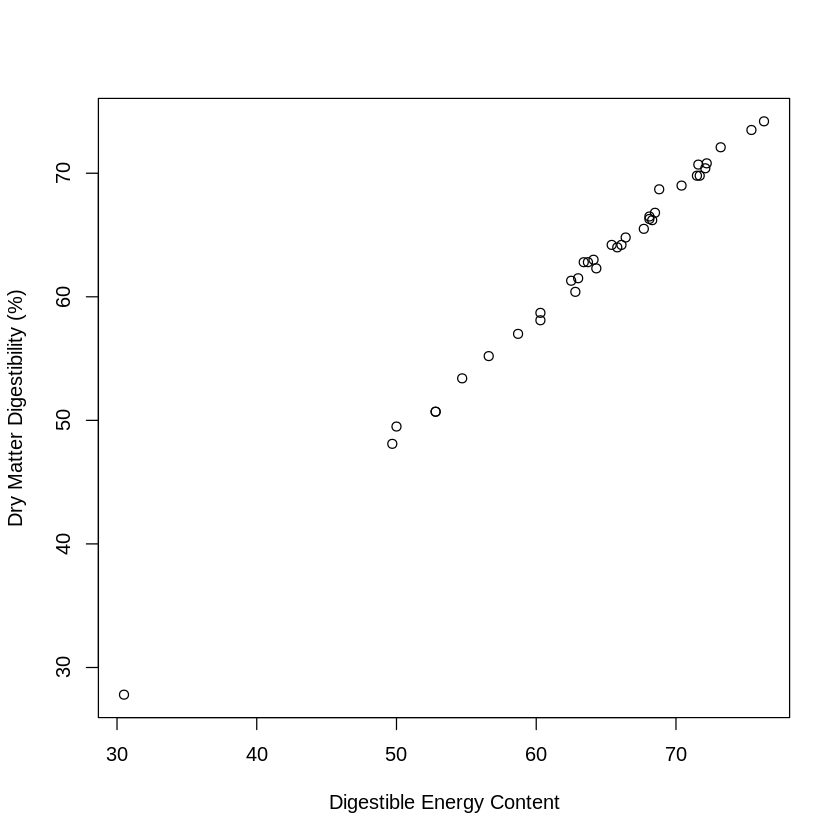

In [ ]:
plot(ruminant$EnergyDigest ~ ruminant$DryMatterDigest,
      xlab="Digestible Energy Content",
      ylab="Dry Matter Digestibility (%)")

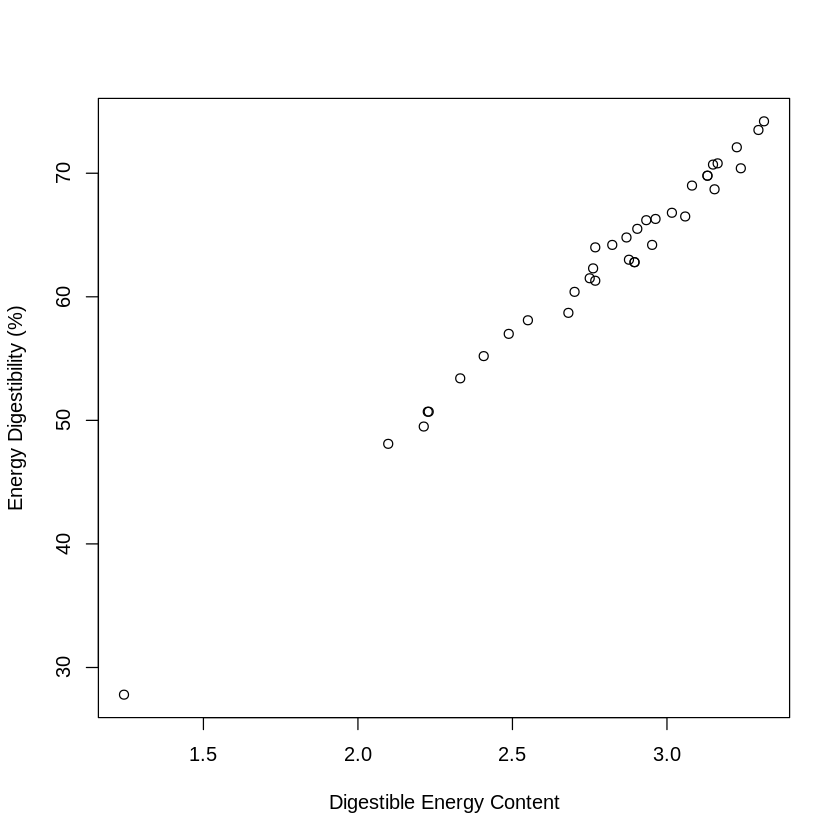

In [ ]:
plot(ruminant$EnergyDigest ~ ruminant$Energy,
      xlab="Digestible Energy Content",
      ylab="Energy Digestibility (%)")

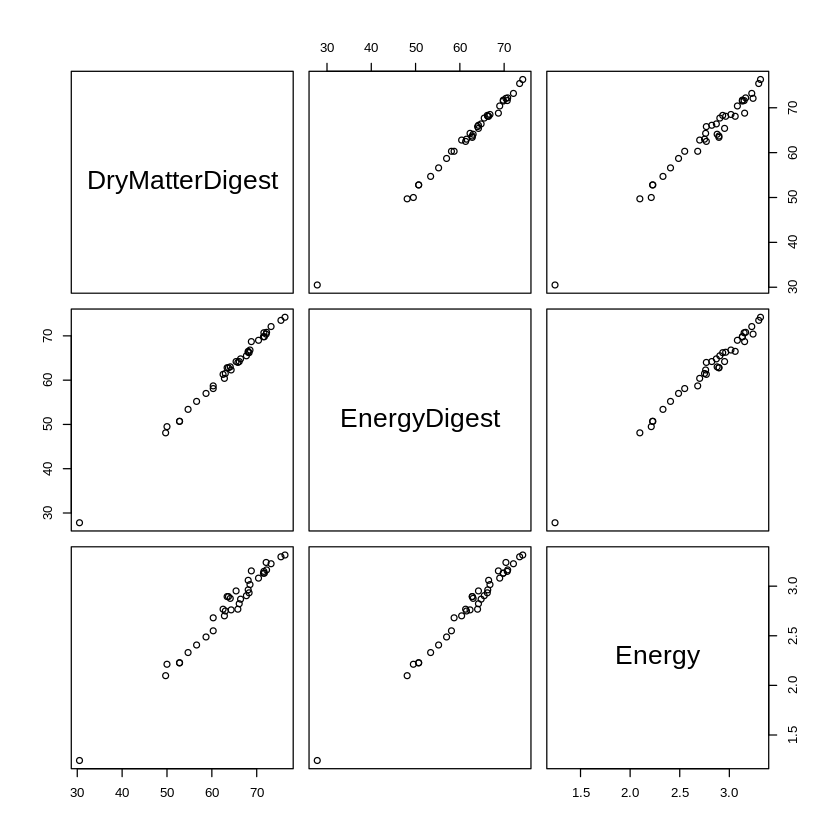

In [ ]:
pairs(ruminant)

- Phần lớn các điểm nằm gần nhau ở phía trên bên phải biểu đồ, cho thấy dữ liệu có mật độ tập trung cao ở vùng này.
- Đồ thị thể hiện mối quan hệ đồng biến và tuyến tính giữa EnergyDigest với DryMatterDigest và Energy.

## Part 2:

In [ ]:
cor(ruminant)

,DryMatterDigest,EnergyDigest,Energy
DryMatterDigest,1.0000000,0.9982228,0.9891837
EnergyDigest,0.9982228,1.0000000,0.9937236
Energy,0.9891837,0.9937236,1.0000000


- Hệ số tương quan dương và gần 1, chứng tỏ cả ba biến đều có tương quan dương rất mạnh với nhau. Điều này cho thấy các biến có mối quan hệ tuyến tính gần như hoàn hảo.
- Tuy nhiên, tương quan quá cao (gần 1) có thể gây ra hiện tượng đa cộng tuyến (multicollinearity) trong mô hình hồi quy, làm ảnh hưởng đến ước lượng tham số.

## Part 3:

In [ ]:
basicModel <- lm(EnergyDigest ~ DryMatterDigest + Energy, ruminant)
summary(basicModel)


Call:
lm(formula = EnergyDigest ~ DryMatterDigest + Energy, data = ruminant)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82585 -0.24881 -0.07536  0.21605  0.78055 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.07937    0.51148  -2.110   0.0425 *  
DryMatterDigest  0.71780    0.04968  14.450 7.91e-16 ***
Energy           6.28508    1.05307   5.968 1.06e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3864 on 33 degrees of freedom
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9982 
F-statistic:  9645 on 2 and 33 DF,  p-value: < 2.2e-16


- Hệ số chặn: P-value = 0.0425 (< 0.05) nên hệ số này có ý nghĩa thống kê ở mức 5%.
- P-value của DryMatterDigest và Energy rất nhỏ, chứng tỏ chúng có ảnh hưởng mạnh và ý nghĩa thống kê trong mô hình.
- Multiple R-squared: 0.9983
Mô hình giải thích 99.83% phương sai của biến phụ thuộc EnergyDigest.
Đây là giá trị rất cao, cho thấy mô hình phù hợp rất tốt với dữ liệu.
- Adjusted R-squared: 0.9982
Đã điều chỉnh cho số lượng biến độc lập trong mô hình. Giá trị này gần bằng R-squared, chứng tỏ mô hình không bị ảnh hưởng quá nhiều bởi số biến đưa vào.
- Giá trị phần dư dao động trong khoảng: [-0.82585, 0.78055].
Trung vị phần dư rất gần 0 (−0.07536), cho thấy phần dư phân bố cân đối quanh đường hồi quy.

In [ ]:
vif(basicModel)

DryMatterDigest          Energy 
       46.47797        46.47797

Cả hai biến đều có VIF > 10, cho thấy đa cộng tuyến nghiêm trọng.

In [ ]:
reducedModel <- lm(EnergyDigest ~ DryMatterDigest, data = ruminant)
summary(reducedModel)


Call:
lm(formula = EnergyDigest ~ DryMatterDigest, data = ruminant)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80528 -0.39686 -0.06193  0.36932  1.42826 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.29024    0.66703  -3.433  0.00159 ** 
DryMatterDigest  1.01108    0.01035  97.672  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5489 on 34 degrees of freedom
Multiple R-squared:  0.9964,	Adjusted R-squared:  0.9963 
F-statistic:  9540 on 1 and 34 DF,  p-value: < 2.2e-16


In [ ]:
anova(reducedModel, basicModel)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,34,10.24508,NA,NA,NA,NA
2,33,4.92688,1,5.318199,35.62103,1.058886e-06


# Part 4:

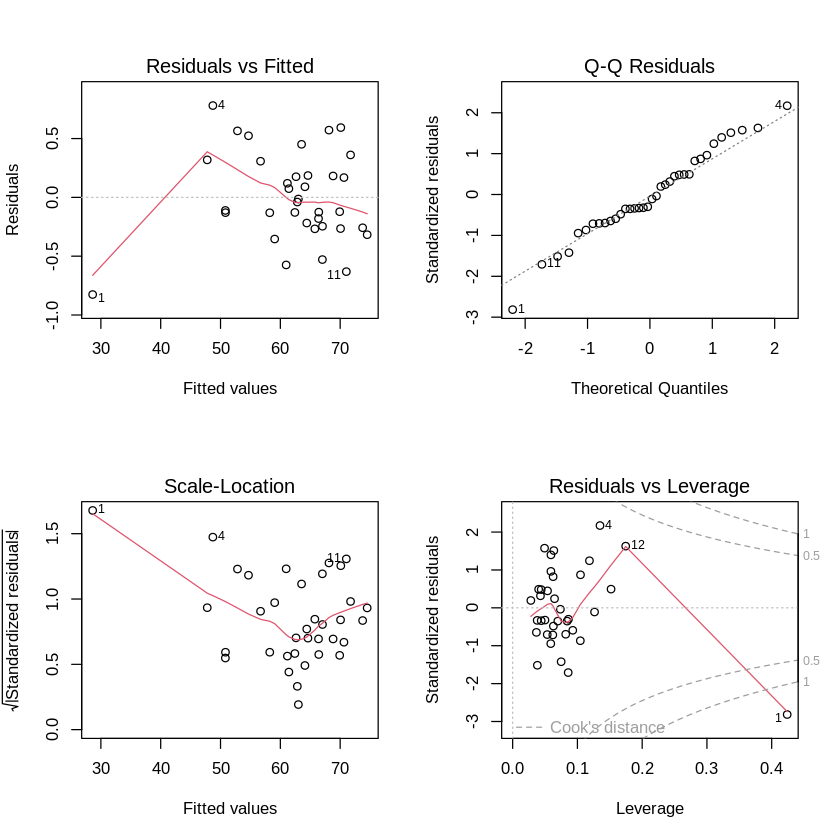

In [ ]:
par(mfrow=c(2,2))
plot(basicModel)

In [ ]:
ncvTest(basicModel)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 5.505605, Df = 1, p = 0.018956

In [ ]:
newModel <- lm(log(EnergyDigest) ~ DryMatterDigest + Energy, data = ruminant)
summary(newModel)


Call:
lm(formula = log(EnergyDigest) ~ DryMatterDigest + Energy, data = ruminant)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146990 -0.010357  0.006593  0.018562  0.045732 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.896993   0.045967  63.024  < 2e-16 ***
DryMatterDigest 0.015001   0.004464   3.360  0.00198 ** 
Energy          0.094532   0.094639   0.999  0.32513    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03473 on 33 degrees of freedom
Multiple R-squared:  0.9638,	Adjusted R-squared:  0.9617 
F-statistic: 439.9 on 2 and 33 DF,  p-value: < 2.2e-16


In [ ]:
anova(newModel, basicModel)

Warning message in anova.lmlist(object, ...):
“models with response ‘"EnergyDigest"’ removed because response differs from model 1”


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
DryMatterDigest,1,1.059629740,1.059629740,878.7542351,2.314357e-25
Energy,1,0.001203098,0.001203098,0.9977332,3.251280e-01
Residuals,33,0.039792447,0.001205832,NA,NA


# **BÀI 3.13 - Phạm Quang Hưng**

An experiment was conducted [30] with the goal of maximizing meadowfoam flower production. The data and a more detailed description are provided in Problem 2.15 (data set: flowers). In that earlier problem, a linear regression model was fitted to the given data.
1. Perform a diagnostic analysis of the fitted linear regression model.
2. Identify any influential observations or outliers.
3. Interpret the final model.

In [ ]:
install.packages("GLMsData")
library(GLMsData)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data(flowers)
df <- flowers
df %>% head

,Flowers,Light,Timing
,<dbl>,<int>,<fct>
1,62.4,150,PFI
2,77.1,150,PFI
3,77.7,150,Before
4,75.4,150,Before
5,55.7,300,PFI
6,54.2,300,PFI


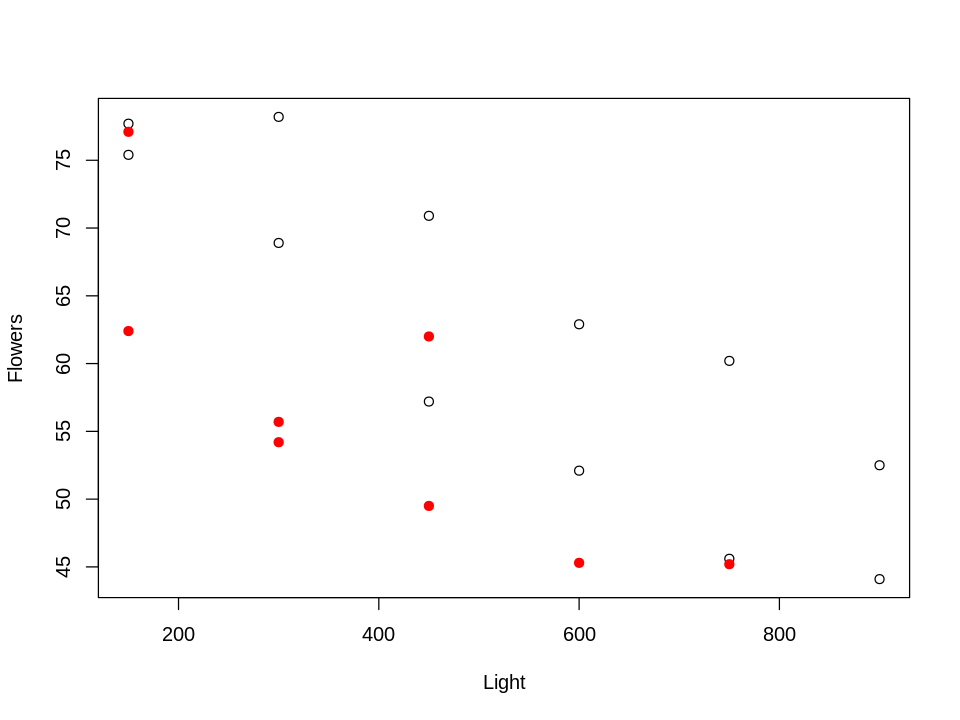

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
plot(Flowers ~ Light, data=df[df$Timing=="Before",])
points(Flowers ~ Light, data=df[df$Timing=="PFI",], col="red", pch=19)

In [ ]:
model = lm(Flowers ~ Light + Timing, data=df)
model %>% summary


Call:
lm(formula = Flowers ~ Light + Timing, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08


In [ ]:
rstd = rstandard(model)
pred = fitted(model)
lev = hatvalues(model)
cook = cooks.distance(model)
dfb = dfbeta(model)
dff = dffits(model)
cvr = covratio(model)

In [ ]:
n = nrow(df)
p = length(coef(model))

## Diagnostic
Phân tích Residual vs biến Light và vs Fitted values: mẫu quá nhỏ không đánh giá được variance.
- Vs light: non-linear.
- Vs fitted values: ko có trend.

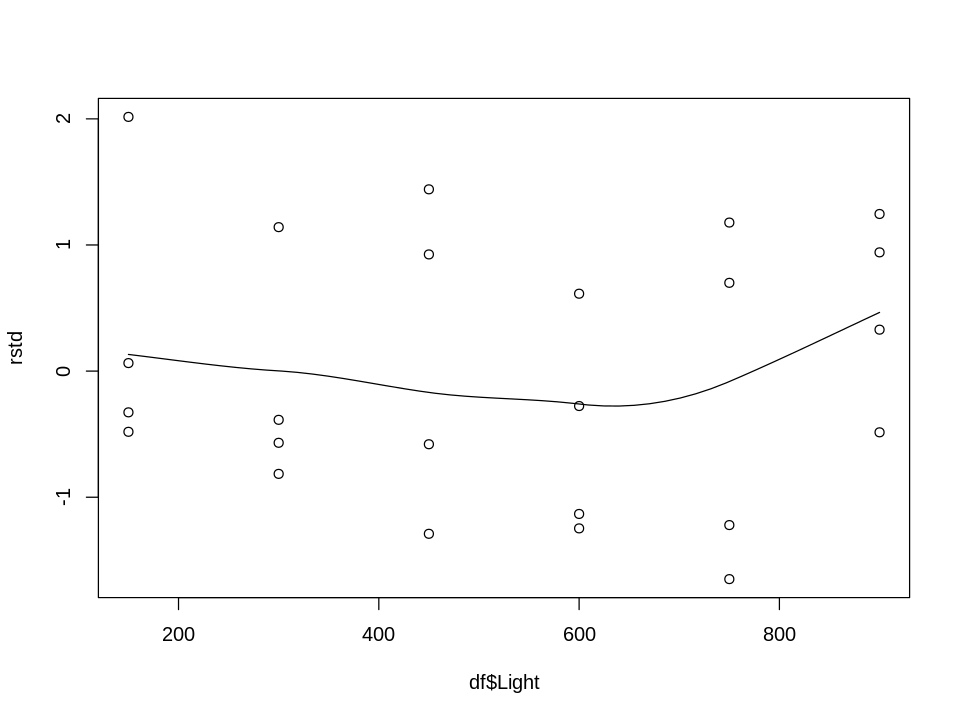

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
scatter.smooth(rstd ~ df$Light)

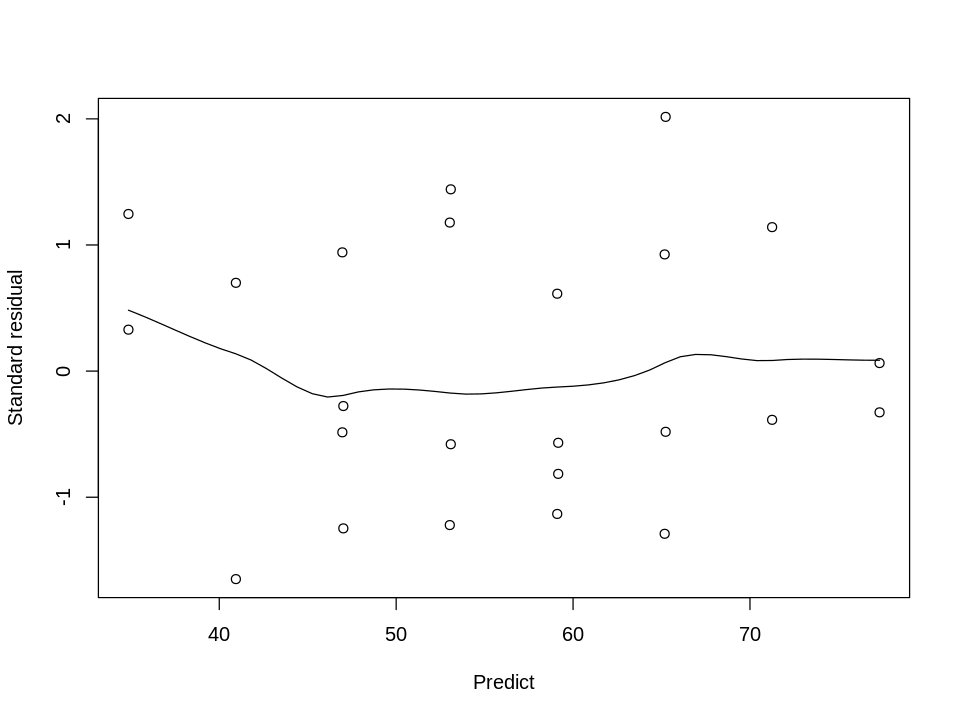

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
scatter.smooth(rstd ~ pred, ylab='Standard residual', xlab='Predict')

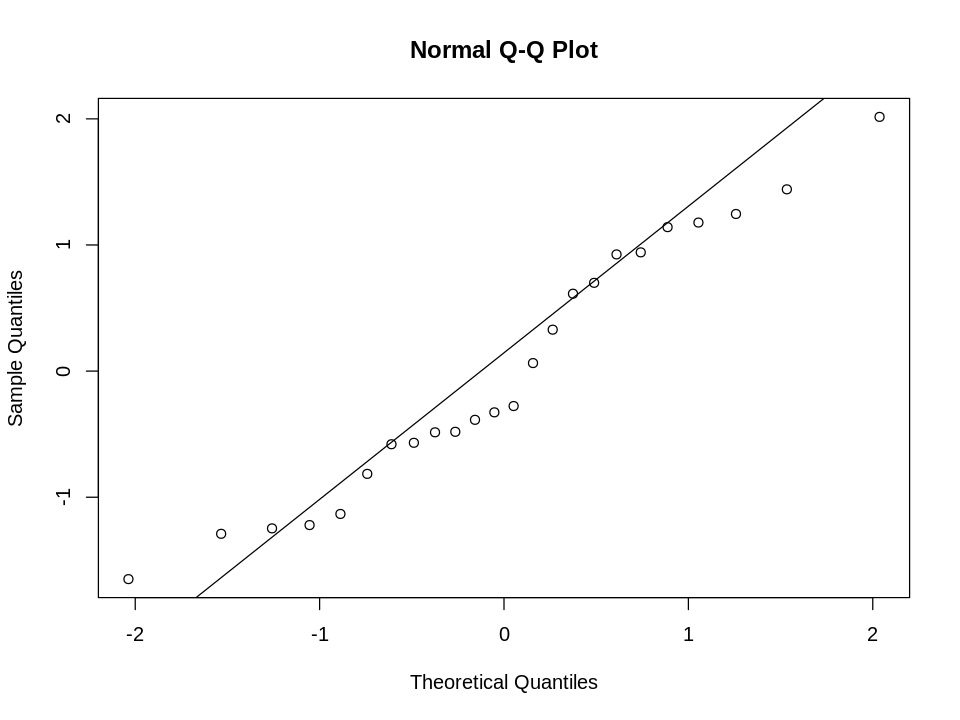

In [ ]:
qqnorm(rstd)
qqline(rstd)

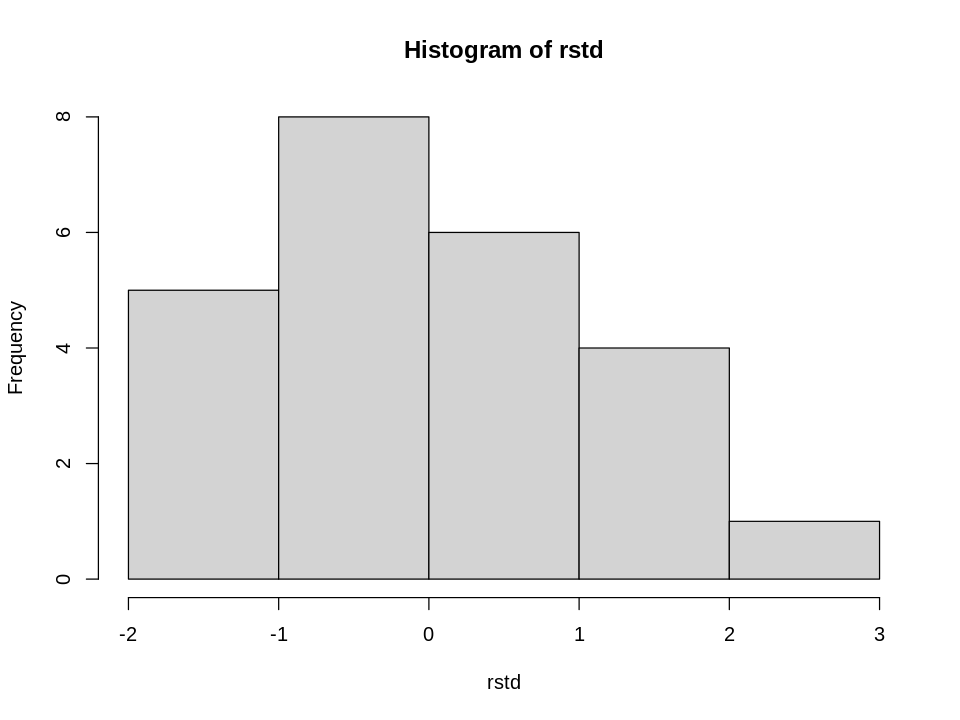

In [ ]:
hist(rstd, breaks=4)

In [ ]:
shapiro.test(rstd)
# H0: normal distributed
# p-value < 0.05: reject H0


	Shapiro-Wilk normality test

data:  rstd
W = 0.95343, p-value = 0.3209


p-value > 0.05

## Outlier

2 
2.015632

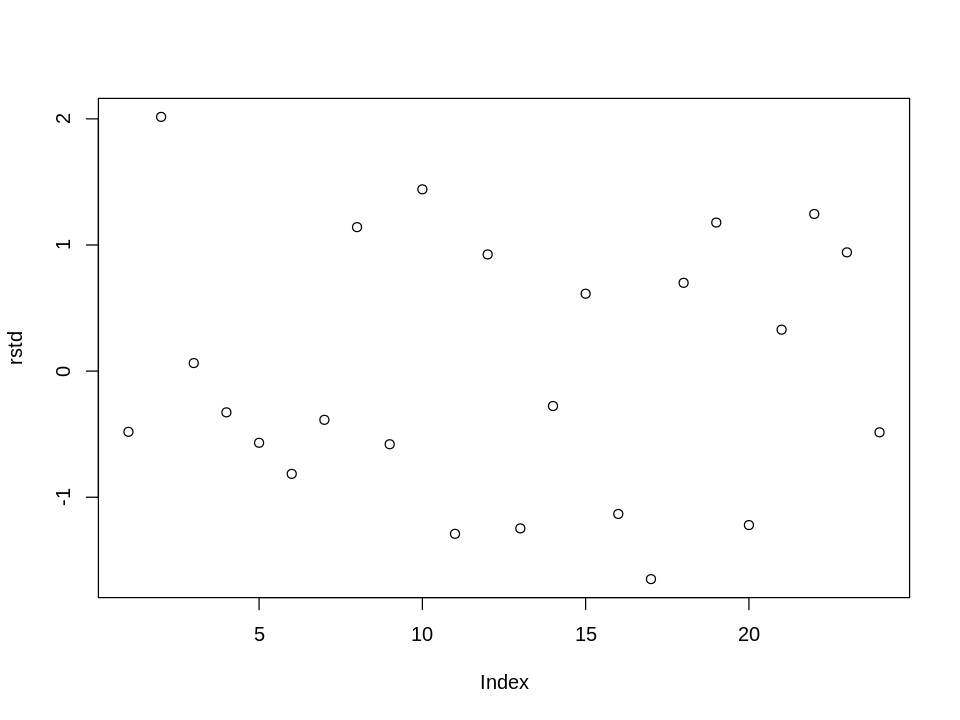

In [ ]:
rstd[abs(rstd) > 2]
plot(rstd)

## Influence


In [ ]:
n = nrow(df)
p = length(coef(model))

In [ ]:
rstd = rstandard(model)
pred = fitted(model)
lev = hatvalues(model)
cook = cooks.distance(model)
dfb = dfbeta(model)
dff = dffits(model)
covr = covratio(model)

In [ ]:
lev_thresh = 3 * p / n
cook_thresh = 4 / (n - p)
dfb_thresh = 2 / sqrt(n)
dff_thresh = 2 * sqrt(p / n)
covr_lower = 1 - (3 * p / n)
covr_upper = 1 + (3 * p / n)

In [ ]:
cook[cook > cook_thresh]

2 
0.282543

In [ ]:
max_abs_dfb <- apply(dfb, 1, function(x) max(abs(x)))

# Determine which observations violate thresholds
is_high_lev <- lev > lev_thresh
is_high_cook <- cook > cook_thresh
is_high_dfb <- max_abs_dfb > dfb_thresh
is_high_dff <- abs(dff) > dff_thresh
is_high_covr <- (covr < covr_lower) | (covr > covr_upper)

# Combine into a single data frame
influence_df <- data.frame(
    Observation = seq_len(n),
    Leverage = lev,
    CooksDistance = cook,
    MaxAbsDFBETA = max_abs_dfb,
    DFFITS = dff,
    COVRATIO = covr,
    HighLeverage = is_high_lev,
    HighCooksDistance = is_high_cook,
    HighDFBETA = is_high_dfb,
    HighDFFITS = is_high_dff,
    HighCOVRATIO = is_high_covr
)

# Add a column that flags any influential observation
influence_df$Influential <- with(
    influence_df,
    HighLeverage | HighCooksDistance | HighDFBETA | HighDFFITS | HighCOVRATIO
)

# Print the resulting data frame
influence_df
    %>% select(-HighLeverage, -HighCooksDistance, -HighDFBETA, -HighDFFITS, -HighCOVRATIO)
    %>% head

,Observation,Leverage,CooksDistance,MaxAbsDFBETA,DFFITS,COVRATIO,Influential
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1,0.1726190,0.0161156718,0.42814748,-0.21577429,1.3533350,TRUE
2,2,0.1726190,0.2825429860,1.79271583,1.00045311,0.7340597,TRUE
3,3,0.1726190,0.0002812894,0.09427458,0.02835205,1.3983356,TRUE
4,4,0.1726190,0.0074404743,0.48486211,-0.14617578,1.3778680,TRUE
5,5,0.1154762,0.0140639780,0.32600942,-0.20201697,1.2492565,FALSE
6,6,0.1154762,0.0288996259,0.46732840,-0.29200480,1.1884775,TRUE


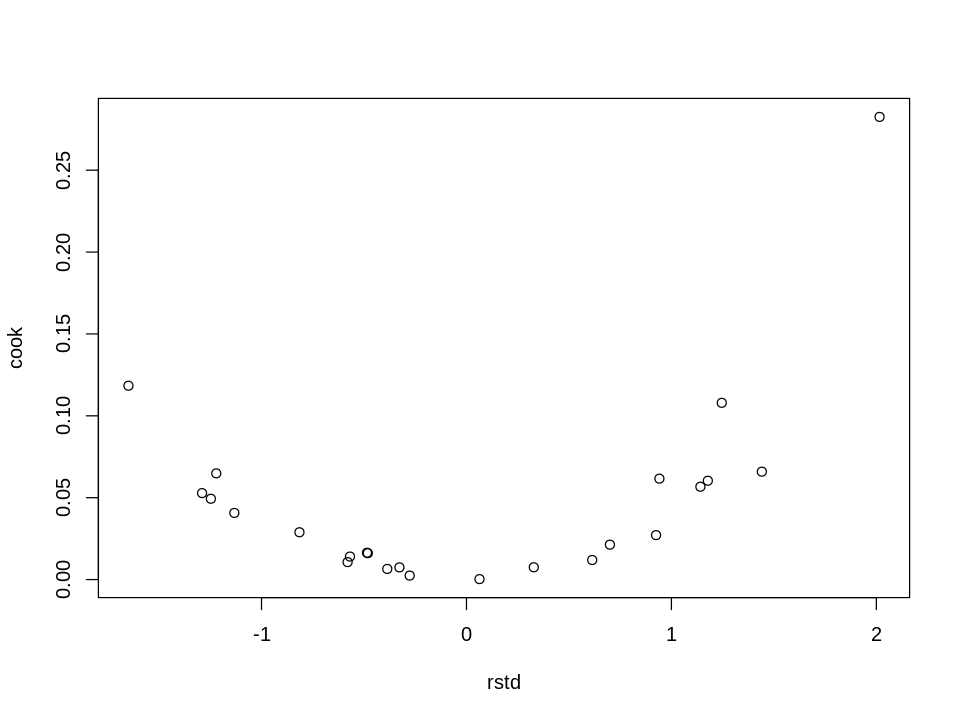

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
plot(cook ~ rstd)

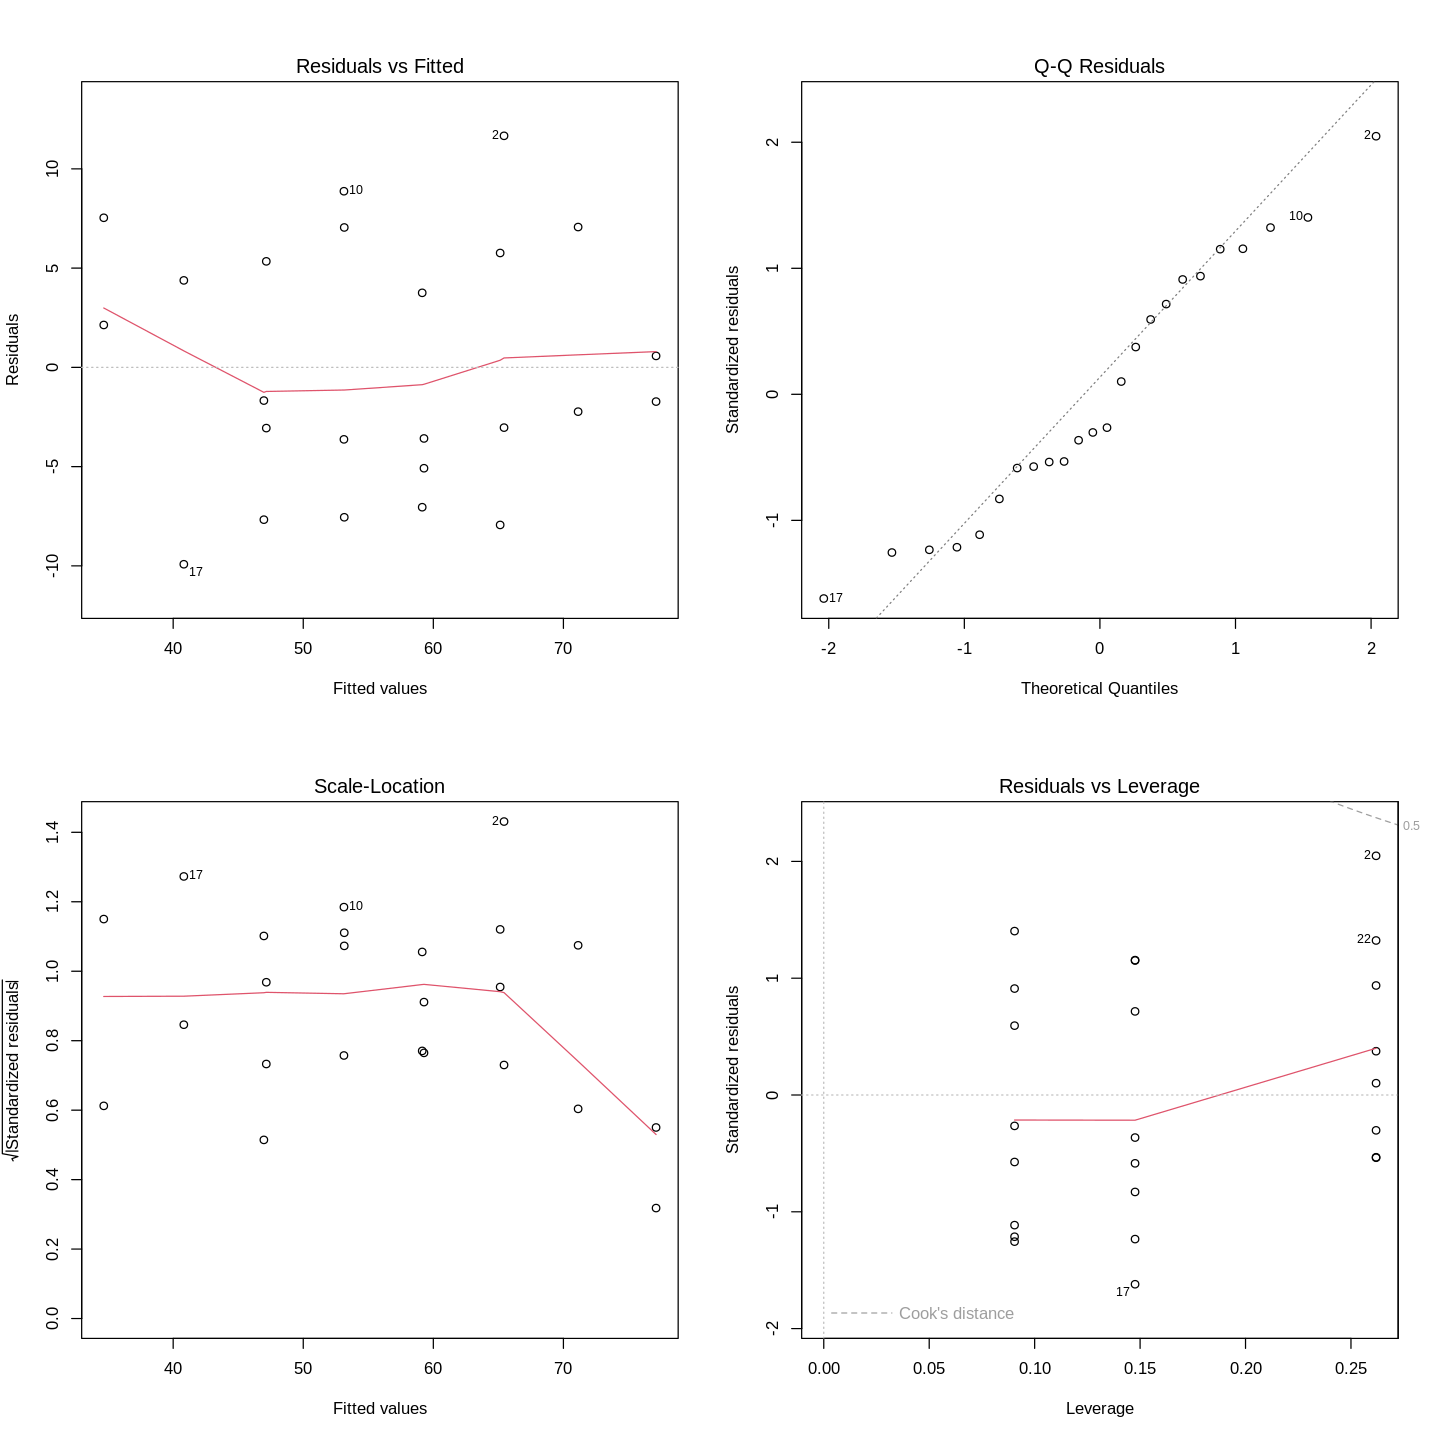

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,2))
plot(model)

## Colinearity
Không đánh giá do 2 biến phụ thuộc là numerical và binary.

## Remove outlier

In [ ]:
df2 = df[-2, ]
model2 = lm(Flowers ~ Light + Timing, data=df2)
model2 %>% summary


Call:
lm(formula = Flowers ~ Light + Timing, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6128 -3.5676 -0.6451  4.4745 10.3645 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  81.606451   3.135884  26.023  < 2e-16 ***
Light        -0.037076   0.004995  -7.422 3.64e-07 ***
TimingPFI   -13.286811   2.491968  -5.332 3.22e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.956 on 20 degrees of freedom
Multiple R-squared:  0.8171,	Adjusted R-squared:  0.7988 
F-statistic: 44.67 on 2 and 20 DF,  p-value: 4.192e-08


In [ ]:
model %>% summary


Call:
lm(formula = Flowers ~ Light + Timing, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08


In [ ]:
model %>% AIC
model2 %>% AIC

[1] 162.5441

[1] 152.1384

In [ ]:
model %>% BIC
model2 %>% BIC

[1] 167.2563

[1] 156.6804

In [ ]:
model2 %>% rstandard %>% shapiro.test


	Shapiro-Wilk normality test

data:  .
W = 0.96663, p-value = 0.6088


# **Bài 3.14 - Nguyễn Tùng Lâm (06/04/2002)**

Một nghiên cứu về tác dụng của mật ong Manuka trong việc chữa lành vết thương
đã sử dụng bộ dữ liệu thu thập được từ 20 vết thương của 17 cá nhân (Bảng 3.9; tập dữ liệu:
manuka).

1. Hãy vẽ biểu đồ phần trăm giảm kích thước vết thương trong 2 tuần so với
độ pH ban đầu.

2. Hãy khớp với phương trình hồi quy tương ứng và vẽ đường hồi quy
trên biểu đồ.

3. Viết mô hình hồi quy. Rồi diễn giải mô hình. (Điều này sẽ dẫn đến một
trong những kết luận chính của bài báo.)

Sau đó, một thông báo thu hồi đã được ban hành cho bài báo nêu rằng:
Các kết quả hồi quy được trình bày. . . chịu ảnh hưởng mạnh mẽ bởi một giá trị ngoại lệ cao. . . Khi các kết quả cho bệnh nhân này bị bỏ qua, mối liên hệ không còn
có ý nghĩa thống kê nữa. . . Vì mối quan hệ này đóng vai trò then chốt đối với các kết luận của
bài báo, nên người ta cho rằng lợi ích của việc chăm sóc bệnh nhân sẽ được phục vụ tốt nhất bằng cách thu hồi.

4. Thực hiện phân tích chẩn đoán mô hình được khớp ở trên. Xác định các quan sát có ảnh hưởng.

5. Chỉnh sửa lại mô hình hồi quy mà không có quan sát có ảnh hưởng này và viết
mô hình. Diễn giải mô hình và so sánh với diễn giải của bạn
về mô hình trước đó.

6. Vẽ đường hồi quy này trên biểu đồ được tạo ở trên. So sánh hai
đường hồi quy và bình luận.

## **Yêu cầu 1: Hãy vẽ biểu đồ phần trăm giảm kích thước vết thương trong 2 tuần so với độ pH ban đầu.**

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("GLMsData")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(GLMsData)
library(ggplot2)
data("manuka")
manuka

Aetiology,Duration,Size0,Size2,pH0,pH2
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
V,52,4.3,4.0,7.26,7.15
V,52,2.4,1.5,7.63,7.15
V,52,7.3,2.9,7.63,7.50
V,2,4.3,1.4,7.18,7.15
V,52,3.5,0.1,7.75,6.69
V,12,10.3,6.0,7.94,7.56
V,6,0.6,0.6,7.60,5.52
V,20,0.7,1.1,7.90,7.70
V,52,18.3,13.1,7.60,7.76


### Dữ liệu

Dữ liệu bao gồm 20 quan sát (từ 17 bệnh nhân) với 6 biến sau:

- **Aetiology:** Nguyên nhân gây ra vết thương, có thể là một trong ba loại:
  - **V** (Venous): Vết thương tĩnh mạch.
  - **A** (Arteria): Vết thương động mạch.
  - **M** (mixed): Vết thương hỗn hợp.
  - **P** (pressure ulcer): Loét do tì đè.

- **Duration:** Thời gian (tính bằng ngày) vết thương tồn tại.

- **Size0:** Kích thước của vết thương tại thời điểm ban đầu (khi bắt đầu điều trị). Đây là kích thước của vết thương tại thời điểm t=0.

- **Size2:** Kích thước của vết thương sau 2 tuần điều trị. Đây là kích thước của vết thương sau khi đã điều trị trong một khoảng thời gian (có thể là 2 tuần).

- **pH0:** Độ pH của vết thương tại thời điểm ban đầu (khi bắt đầu điều trị).

- **pH2:** Độ pH của vết thương sau 2 tuần điều trị. Độ pH này có thể thay đổi theo quá trình điều trị, phản ánh mức độ thay đổi trong môi trường vết thương.

### Chi tiết

Dữ liệu cho biết độ pH và kích thước vết thương của 20 vết thương ở chân dưới của 17 bệnh nhân, cung cấp 20 quan sát với 6 biến. Biến **Duration** không được giải thích hay sử dụng trong nghiên cứu.

### Nguồn

- Gethin, Cowman và Conroy (2008), Bảng 1.

Để tính và vẽ biểu đồ phần trăm giảm kích thước vết thương sau 2 tuần so với độ pH ban đầu $(pH0)$, ta cần tính phần trăm giảm theo công thức:

$$
\text{PercentageReduction} = \frac{\text{Size0} - \text{Size2}}{\text{Size0}} \times 100
$$

In [ ]:
# Tính phần trăm giảm kích thước vết thương
manuka$PercentageReduction <- ((manuka$Size0 - manuka$Size2) / manuka$Size0) * 100
manuka$PercentageReduction

[1]    6.976744   37.500000   60.273973   67.441860   97.142857   41.747573
 [7]    0.000000  -57.142857   28.415301  -12.422360   60.000000   17.500000
[13]    4.166667    5.405405   58.333333  -18.032787   45.762712  -42.857143
[19] -122.222222   -6.818182

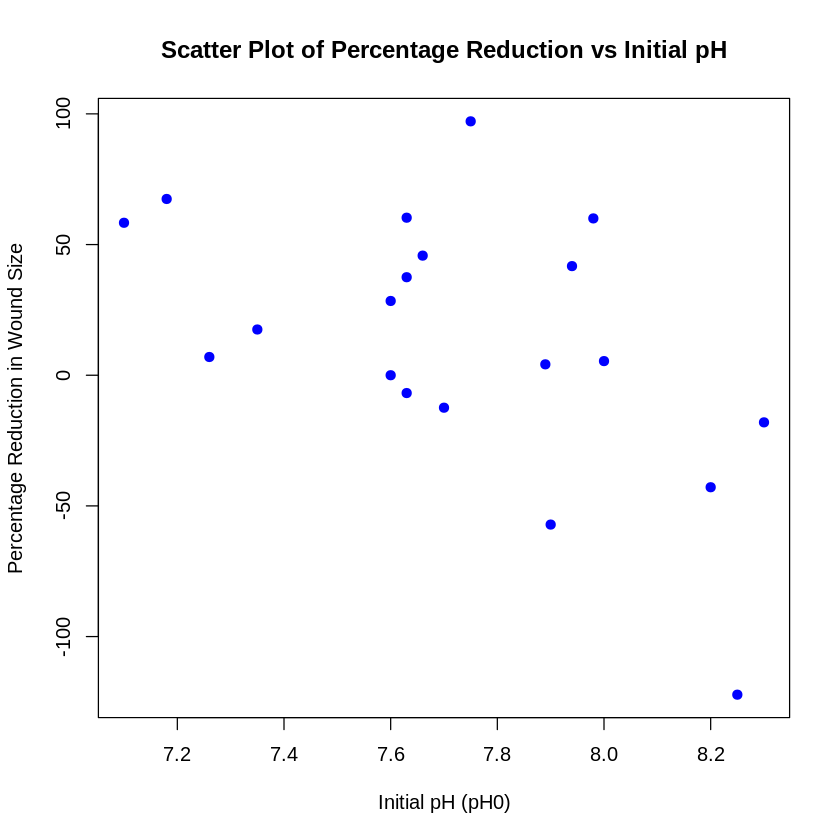

In [ ]:
# Vẽ biểu đồ
plot(manuka$pH0, manuka$PercentageReduction,
     xlab = "Initial pH (pH0)",
     ylab = "Percentage Reduction in Wound Size",
     main = "Scatter Plot of Percentage Reduction vs Initial pH",
     pch = 19, col = "blue")


`geom_smooth()` using formula = 'y ~ x'


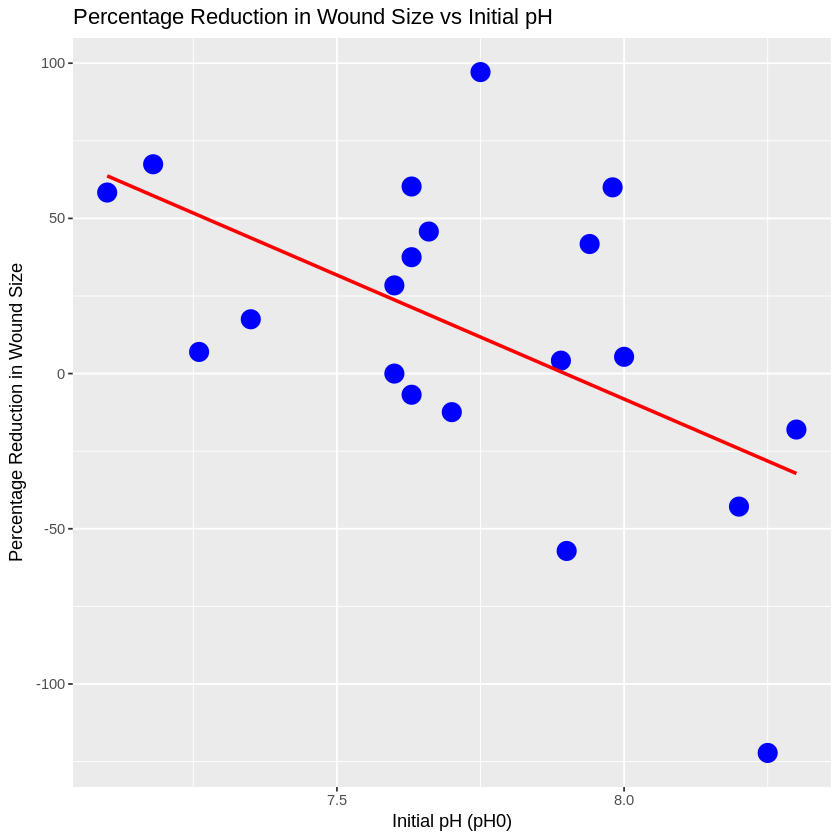

In [ ]:
library(ggplot2)
# Vẽ biểu đồ scatter plot
ggplot(manuka, aes(x = pH0, y = PercentageReduction)) +
  geom_point(color = "blue", size = 5) + # Các điểm trên đồ thị
  labs(
    title = "Percentage Reduction in Wound Size vs Initial pH",
    x = "Initial pH (pH0)",
    y = "Percentage Reduction in Wound Size"
  ) +
  geom_smooth(method = "lm", color = "red", se = FALSE) # Đường xu hướng

 ## **Yêu cầu 2: Hãy khớp với phương trình hồi quy tương ứng và vẽ đường hồi quy trên biểu đồ.**

In [ ]:
manuka$PercentageReduction

[1]    6.976744   37.500000   60.273973   67.441860   97.142857   41.747573
 [7]    0.000000  -57.142857   28.415301  -12.422360   60.000000   17.500000
[13]    4.166667    5.405405   58.333333  -18.032787   45.762712  -42.857143
[19] -122.222222   -6.818182

In [ ]:
# Bước 1: Phù hợp mô hình hồi quy tuyến tính
model <- lm(PercentageReduction ~ pH0, data = manuka)

# Kiểm tra kết quả mô hình
summary(model)


Call:
lm(formula = PercentageReduction ~ pH0, data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.031 -26.708   4.131  18.816  85.382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   631.01     227.47   2.774   0.0125 *
pH0           -79.90      29.41  -2.717   0.0141 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.47 on 18 degrees of freedom
Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2514 
F-statistic: 7.382 on 1 and 18 DF,  p-value: 0.01413


Trước tiên, phải kiểm tra xem phần dư có phân phối chuẩn hay không, chuẩn thì mô hình mới có ý nghĩa

In [ ]:
model$residuals

1          2          3          4          5          6          7 
-43.936407  16.150923  38.924896  10.136477  85.382129  45.168396 -23.746164 
         8          9         10         11         12         13         14 
-56.918150   4.669137 -28.178234  66.616939 -26.221890   3.592345  13.620403 
        15         16         17         18         19         20 
 -5.364282  14.153082  26.810722 -18.661565 -94.031499 -28.167259

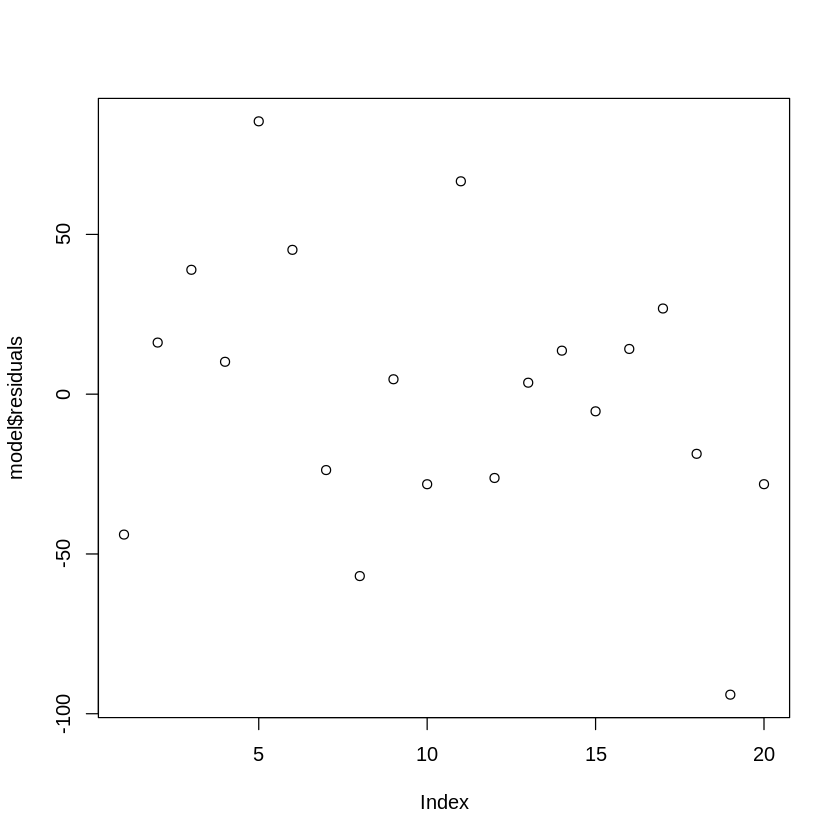

In [ ]:
plot(model$residuals)

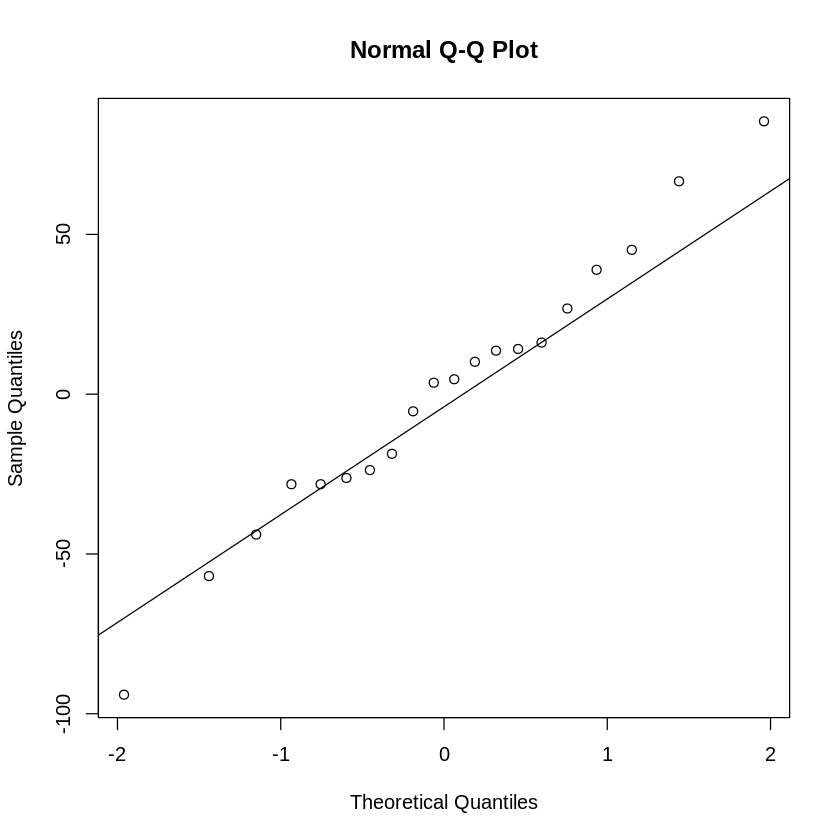

In [ ]:
qqnorm(model$residuals)
qqline(model$residuals)

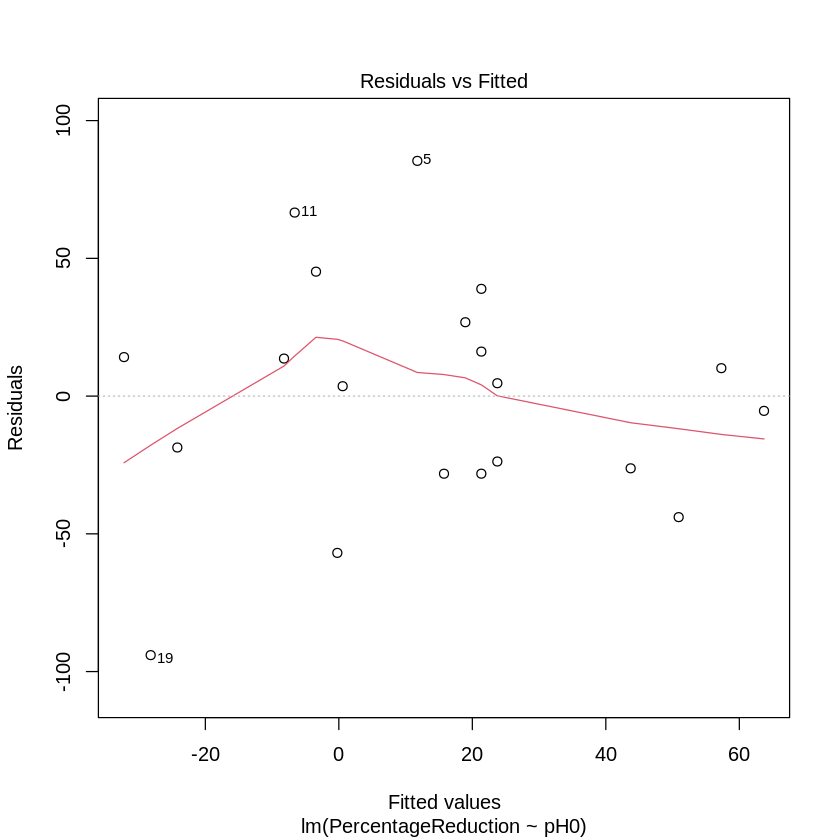

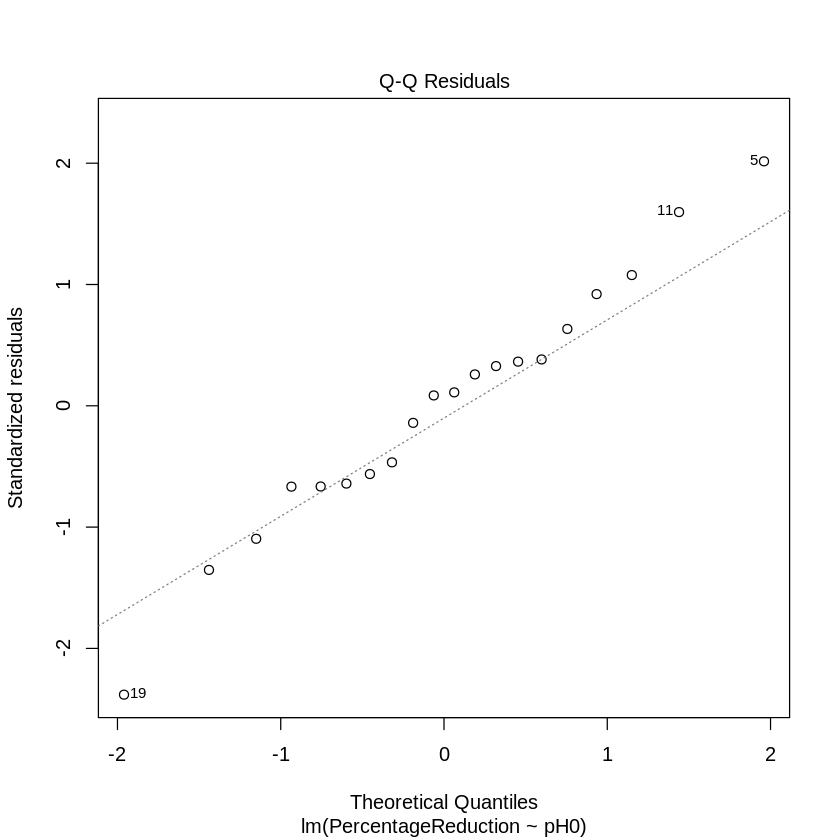

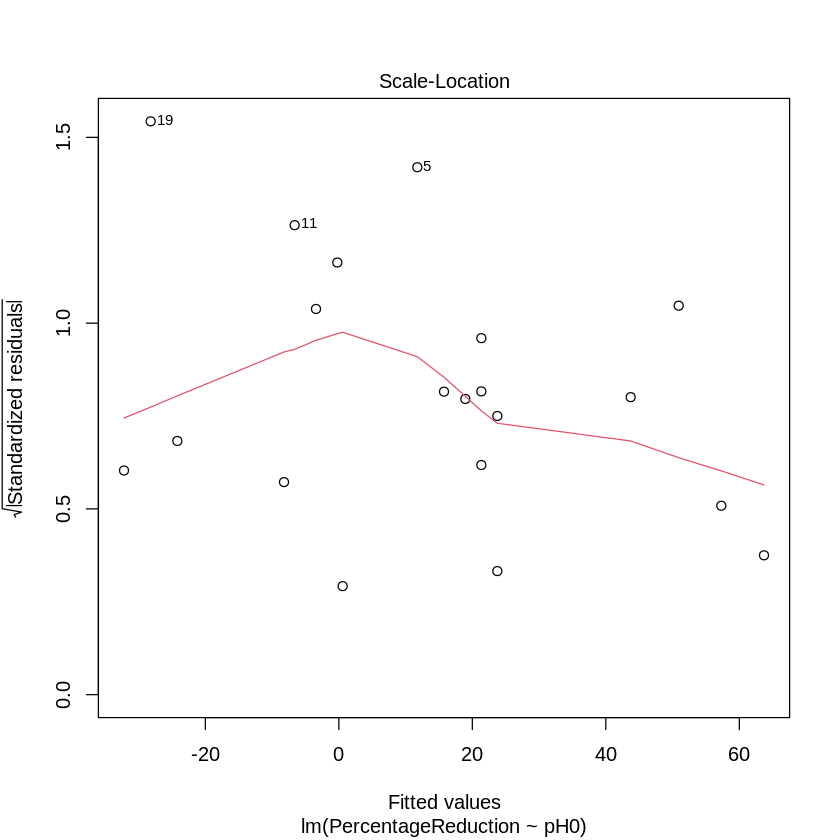

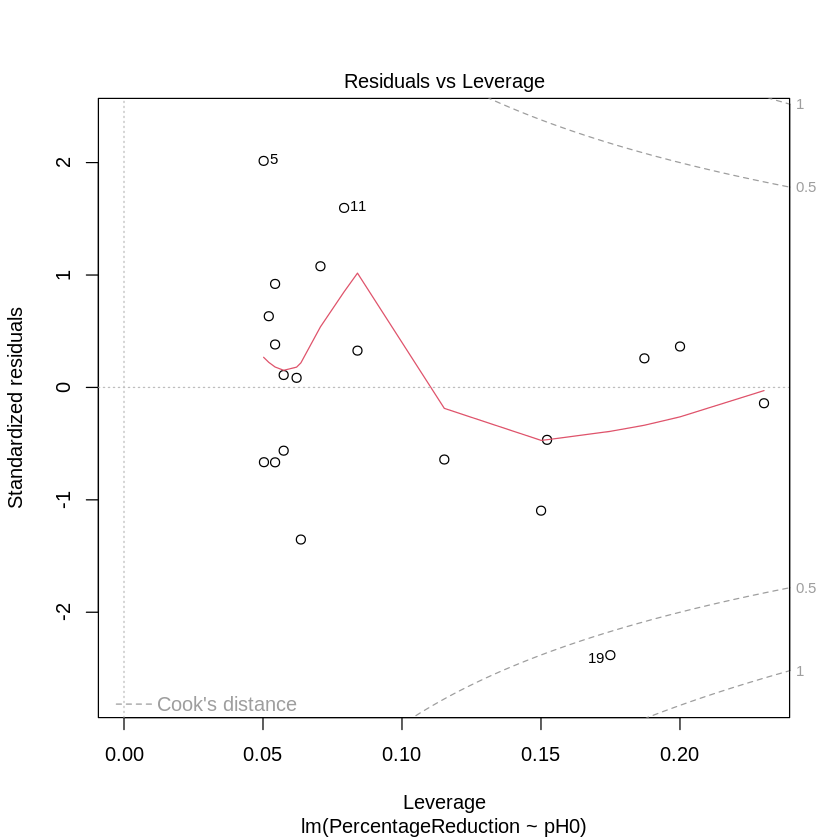

In [ ]:
plot(model)

In [ ]:
shapiro.test(model$residuals)   #W = 0.98654, p-value =  0.9894
                            #p > 0.05 => đây là phân phối chuẩn (ko bác bỏ giả thuyết H0)


	Shapiro-Wilk normality test

data:  model$residuals
W = 0.98654, p-value = 0.9894


`geom_smooth()` using formula = 'y ~ x'


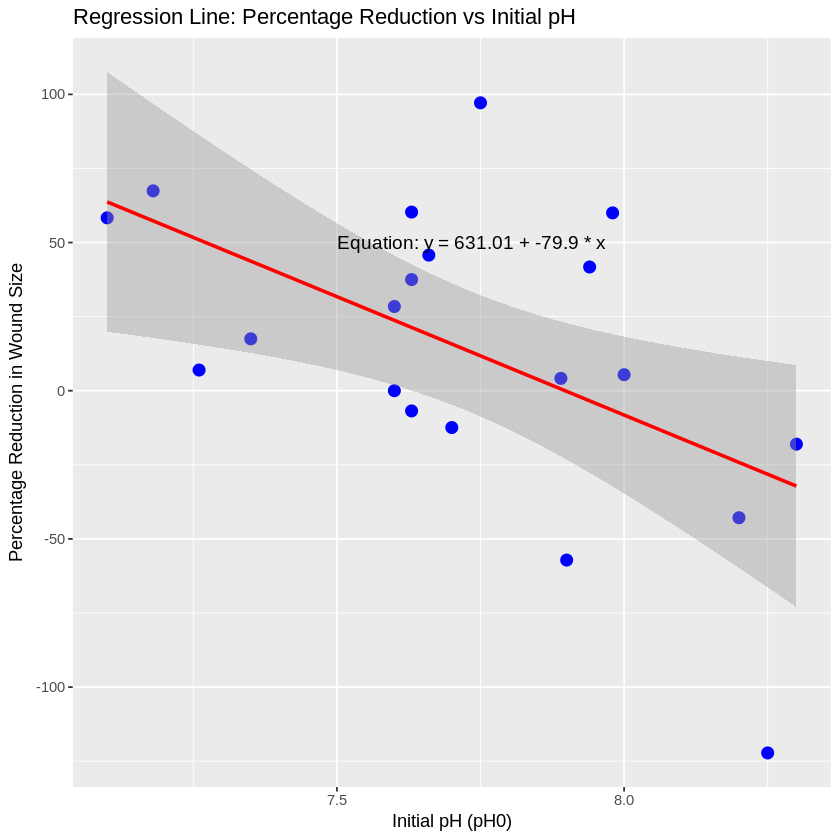

In [ ]:
# Bước 2: Vẽ biểu đồ và thêm đường hồi quy
library(ggplot2)
ggplot(manuka, aes(x = pH0, y = PercentageReduction)) +
  geom_point(color = "blue", size = 3) + # Điểm trên biểu đồ
  labs(
    title = "Regression Line: Percentage Reduction vs Initial pH",
    x = "Initial pH (pH0)",
    y = "Percentage Reduction in Wound Size"
  ) +
  geom_smooth(method = "lm", color = "red", se = TRUE) + # Đường hồi quy với dải sai số
  annotate("text", x = 7.5, y = 50, label = paste("Equation: y =",
    round(coef(model)[1], 2), "+", round(coef(model)[2], 2), "* x"),
    color = "black", size = 4, hjust = 0)

 ## **Yêu cầu 3: Viết mô hình hồi quy. Rồi diễn giải mô hình. (Điều này sẽ dẫn đến một trong những kết luận chính của bài báo.)**

In [ ]:
# Bước 1: Phù hợp mô hình hồi quy tuyến tính
model <- lm(PercentageReduction ~ pH0, data = manuka)

# Kiểm tra kết quả mô hình
summary(model)


Call:
lm(formula = PercentageReduction ~ pH0, data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.031 -26.708   4.131  18.816  85.382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   631.01     227.47   2.774   0.0125 *
pH0           -79.90      29.41  -2.717   0.0141 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.47 on 18 degrees of freedom
Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2514 
F-statistic: 7.382 on 1 and 18 DF,  p-value: 0.01413


Mô hình hồi quy được tạo ra từ việc áp dụng hồi quy tuyến tính với hàm **lm(PercentageReduction ~ pH0, data = manuka)**. Phương trình hồi quy sẽ có dạng:

$$
\text{PercentageReduction} = 631.01 - 79.90 \cdot \text{pH0}
$$

Trong đó:
- Hằng số ($\beta_0 = 631.01$): Khi pH ban đầu **pH0** bằng 0, phần trăm giảm kích thước vết thương sẽ là 631.01%.
- Hệ số góc ($\beta_1 = -79.90$): Với mỗi đơn vị tăng của **pH0**, phần trăm giảm kích thước vết thương giảm đi 79.90%.



phần **residuals (phần dư)** biểu diễn sự chênh lệch giữa **giá trị thực tế**
 **$y$** và **giá trị dự đoán** **$\hat{y}$** từ mô hình.


$$
\text{Residual} = y - \hat{y}
$$

Như vừa chứng minh ở phần trước, Residual tuân theo phân phối chuẩn, nên mô hình có ý nghĩa thống kê và sử dụng được

### GIẢI THÍCH 0:

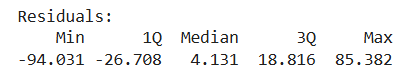

$$
\begin{array}{|c|c|}
\hline
\textbf{Thống kê} & \textbf{Ý nghĩa} \\
\hline
\text{Min} & \text{Giá trị phần dư nhỏ nhất } (-94.031), \text{ cho thấy mô hình dự đoán cao hơn thực tế lớn nhất là } 94.031. \\
\hline
\text{1Q} & \text{Giá trị phần dư tại phân vị thứ nhất } (-26.708), \text{ tức là 25% các phần dư nhỏ hơn giá trị này.} \\
\hline
\text{Median} & \text{Giá trị trung vị của phần dư } (4.131), \text{ cho thấy phần lớn sai số tập trung gần giá trị này.} \\
\hline
\text{3Q} & \text{Giá trị phần dư tại phân vị thứ ba } (18.816), \text{ tức là 75% các phần dư nhỏ hơn giá trị này.} \\
\hline
\text{Max} & \text{Giá trị phần dư lớn nhất } (85.382), \text{ cho thấy mô hình dự đoán thấp hơn thực tế lớn nhất là } 85.382. \\
\hline
\end{array}
$$


### GIẢI THÍCH 1:

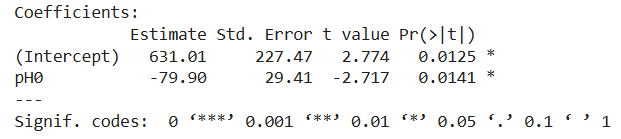

#### 1. **(Intercept)** và **pH0**:
   - **(Intercept)** là hệ số chặn **(intercept)**, tương ứng với giá trị **$y$** khi **pH0 = 0**.
     $$\hat{y} = \beta_0 + \beta_1 \cdot \text{pH0}$$
     Khi **pH0 = 0**, giá trị dự đoán của **$y$** là **$\beta_0$** (hệ số chặn).
   - **pH0** là hệ số hồi quy tương ứng với biến độc lập **pH0** (đo pH tại thời điểm ban đầu).
     $$\hat{y} = \beta_0 + \beta_1 \cdot \text{pH0}$$
     Đây là mối quan hệ tuyến tính giữa **pH0** và **$y$**, trong đó **$\beta_1$** là hệ số của **pH0**.

#### 2. **Estimate** (Ước lượng):
   - **(Intercept)**: 631.01 — Đây là ước lượng của hệ số chặn trong mô hình, nghĩa là khi **pH0** bằng 0, giá trị dự đoán của **$y$** là 631.01.
     $$\hat{y} = 631.01 + (-79.90) \cdot \text{pH0}$$
     Giá trị này cho biết **$y$** khi **pH0 = 0**.
   - **pH0**: -79.90 — Đây là ước lượng hệ số của **pH0**. Điều này có nghĩa là mỗi lần **pH0** tăng lên 1 đơn vị, giá trị của **$y$** sẽ giảm đi 79.90 đơn vị.
     $$\hat{y} = 631.01 + (-79.90) \cdot \text{pH0}$$
     Mối quan hệ này cho thấy sự thay đổi của **$y$** khi **pH0** thay đổi.

#### 3. **Std. Error**:
   - **(Intercept)**: 227.47 — Std. Error của hệ số chặn, đo độ không chắc chắn trong việc ước lượng hệ số này.
   - **pH0**: 29.41 — Std. Error của hệ số **pH0**, cho biết mức độ chính xác của ước lượng này.

#### 4. **t value** (Giá trị t):
   - **(Intercept)**: 2.774 — Giá trị t dùng để kiểm định giả thuyết **$H_0$: hệ số chặn = 0**. Giá trị t càng lớn, chứng tỏ hệ số ước lượng có ý nghĩa thống kê càng cao.
     $$t_{\beta_0} = \frac{\beta_0}{SE_{\beta_0}} = \frac{631.01}{227.47} = 2.774$$
   - **pH0**: -2.717 — Giá trị t kiểm tra giả thuyết **$H_0$: hệ số của pH0 = 0**. Một giá trị tuyệt đối lớn cho thấy **pH0** có ảnh hưởng đáng kể đến **$y$**.
     $$t_{\beta_1} = \frac{-79.90}{29.41} = -2.717$$

#### 5. **Pr(>|t|)** (Giá trị p):
   - **(Intercept)**: 0.0125 — Giá trị p của hệ số chặn. Giá trị p nhỏ hơn 0.05, cho thấy hệ số này có ý nghĩa thống kê.
     $$p_{\beta_0} = P(|t_{\beta_0}| \geq |2.774|) = 0.0125$$
   - **pH0**: 0.0141 — Giá trị p của hệ số **pH0**. Cũng nhỏ hơn 0.05, chứng tỏ **pH0** có ảnh hưởng đáng kể đến **$y$**.
     $$p_{\beta_1} = P(|t_{\beta_1}| \geq |-2.717|) = 0.0141$$

#### 6. **Significance Codes** (Mã mã hóa ý nghĩa thống kê):
   - Các mã hóa ý nghĩa thống kê cho giá trị p:
     - ‘***’: Ý nghĩa rất cao ($p < 0.001$).
     - ‘**’: Ý nghĩa cao ($p < 0.01$).
     - ‘*’: Ý nghĩa (**$p < 0.05$**).
     - ‘.’: Ý nghĩa yếu (**$p < 0.1$**).
     - ‘ ’: Không có ý nghĩa (**$p \geq 0.1$**).

#### Tóm lại:
- **Hệ số chặn** có ý nghĩa thống kê (**$p = 0.0125$**), cho thấy khi **$pH0 = 0$**, giá trị của **$y$** có thể là 631.01.
- **Hệ số pH0** cũng có ý nghĩa thống kê (**$p = 0.0141$**), với giá trị ước lượng là -79.90, nghĩa là khi **$pH0$** tăng 1 đơn vị, **$y$** giảm khoảng 79.90 đơn vị.
  
Vì **$pH0$** có giá trị **$p$** nhỏ hơn 0.05, nó có ảnh hưởng đáng kể đến biến phụ thuộc **$y$**.

### GIẢI THÍCH 2

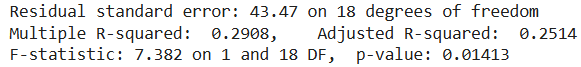

#### **Residual Standard Error (RSE)**
Công thức tính **Residual Standard Error (Sai số chuẩn của phần dư)** là:

$$
RSE = \sqrt{\frac{1}{n-k-1} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Trong đó:
- **$n$** là số mẫu (số quan sát).
- **$k$** là số biến độc lập (số tham số trong mô hình, không tính hệ số chặn).
- **$y_i$** là giá trị thực tế của biến phụ thuộc.
- **$\hat{y}_i$** là giá trị dự đoán của mô hình.

**Giải thích**: Sai số chuẩn của phần dư đo lường sự phân tán của các sai số (phần dư) giữa giá trị thực tế **$y$** và giá trị dự đoán **$\hat{y}$** từ mô hình. Một **Residual Standard Error** nhỏ cho thấy mô hình dự đoán chính xác hơn. Trong ví dụ này, **RSE = 43.47** cho thấy mức độ phân tán của phần dư, tức là sai số trung bình giữa giá trị thực tế và dự đoán là 43.47.

---

#### **R-squared (R²)**
Công thức tính **Multiple R-squared (R²)** là:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Trong đó:
- **$y_i$** là giá trị thực tế của biến phụ thuộc.
- **$\hat{y}_i$** là giá trị dự đoán của mô hình.
- **$\bar{y}$** là giá trị trung bình của biến phụ thuộc **$y$**.

**Giải thích**: **R²** đo lường phần trăm biến thiên trong **$y$** có thể được giải thích bởi các biến độc lập trong mô hình. **R² = 0.2908** có nghĩa là mô hình giải thích được khoảng 29% sự biến thiên trong **$y$**. Điều này cho thấy mô hình chỉ giải thích được một phần nhỏ sự thay đổi của biến phụ thuộc.

---

#### **Adjusted R-squared**
Công thức tính **Adjusted R-squared (R² điều chỉnh)** là:

$$
R^2_{adj} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)
$$

Trong đó:
- **$R^2$** là giá trị R-squared đã tính toán trước đó.
- **$n$** là số lượng quan sát.
- **$k$** là số lượng biến độc lập trong mô hình.

**Giải thích**: **R² điều chỉnh** điều chỉnh giá trị **R²** để tính đến số lượng biến trong mô hình. **Adjusted R-squared = 0.2514** cho thấy rằng khi tính đến số lượng biến độc lập, mô hình chỉ giải thích được 25% sự biến thiên trong biến phụ thuộc **$y$**, điều này làm tăng tính chính xác khi so với **R²** thông thường.

---

#### **F-statistic**
Công thức tính **F-statistic** là:

$$
F = \frac{(R^2 / k)}{((1 - R^2) / (n - k - 1))}
$$

Trong đó:
- **$R^2$** là giá trị R-squared.
- **$k$** là số lượng biến độc lập.
- **$n$** là số lượng quan sát.

**Giải thích**: **F-statistic** kiểm tra xem mô hình hồi quy có thể giải thích được sự biến thiên trong dữ liệu hay không. **F-statistic = 7.382** với **p-value = 0.01413** cho thấy mô hình có ý nghĩa thống kê, tức là ít nhất một trong các biến độc lập có ảnh hưởng đến biến phụ thuộc **$y$**.

---

#### **p-value**
**p-value** kiểm tra giả thuyết về sự quan trọng của các tham số trong mô hình. Nếu **p-value** nhỏ hơn mức ý nghĩa (thường là 0.05), tham số đó có ý nghĩa thống kê.

- **p-value cho Intercept** là 0.0125, nhỏ hơn 0.05, cho thấy hệ số chặn (**Intercept**) có ý nghĩa thống kê.
- **p-value cho pH0** là 0.0141, cũng nhỏ hơn 0.05, cho thấy **pH0** có ảnh hưởng đáng kể đến biến phụ thuộc **PercentageReduction**.

**Giải thích**: Các giá trị **p-value** này cho thấy các tham số trong mô hình đều có ý nghĩa thống kê, đồng nghĩa với việc pH có ảnh hưởng đáng kể đến sự giảm tỷ lệ phần trăm trong dữ liệu.

---
Các chỉ số trong mô hình hồi quy, bao gồm **Residual Standard Error (RSE)**, **R-squared (R²)**, **Adjusted R-squared**, **F-statistic**, và **p-value**, giúp đánh giá sự phù hợp và độ chính xác của mô hình. Các chỉ số này cho thấy mô hình của bạn có thể giải thích một phần sự thay đổi trong dữ liệu, nhưng còn nhiều yếu tố chưa được giải thích, và các biến độc lập có ý nghĩa thống kê trong việc dự đoán **PercentageReduction**.


#### TỔNG KẾT

- Mô hình hồi quy tuyến tính giữa **PercentageReduction** và **pH0** có thể giải thích một phần sự biến thiên trong dữ liệu (29%).

- Hệ số **pH0** có ý nghĩa thống kê và ảnh hưởng mạnh mẽ đến **PercentageReduction**.
- Mô hình có ý nghĩa thống kê **(F-statistic và p-value)**, nhưng độ phù hợp **(R² và R² điều chỉnh)** còn thấp, chứng tỏ mô hình chưa thể giải thích toàn bộ sự biến thiên trong **PercentageReduction**.
- Cần cải thiện mô hình, có thể bằng cách thêm các yếu tố hoặc sử dụng các phương pháp khác để tăng độ chính xác và khả năng giải thích.

Sau đó, một thông báo thu hồi đã được ban hành cho bài báo nêu rằng:
Các kết quả hồi quy được trình bày. . . chịu ảnh hưởng mạnh mẽ bởi một giá trị ngoại lệ cao. . . Khi các kết quả cho bệnh nhân này bị bỏ qua, mối liên hệ không còn
có ý nghĩa thống kê nữa. . . Vì mối quan hệ này đóng vai trò then chốt đối với các kết luận của
bài báo, nên người ta cho rằng lợi ích của việc chăm sóc bệnh nhân sẽ được phục vụ tốt nhất bằng cách thu hồi.

 ## **Yêu cầu 4. Thực hiện phân tích chẩn đoán mô hình được khớp ở trên. Xác định các quan sát có ảnh hưởng.**

In [ ]:
model <- lm(PercentageReduction ~ pH0, data = manuka)

summary(model)


Call:
lm(formula = PercentageReduction ~ pH0, data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.031 -26.708   4.131  18.816  85.382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   631.01     227.47   2.774   0.0125 *
pH0           -79.90      29.41  -2.717   0.0141 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.47 on 18 degrees of freedom
Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2514 
F-statistic: 7.382 on 1 and 18 DF,  p-value: 0.01413


#### 4.1. Chẩn đoán nhờ kiểm tra phần dư

In [ ]:
# KIỂM TRA PHẦN DƯ

# Raw residuals
raw_residuals <- resid(model)

# Standardized residuals
std_residuals <- rstandard(model)

# Studentized residuals
studentized_residuals <- rstudent(model)

summary(raw_residuals)
summary(std_residuals)
summary(studentized_residuals)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-94.031 -26.708   4.131   0.000  18.816  85.382 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.38145 -0.64726  0.09798 -0.01003  0.44492  2.01542 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.79646 -0.63648  0.09525 -0.01795  0.43526  2.22581 

##### 1. Raw Residuals (Dư thô)
- **Ý nghĩa**: Dư thô là sự khác biệt giữa giá trị quan sát thực tế $y_i$ và giá trị dự đoán từ mô hình $\hat{y}_i$.
- **Công thức**:  
  $$
  e_i = y_i - \hat{y}_i
  $$
- **Mục đích**:
  - Dư thô cho biết mô hình dự đoán lệch bao nhiêu so với giá trị thực tế.
  - Không chuẩn hóa được theo quy mô của các giá trị dự đoán, nên không phản ánh được mức độ biến thiên của dữ liệu.

---

##### 2. Standardized Residuals (Dư chuẩn hóa)
- **Ý nghĩa**: Dư chuẩn hóa là dư thô được chia cho sai số chuẩn của dư, đưa các dư về cùng một thang đo để dễ so sánh.
- **Công thức**:  
  $$
  r_i = \frac{e_i}{\sqrt{\text{MSE} * (1 - h_{ii})}}
  $$
  - $h_{ii}$: Giá trị leverage (ảnh hưởng của một điểm dữ liệu lên mô hình).  
  - $\text{MSE}$: Sai số trung bình bình phương của mô hình.
- **Mục đích**:
  - Xác định các điểm bất thường (outliers).
  - Các giá trị dư chuẩn hóa lớn (thường > ±2 hoặc ±3) cho thấy dữ liệu bất thường không phù hợp với mô hình.

---

##### 3. Studentized Residuals (Dư studentized)
- **Ý nghĩa**: Dư studentized là phiên bản cải tiến của dư chuẩn hóa, được tính bằng cách loại bỏ ảnh hưởng của điểm dữ liệu hiện tại trong quá trình tính toán (tự kiểm tra).
- **Công thức**:  
  $$
  t_i = \frac{e_i}{s_{(-i)} \sqrt{1 - h_{ii}}}
  $$
  - $s_{(-i)}$: Sai số chuẩn được tính khi loại bỏ điểm dữ liệu \(i\).  
- **Mục đích**:
  - Giúp phát hiện các điểm bất thường có ảnh hưởng cao (influential points).
  - Nhạy hơn dư chuẩn hóa trong việc phát hiện outliers.


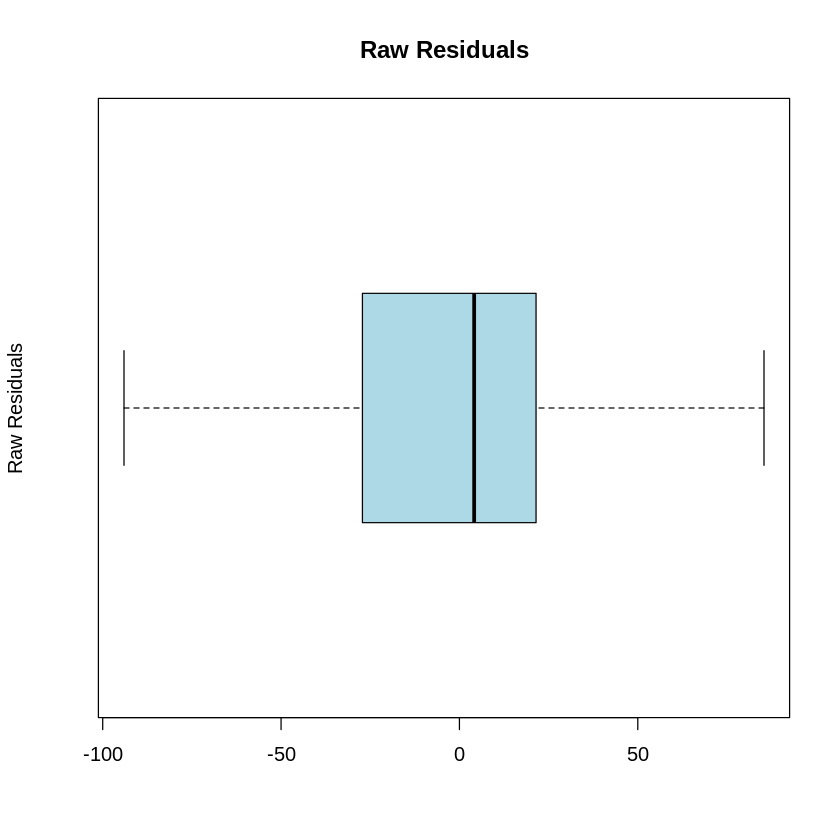

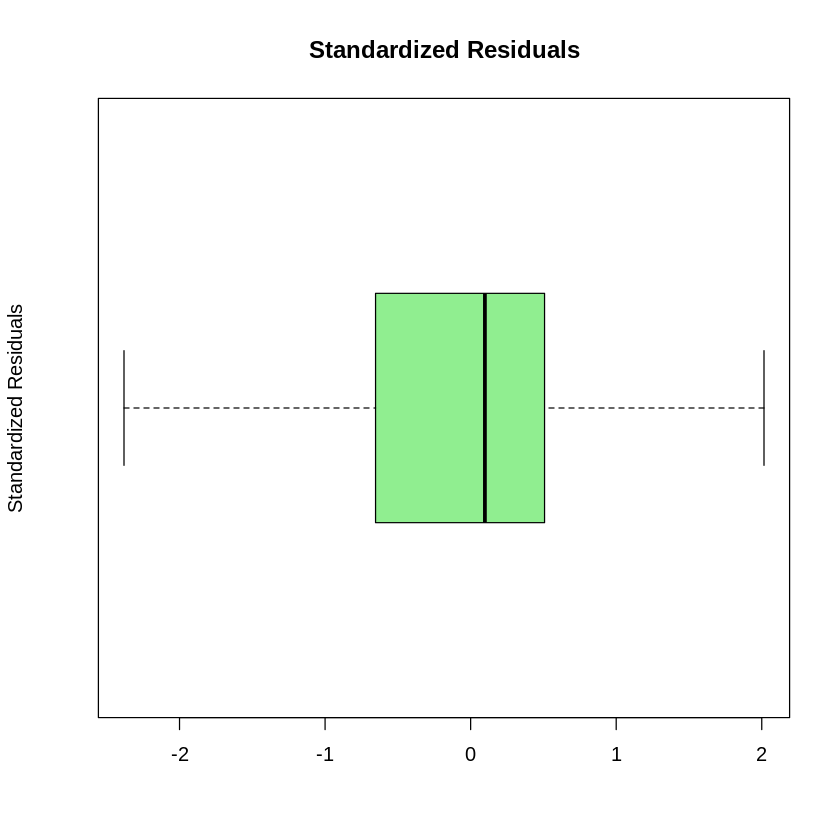

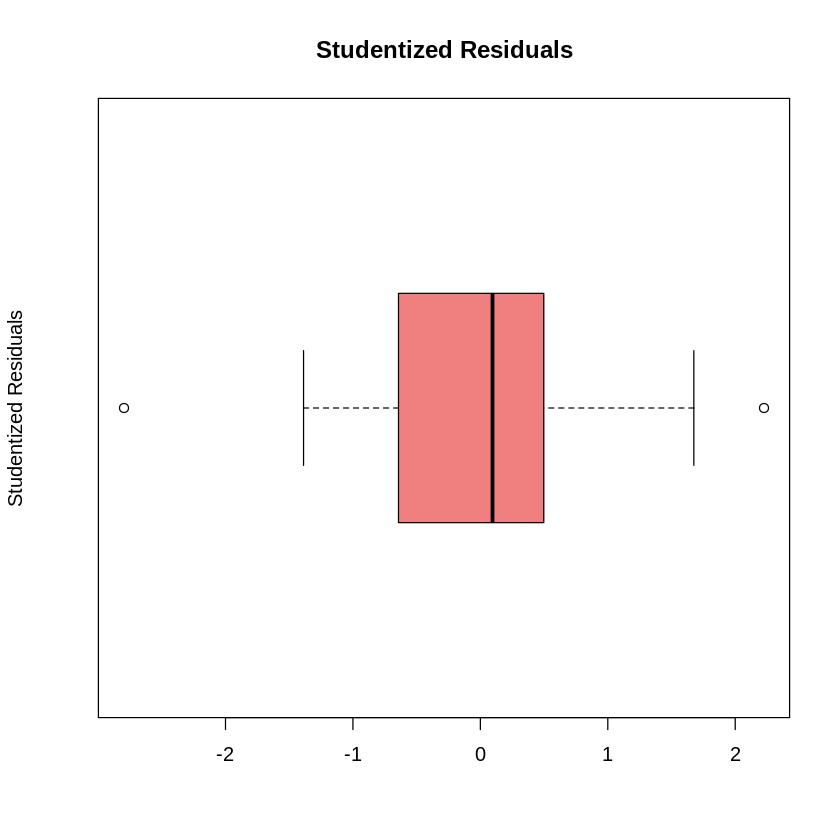

In [ ]:
# Biểu đồ Raw Residuals
boxplot(raw_residuals, main = "Raw Residuals", col = "lightblue",
        ylab = "Raw Residuals", horizontal = TRUE)

# Biểu đồ Standardized Residuals
boxplot(std_residuals, main = "Standardized Residuals", col = "lightgreen",
        ylab = "Standardized Residuals", horizontal = TRUE)

# Biểu đồ Studentized Residuals
boxplot(studentized_residuals, main = "Studentized Residuals", col = "lightcoral",
        ylab = "Studentized Residuals", horizontal = TRUE)

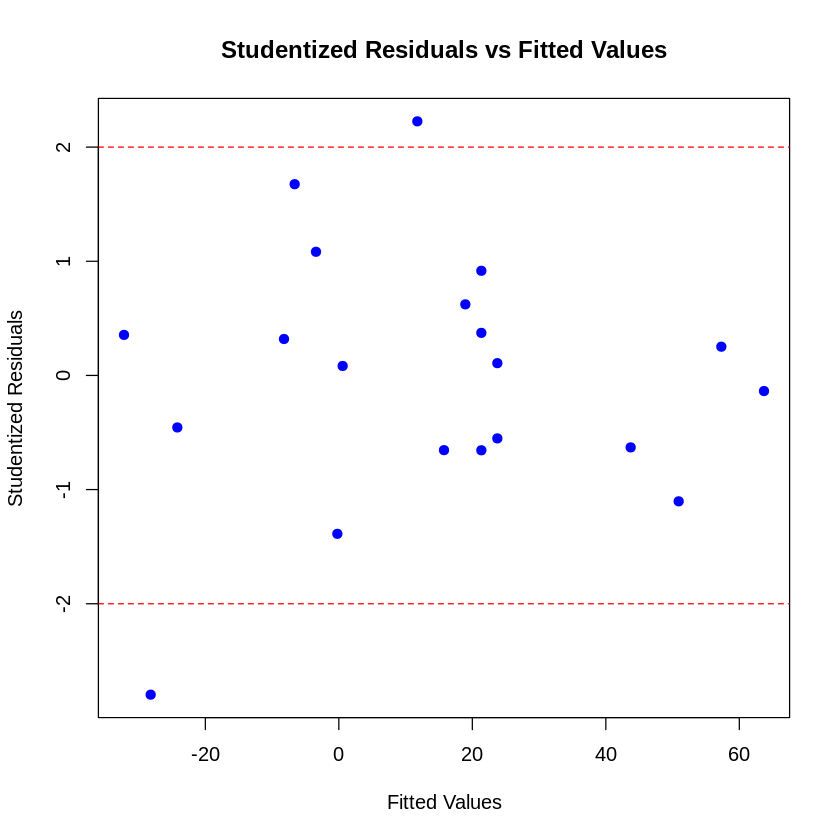

In [ ]:
# Vẽ scatter plot giữa dư studentized và giá trị dự đoán (fitted values)
plot(fitted(model), studentized_residuals,
     main = "Studentized Residuals vs Fitted Values",
     xlab = "Fitted Values",
     ylab = "Studentized Residuals",
     pch = 19, col = "blue")

# Thêm đường cắt để chỉ ra các outliers
abline(h = c(-2, 2), col = "red", lty = 2)  # Các điểm ngoài khoảng -2 đến 2 có thể là outliers


Nhờ Studentized Residuals (nhạy hơn 2 giá trị residuals còn lại trong việc phát hiện điểm sai khác outliners) đã cho thấy rằng trong bộ dữ liệu ban đầu có điểm outliners, cụ thể là điểm nào thì phải xem xét các cách thức dưới đây

#### 4.2. Chẩn đoán nhờ Cook's Distance

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000241 0.007006 0.014662 0.059181 0.048678 0.601331 

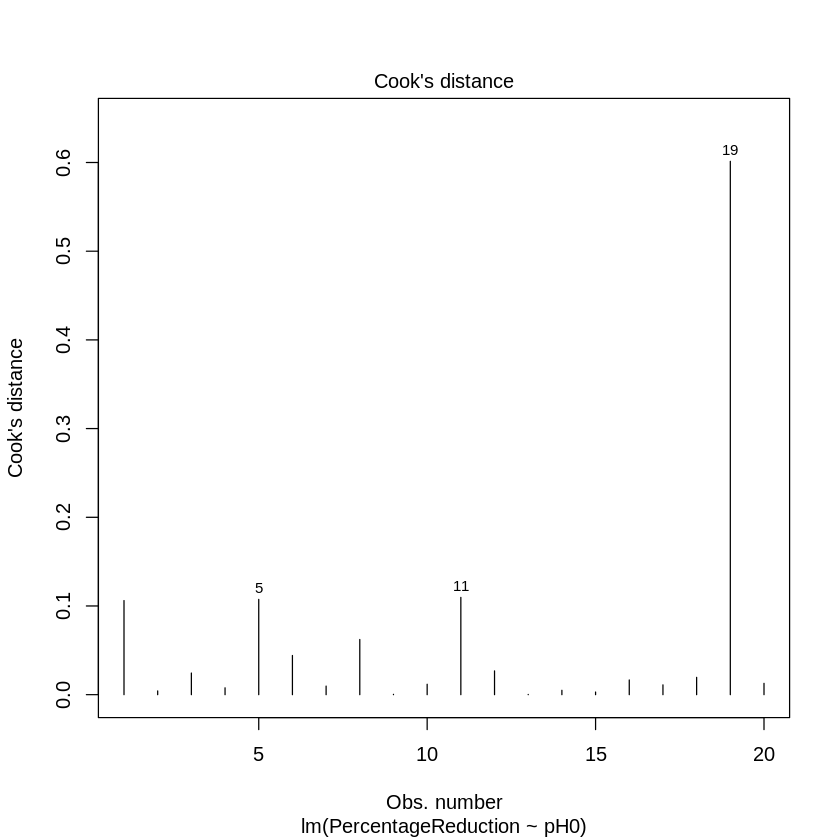

In [ ]:
#2. Kiểm tra ảnh hưởng của các quan sát
##2.1 Cook's Distance (Cook's Distance giúp xác định những quan sát có ảnh hưởng lớn tới mô hình, nếu giá trị này lớn có thể chỉ ra rằng quan sát đó có ảnh hưởng lớn.)
cooks_distance <- cooks.distance(model)

# Xem các giá trị Cook's Distance
summary(cooks_distance)

plot(model, 4)

Nhờ giá trị cook, có thể thấy cụ thể luôn là ở các giá trị index thứ 19, 5 và 11 có các giá trị ảnh hưởng lớn nhất đến mô hình (19 ảnh hưởng cao hơn cả)

Để chắc chắn hơn, ta xét các giá trị dưới đây

#### 4.3. Chẩn đoán nhờ dfbetas

In [ ]:
#2.2 dfbetas (dfbetas đo lường sự thay đổi của các ước lượng hệ số khi loại bỏ mỗi quan sát. Giá trị lớn của dfbetas cho thấy rằng quan sát đó có ảnh hưởng lớn đến mô hình).
dfbetas_values <- dfbetas(model)

# Kiểm tra giá trị dfbetas
summary(dfbetas_values)

# Tìm các quan sát có dfbetas > 2/sqrt(n)
influential_dfbetas <- which(abs(dfbetas_values) > 2 / sqrt(length(manuka$PercentageReduction)))
influential_dfbetas


  (Intercept)             pH0          
 Min.   :-0.389443   Min.   :-1.08831  
 1st Qu.:-0.088159   1st Qu.:-0.03745  
 Median :-0.015907   Median : 0.02363  
 Mean   : 0.009832   Mean   :-0.01014  
 3rd Qu.: 0.044249   3rd Qu.: 0.08807  
 Max.   : 1.057900   Max.   : 0.37836  

[1] 19 39

Dfbeta kiểm tra xem giá trị ước lượng của hệ số thay đổi bao nhiêu so với giá trị hệ số khi chưa bỏ quan sát tương ứng (giá trị trên hàng) đó ra (bỏ từ 1 đến 20)

==> ở vị trí index 19 biến đổi nhiều nhất

In [ ]:
dfbetas_values

,(Intercept),pH0
1,-0.389442987,0.378358166
2,0.028929169,-0.025289007
3,0.071133689,-0.062182924
4,0.106038357,-0.103463883
5,-0.012911409,0.034766253
6,-0.150628976,0.161511063
7,-0.054401063,0.049016205
8,0.153476504,-0.167329460
9,0.010605839,-0.009556026
10,-0.018902546,0.012496175


#### 4.4. Chẩn đoán nhờ dffits

In [ ]:
#2.3 dffits (dffits đo lường mức độ ảnh hưởng của các quan sát đến giá trị dự đoán. Nếu giá trị dffits lớn, có thể quan sát đó có ảnh hưởng lớn đến giá trị dự đoán).
dffits_values <- dffits(model)

# Kiểm tra giá trị dffits
summary(dffits_values)

# Tìm các quan sát có dffits > 2*sqrt(p/n)
# p là số lượng hệ số trong mô hình (ở đây là 2, gồm hệ số chặn và pH0)
# n là số lượng quan sát
influential_dffits <- which(abs(dffits_values) > 2 * sqrt(2 / length(manuka$PercentageReduction)))
influential_dffits


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.28777 -0.16618  0.02395 -0.04263  0.15384  0.51188 

19 
19

In [ ]:
dffits_values

1           2           3           4           5           6 
-0.46336439  0.08937886  0.21977293  0.12085473  0.51187950  0.29864824 
          7           8           9          10          11          12 
-0.13618921 -0.36164536  0.02655097 -0.15070611  0.49124359 -0.22752172 
         13          14          15          16          17          18 
 0.02134010  0.09662494 -0.07479306  0.17754366  0.14594469 -0.19313925 
         19          20 
-1.28776910 -0.15719445

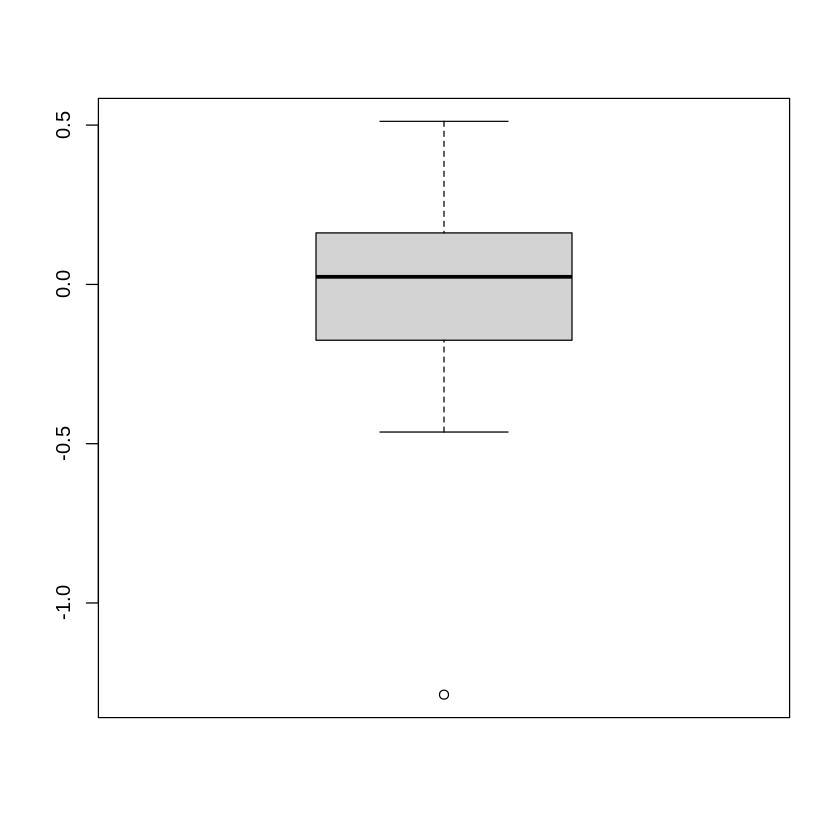

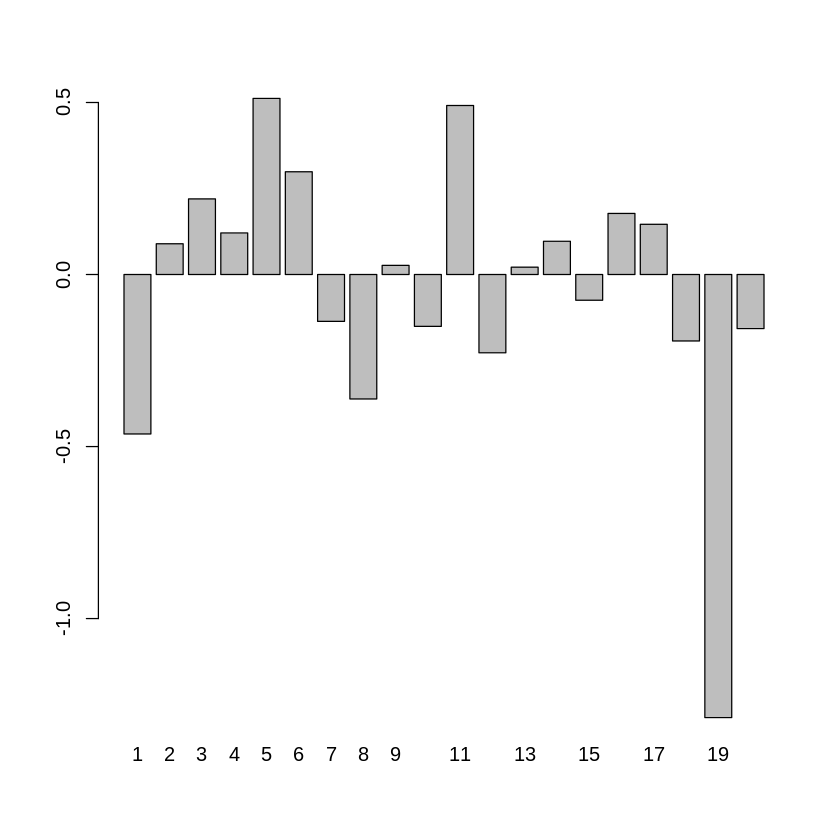

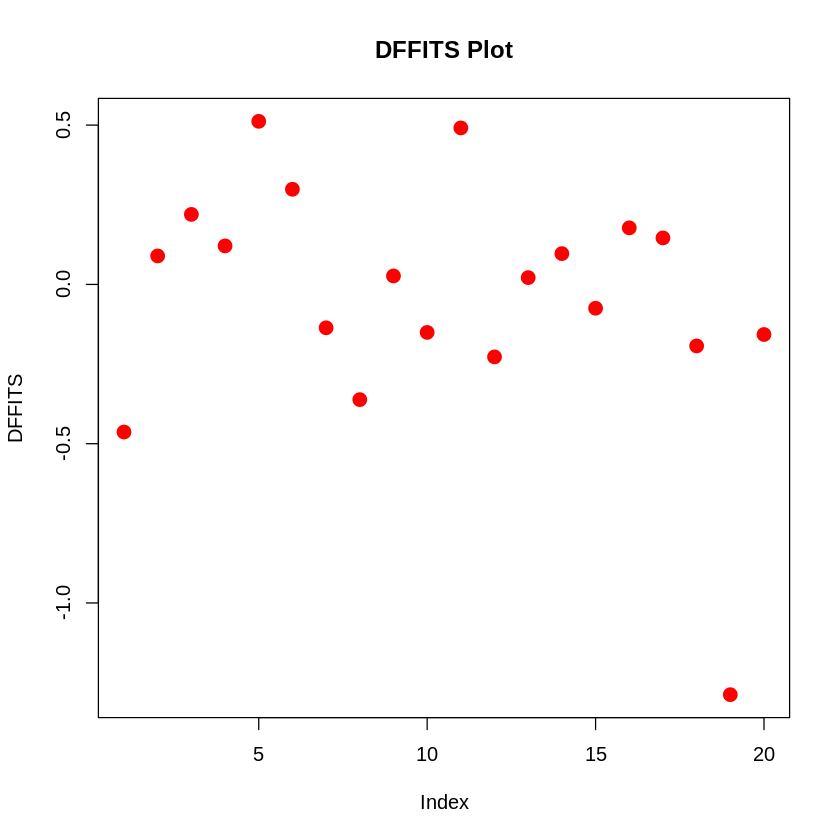

In [ ]:
boxplot(dffits_values)
barplot(dffits_values)
plot(dffits_values,
     main = "DFFITS Plot",         # Tiêu đề biểu đồ
     xlab = "Index",               # Nhãn cho trục x
     ylab = "DFFITS",              # Nhãn cho trục y
     col = "red",                # Màu của các điểm trong biểu đồ
     pch = 19,                     # Hình dạng của các điểm (pch = 19 là hình tròn đặc)
     cex = 1.5)                    # Kích thước của các điểm

- dffits là đo lường sự sai lệch giữa giá trị dự đoán và giá trị thực tế (khi mà bỏ đi quan sát (hàng) thứ i) (i chạy từ 1 đến 20)
- nó trực tiếp hơn dfbeta (dfbeta thì chỉ đo sự sai khác giữa hệ số ước lượng của mô hình được xây dựng khi chưa bỏ quan sát i và hệ số ước lượng của mô hình được xây dựng khi đã có quan sát i)

Và dffits vẫn cho ra giá trị 19

#### 4.5. Chẩn đoán nhờ leverages

**Leverage trong hồi quy tuyến tính**
Leverage trong hồi quy tuyến tính là một chỉ số đo lường mức độ ảnh hưởng của các điểm dữ liệu tới dự đoán của mô hình hồi quy. Nó phản ánh "cách xa" của một điểm dữ liệu so với các điểm dữ liệu còn lại. Các điểm có leverage cao có thể có ảnh hưởng mạnh đến các ước lượng mô hình, và do đó cần được chú ý cẩn thận.

**Cách tính Leverage**
Trong mô hình hồi quy tuyến tính, giá trị leverage của quan sát $i$ được tính thông qua ma trận hatal (hat matrix). Ma trận này mô tả cách mà các giá trị thực tế được chuyển đổi thành giá trị dự đoán. Giá trị leverage $h_{ii}$ của điểm dữ liệu thứ $i$ là một phần tử của ma trận này, được tính như sau:

$$
h_{ii} = x_i (X^T X)^{-1} x_i^T
$$

Trong đó:

- $x_i$ là vector dòng chứa các giá trị của các biến độc lập đối với quan sát thứ $i$.
- $X$ là ma trận thiết kế của mô hình hồi quy, nơi mỗi hàng chứa các giá trị của các biến độc lập cho một quan sát.
- $(X^T X)^{-1}$ là ma trận nghịch đảo của ma trận $X^T X$.

**Tổng quan về Leverage:**
- Leverage có giá trị trong khoảng từ 0 đến 1.
- Các điểm có leverage cao gần 1 cho thấy chúng nằm xa khỏi trung tâm của các quan sát khác.
- Các điểm có leverage thấp gần 0 có thể không ảnh hưởng nhiều đến mô hình.
- Giá trị leverage cao có thể là dấu hiệu của một điểm dữ liệu có ảnh hưởng lớn đến các ước lượng hồi quy, và nếu nó có dư residuals lớn (outliers), nó có thể ảnh hưởng mạnh đến các kết quả của mô hình.

**Ngưỡng Leverage:**
Một quan sát có leverage đáng ngờ nếu:

$$
h_{ii} > \frac{2p}{n}
$$

Trong đó:

- $p$ là số lượng tham số trong mô hình (bao gồm cả hệ số chặn),
- $n$ là số lượng quan sát trong dữ liệu.

Nếu $(h_{ii}\$ lớn hơn ngưỡng này, điểm dữ liệu đó có thể được xem là có leverage cao và có thể ảnh hưởng mạnh đến mô hình hồi quy.

**Tóm lại**
Leverage được tính thông qua các yếu tố liên quan đến các biến độc lập và ma trận thiết kế. Các điểm có leverage cao có thể cần được kiểm tra kỹ lưỡng, đặc biệt là khi chúng có residuals lớn, vì chúng có thể là outliers hoặc có ảnh hưởng mạnh đến kết quả mô hình.


In [ ]:
#3. Leverages (Leverages đo lường mức độ ảnh hưởng của các giá trị đầu vào đối với dự đoán. Quan sát có leverage lớn có thể là một quan sát có ảnh hưởng).
leverages <- hatvalues(model)

# Kiểm tra các giá trị leverage
summary(leverages)

# Tìm các quan sát có leverage > 2*p/n
high_leverages <- which(leverages > 2 * 2 / length(manuka$PercentageReduction))
high_leverages


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05023 0.05435 0.06714 0.10000 0.15057 0.23023 

15 16 
15 16

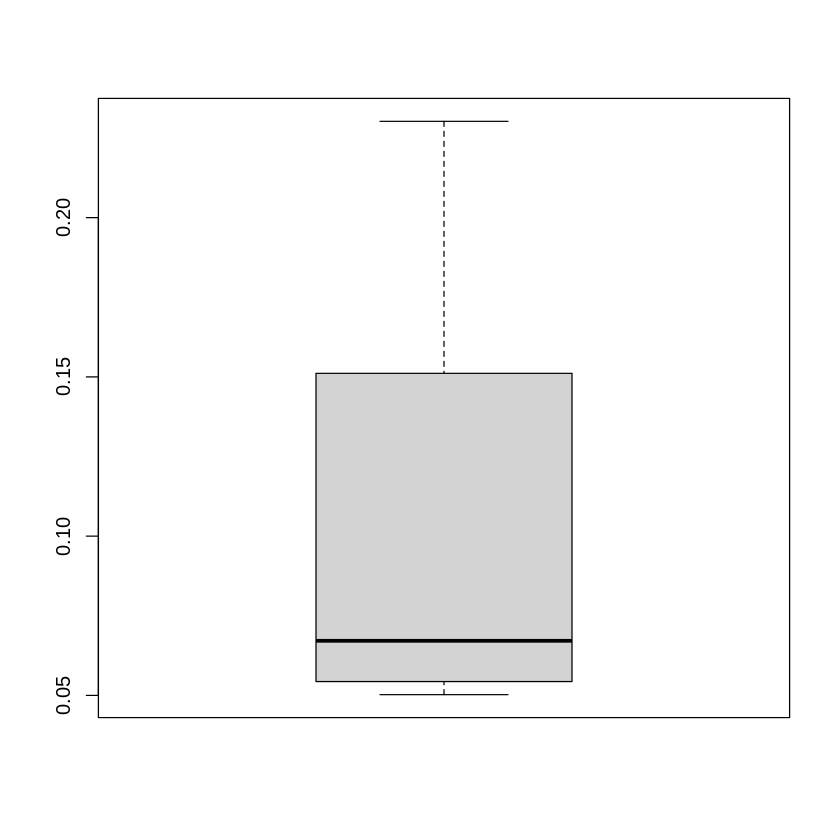

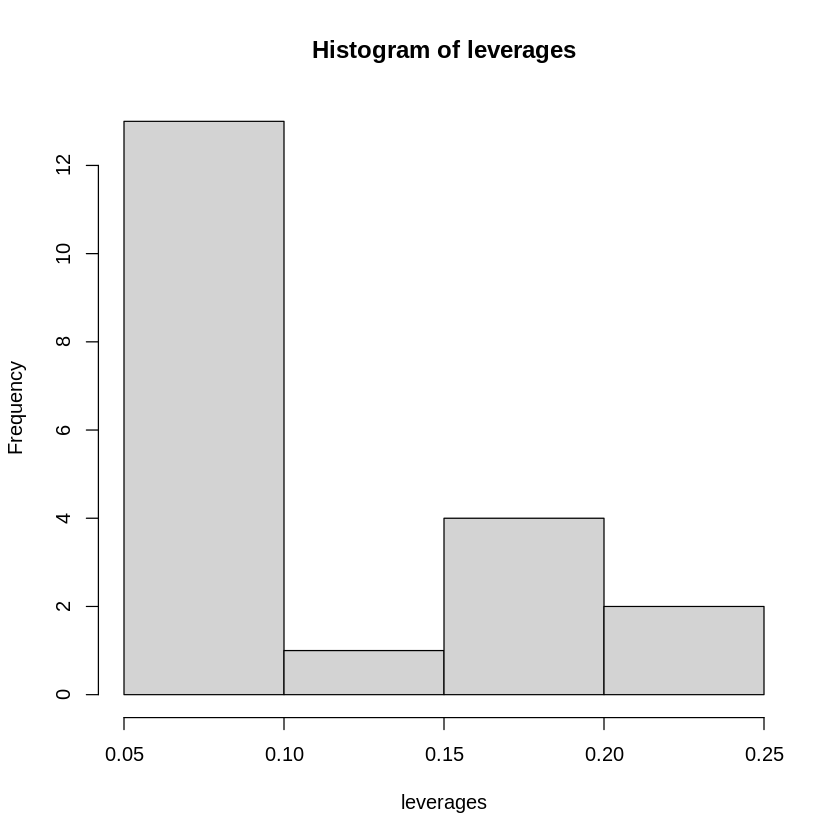

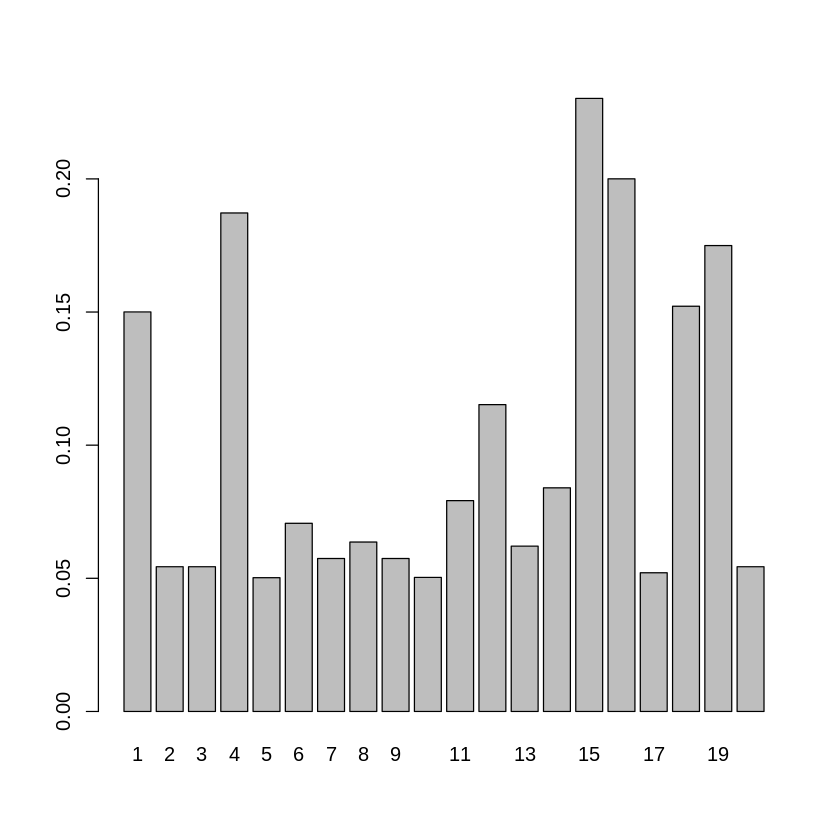

In [ ]:
boxplot(leverages)
hist(leverages)
barplot(leverages)

Nhờ leverage, ta có thêm 2 điểm gây chú ý là ở index thứ 15 và index thứ 16

#### 4.6. Chẩn đoán nhờ các đồ thị

##### 4.6.1 Các loại mô hình và cách thức đánh giá

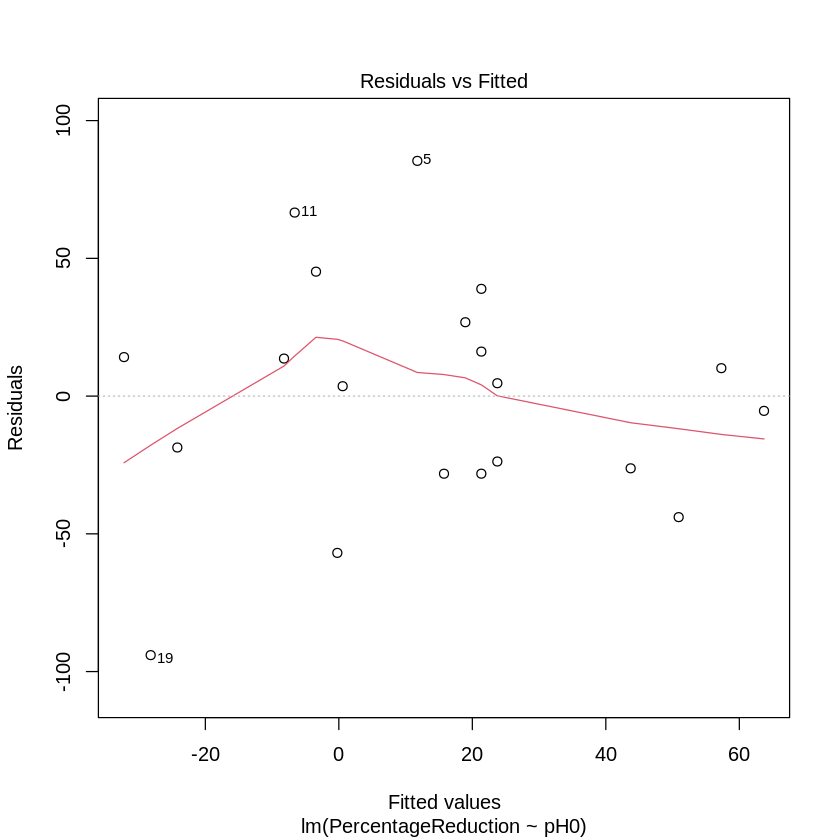

In [ ]:
#Kiểm tra mối quan hệ tuyến tính
plot(model,1)
################################ Nếu tốt thì đường đỏ phải thẳng và gần 0 nhất có thể ###################################################
###Đồ thị plot(model, 1) thường được sử dụng để kiểm tra mối quan hệ tuyến tính giữa biến phụ thuộc và biến độc lập trong mô hình hồi quy tuyến tính. Trong trường hợp này, nó biểu diễn phân phối của các điểm dữ liệu so với dự đoán của mô hình.
###Nếu mô hình có mối quan hệ tuyến tính tốt, thì bạn sẽ thấy một đám mây điểm dữ liệu tập trung gần một đường thẳng hoặc một hình dạng tuyến tính. Đường thẳng màu đỏ trên đồ thị thường biểu diễn một hình dạng tuyến tính lý tưởng, nghĩa là nếu mối quan hệ giữa biến phụ thuộc và biến độc lập là tuyến tính hoàn hảo, các điểm dữ liệu sẽ nằm trên đường này.
###Cách tốt nhất để đánh giá đồ thị này là xem xét xem các điểm dữ liệu có phân tán ngẫu nhiên xung quanh đường thẳng không. Nếu có, điều này chỉ ra một mối quan hệ tuyến tính tốt giữa các biến. Tuy nhiên, nếu có một số điểm dữ liệu không phân tán xung quanh đường thẳng hoặc có một hình dạng không tuyến tính, điều này có thể cho thấy một mối quan hệ phức tạp hơn hoặc cần phải sử dụng mô hình khác để mô tả dữ liệu tốt hơn.
###Kết luận từ đồ thị này có thể là:
###Nếu các điểm dữ liệu phân tán xung quanh đường thẳng một cách ngẫu nhiên, mô hình có thể là phù hợp và có thể sử dụng để dự đoán.
###Nếu có một số điểm dữ liệu không phân tán xung quanh đường thẳng hoặc có một hình dạng không tuyến tính, một mô hình khác hoặc biến đổi dữ liệu có thể cần thiết.

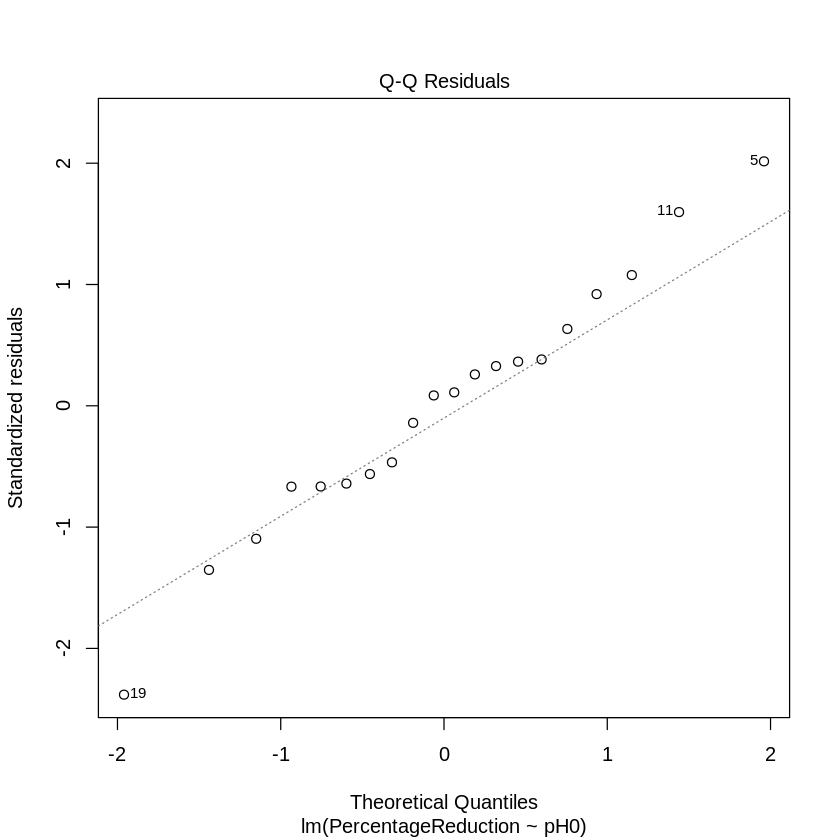

In [ ]:
#Kiểm tra tính chuẩn của dữ liệu
plot(model,2)
####################### Nếu tốt thì các điểm phải gần đường chéo chính nhất có thể (ở cái này thì phần đầu và cuối đang có dấu hiệu phân tán)
### Đồ thị plot(model, 2) thường được sử dụng để kiểm tra tính chuẩn của phần dư trong mô hình hồi quy tuyến tính. Đường chéo chính trên đồ thị là đường thẳng mà bạn mong đợi nếu phần dư tuân theo phân phối chuẩn. Nếu các điểm trên đồ thị phân tán ngẫu nhiên xung quanh đường chéo chính mà không có bất kỳ mô hình phân tán nào cụ thể, điều này là một dấu hiệu tích cực cho việc phần dư có thể tuân theo phân phối chuẩn.
### Tuy nhiên, nếu bạn thấy một hình dạng không đều hoặc các điểm phân tán không đồng đều xung quanh đường chéo chính, đặc biệt là ở phần đầu hoặc cuối của đồ thị, điều này có thể chỉ ra rằng phần dư không tuân theo phân phối chuẩn.
### Khi phần dư không tuân theo phân phối chuẩn, có thể ảnh hưởng đến kết quả của các kiểm định thống kê và đưa ra kết luận sai lầm. Trong trường hợp này, bạn có thể cần phải xem xét biến đổi dữ liệu hoặc sử dụng phương pháp thống kê không yêu cầu giả định về phân phối của dữ liệu, hoặc thực hiện phân tích phi tham số.

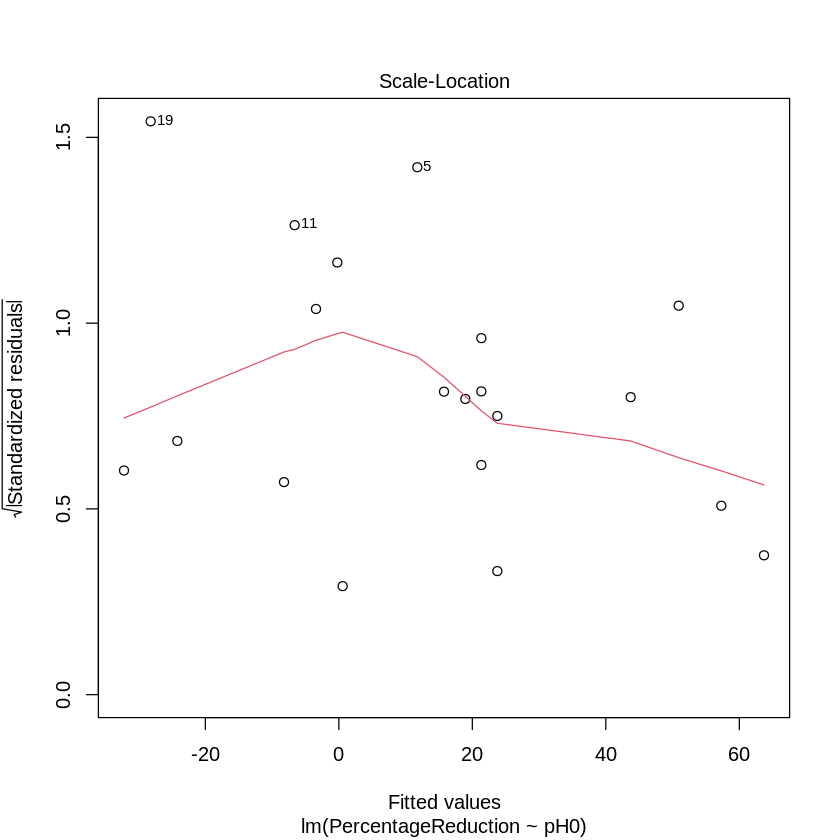

In [ ]:
#Kiểm tra tính bất biến của phương sai
plot(model,3)
##################################### Nếu tốt thì đường đỏ phải thẳng nhất có thể, và dữ liệu nó phải tuân theo xu hướng nào đấy (ở đây thì đường thẳng tương đối tốt, nhưng các điểm chấm thì chưa tốt)#########################

## Đồ thị plot(model, 3) thường được sử dụng để kiểm tra tính bất biến của phương sai trong mô hình hồi quy tuyến tính. Đồ thị này biểu diễn phần dư chuẩn hóa (standardized residuals) theo giá trị dự đoán (fitted values) của mô hình. Nếu mô hình làm giảm biến thiên của dữ liệu một cách đồng đều, bạn sẽ thấy một đám mây điểm dữ liệu phân tán đều xung quanh đường thẳng màu đỏ (đường thẳng y = 0), và không có một xu hướng nào đặc biệt.
## Tuy nhiên, nếu bạn thấy một xu hướng không đồng đều trong việc phân tán các điểm dữ liệu xung quanh đường thẳng màu đỏ, điều này có thể chỉ ra rằng tính bất biến của phương sai không được thỏa mãn.
## Điều này có thể gợi ý rằng phương sai của dữ liệu không đồng nhất (heteroscedasticity), có nghĩa là phương sai của các phần dư không đồng đều trên toàn bộ dải giá trị của biến độc lập.
## Khi phát hiện ra sự không đồng nhất trong phương sai, một số biện pháp có thể được thực hiện, bao gồm sử dụng các biến đổi dữ liệu hoặc mô hình hồi quy khác có thể phù hợp hơn với dữ liệu.

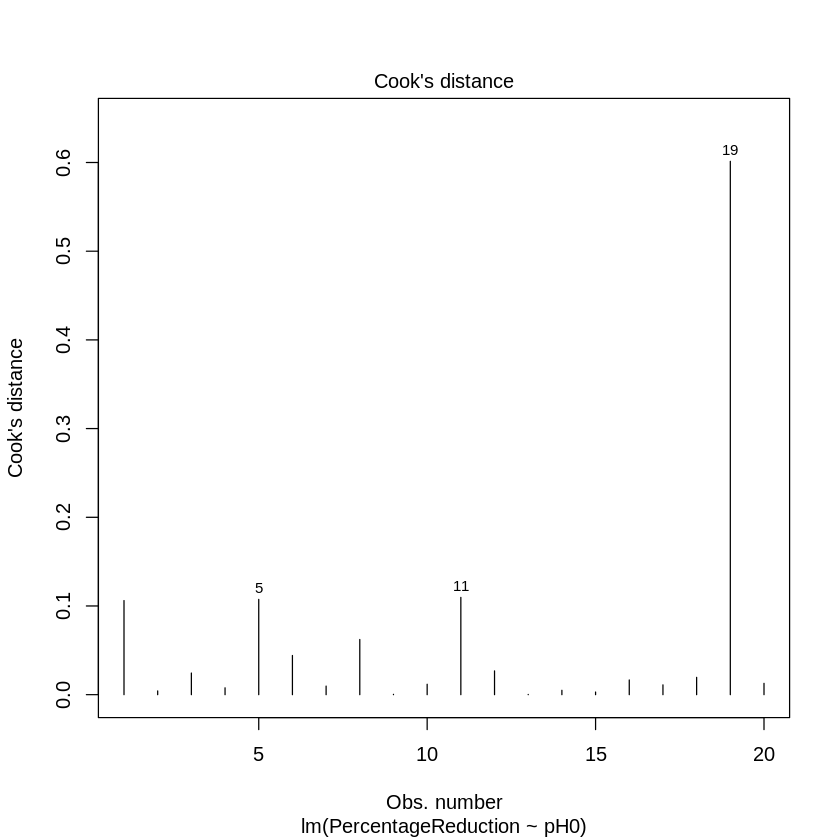

In [ ]:
#Kiểm tra như điểm có ảnh hưởng lớn
plot(model,4)
################################## Kiểm tra xem tập các dữ liệu của đối tượng nào ảnh hưởng lớn đến máy móc trong quá trình ước lượng tham số cho mô hình hồi quy đa tuyến tính này ############################

## Trong mô hình hồi quy tuyến tính, đồ thị plot(model, 4) thường được sử dụng để kiểm tra những điểm dữ liệu có ảnh hưởng lớn đến quá trình ước lượng tham số của mô hình. Đồ thị này biểu diễn các giá trị của Cook's distance cho mỗi điểm dữ liệu. Cook's distance là một chỉ số đo lường cách mà ước lượng của mô hình thay đổi khi một quan sát được loại bỏ khỏi phân tích. Nó đo lường ảnh hưởng của mỗi quan sát đến dự đoán của mô hình.
## Nếu Cook's distance của một điểm dữ liệu lớn hơn một ngưỡng cố định (thường là 4/n hoặc 1), điểm đó có thể được coi là ảnh hưởng lớn đối với mô hình.
## Cụ thể, trong đồ thị này:
##Các điểm dữ liệu có Cook's distance lớn hơn ngưỡng thường được xem xét là có ảnh hưởng lớn đối với mô hình. Điều này có thể dẫn đến việc xem xét lại các quan sát này để xác định xem liệu chúng có nên được bao gồm trong phân tích hay không.
## Nếu có nhiều điểm có Cook's distance lớn, điều này có thể cần phải xem xét lại mô hình hoặc xem xét các điều chỉnh để giảm ảnh hưởng của các điểm này đối với ước lượng của mô hình. Việc kiểm tra Cook's distance giúp đánh giá xem liệu có những điểm dữ liệu nào có ảnh hưởng lớn đến mô hình, và có cần thiết phải xem xét lại chúng hay không.

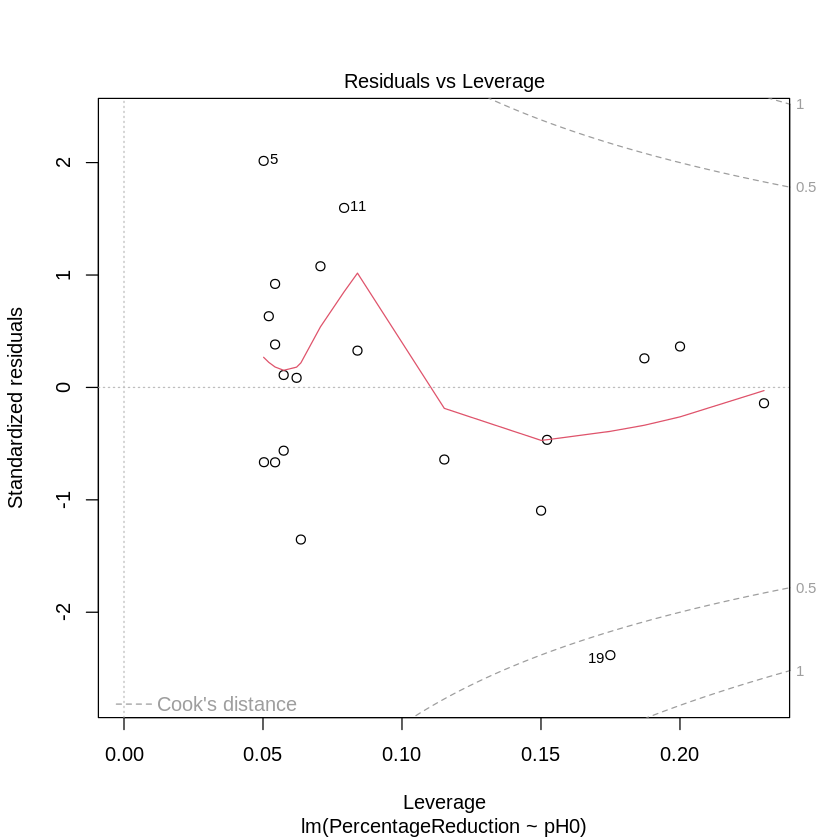

In [ ]:
#Xác định các điểm dữ liệu có leverage cao và/hoặc residual lớn.
#Phát hiện các điểm có ảnh hưởng mạnh đến mô hình hồi quy, đặc biệt khi kết hợp leverage cao với phần dư lớn.
plot(model,5)

#### Trục ngang (Leverage): Đo lường độ xa của điểm dữ liệu so với trung tâm của các biến giải thích (x). Điểm có leverage cao có thể ảnh hưởng lớn đến hệ số hồi quy.
#### Trục dọc (Standardized Residuals): Đo lường độ lớn của phần dư, đã chuẩn hóa theo phương sai. Điểm có residual lớn cho thấy dự đoán của mô hình bị sai lệch đáng kể.
#### Cook's Distance (Đường cong):
# Cook's Distance cho thấy mức độ ảnh hưởng tổng thể của từng điểm dữ liệu đến mô hình.
# Các đường cong Cook's Distance thường có ngưỡng 0.5 hoặc 1. Điểm nằm ngoài đường này được coi là điểm có ảnh hưởng mạnh.


########### Tốt: Khi không có điểm nào có leverage cao và residual lớn; không có điểm nằm ngoài đường Cook's Distance (0,5 hoặc 1), các điểm phân bố đều quanh trục ngang.
########### Không tốt: Khi có điểm dữ liệu có leverage cao, residual lớn hoặc vượt đường Cook's Distance. Điều này làm mô hình không ổn định và kết quả có thể sai lệch.

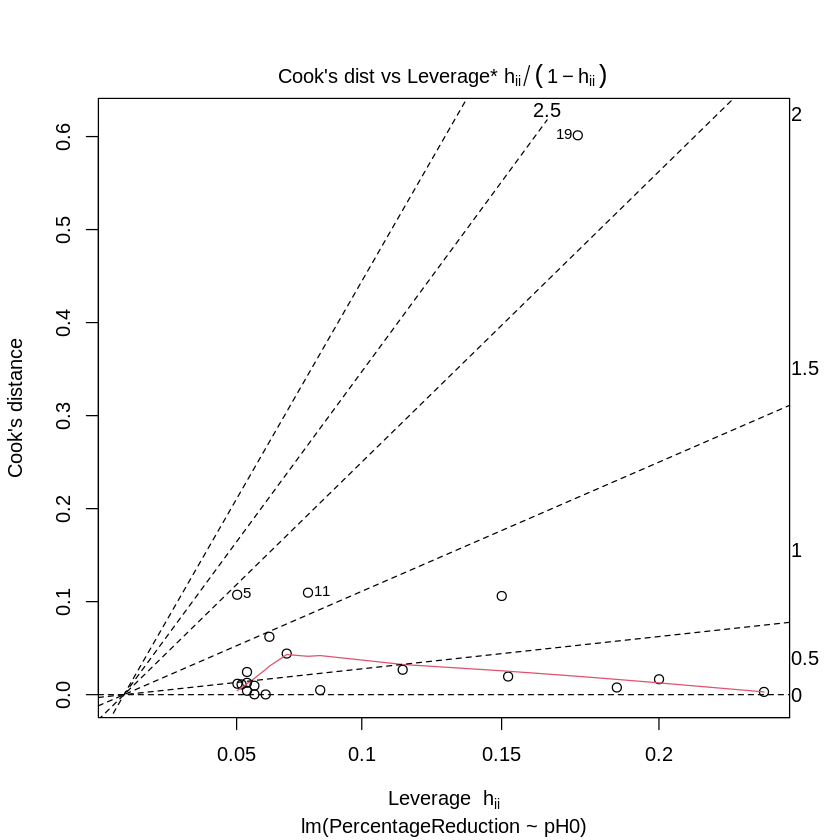

In [ ]:
#thường là đồ thị đòn bẩy (leverage) so với giá trị Cook's distance.
#Mục đích của đồ thị này là xác định các điểm dữ liệu có ảnh hưởng lớn đến mô hình hồi quy.
plot(model,6)

######## Trục ngang: Leverage
#Đại diện cho mức độ ảnh hưởng của mỗi điểm dữ liệu đến ước lượng của mô hình.
#Điểm có leverage lớn thường nằm xa trung tâm dữ liệu.
######### Trục dọc: Cook's Distance
#Đo lường sự thay đổi của mô hình khi một điểm bị loại bỏ.
#Điểm có Cook's Distance cao có thể ảnh hưởng mạnh đến kết quả của mô hình.
######### Đường nét đứt: Các ngưỡng Cook's Distance: 0.5, 1, 1.5, 2.
#Các điểm vượt qua các đường nét đứt cần được đặc biệt chú ý vì ảnh hưởng lớn đến mô hình.
######### Đường màu đỏ: Đường xu hướng của Cook's Distance theo leverage.
#Giúp quan sát mối quan hệ giữa leverage và Cook's Distance.
######## Các vòng tròn: Các điểm dữ liệu trong tập huấn luyện.

Hầu hết các điểm nằm dưới đường nét đứt 0.5:
→ Các điểm này có Cook's Distance thấp, không ảnh hưởng mạnh đến mô hình.

Một vài điểm có leverage lớn (ví dụ: gần 0.2) nhưng Cook's Distance vẫn thấp:
→ Các điểm này có leverage cao (nằm xa trung tâm), nhưng không có residuals lớn nên ít ảnh hưởng đến mô hình.

Đường màu đỏ nằm sát trục ngang:
→ Không có mối quan hệ rõ rệt giữa leverage và Cook's Distance trong trường hợp này.

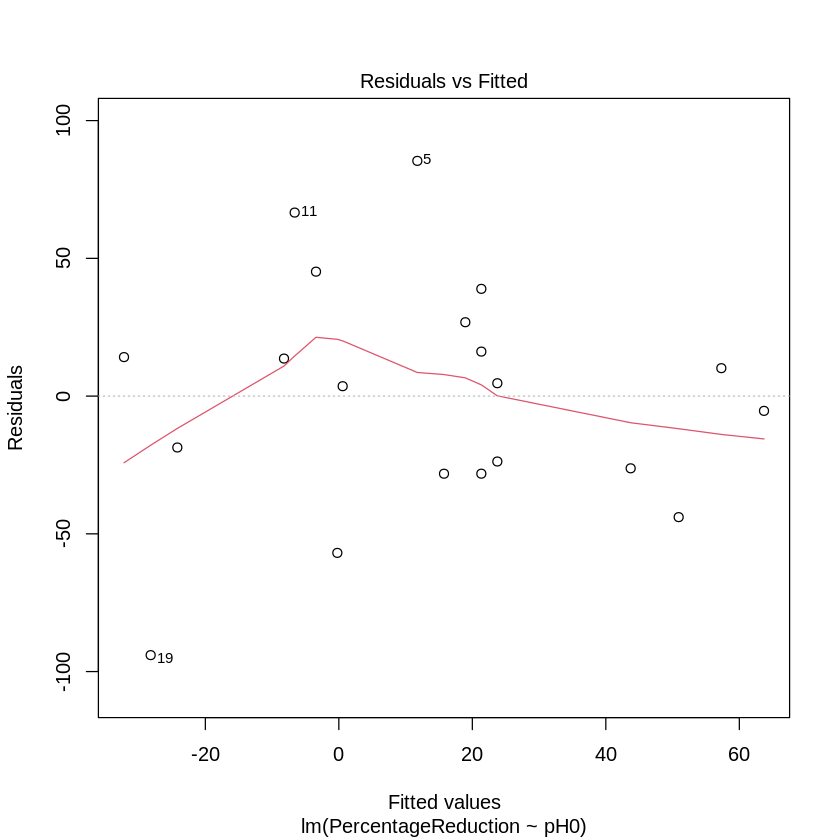

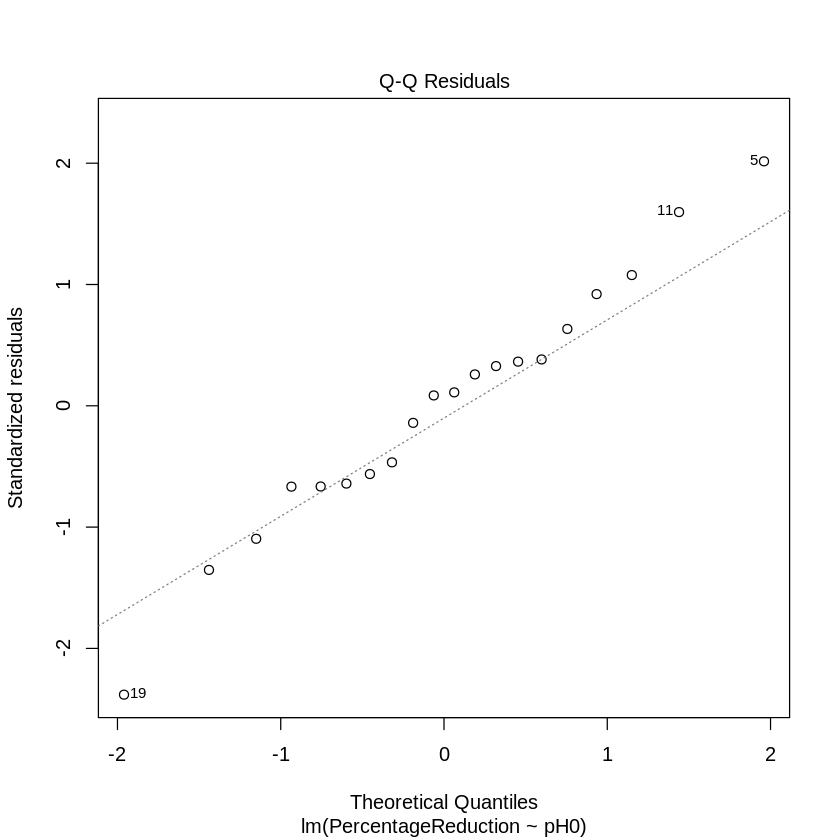

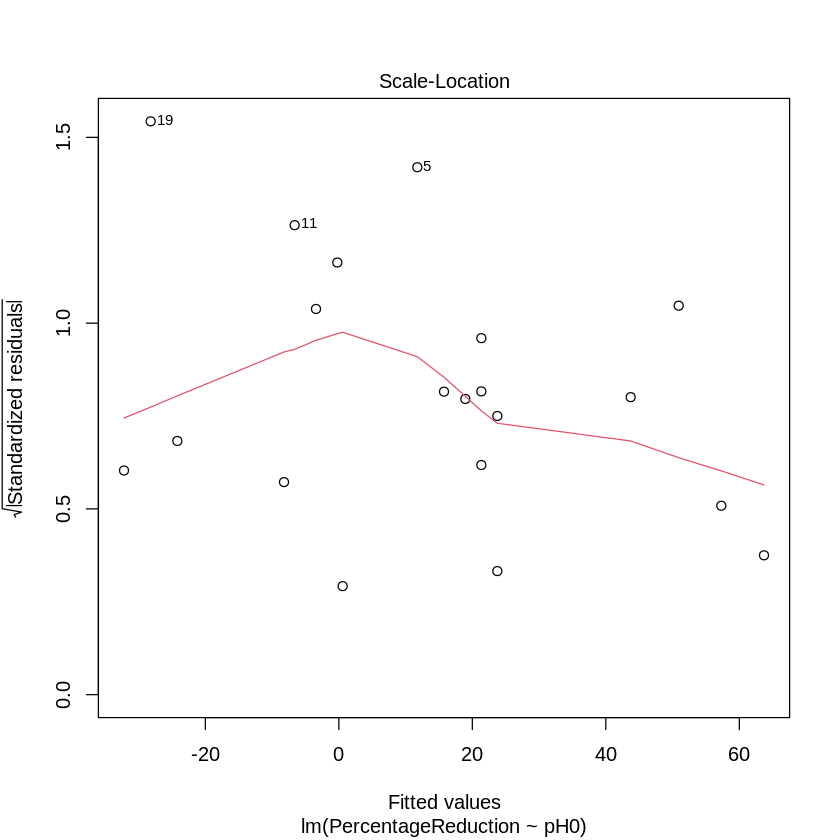

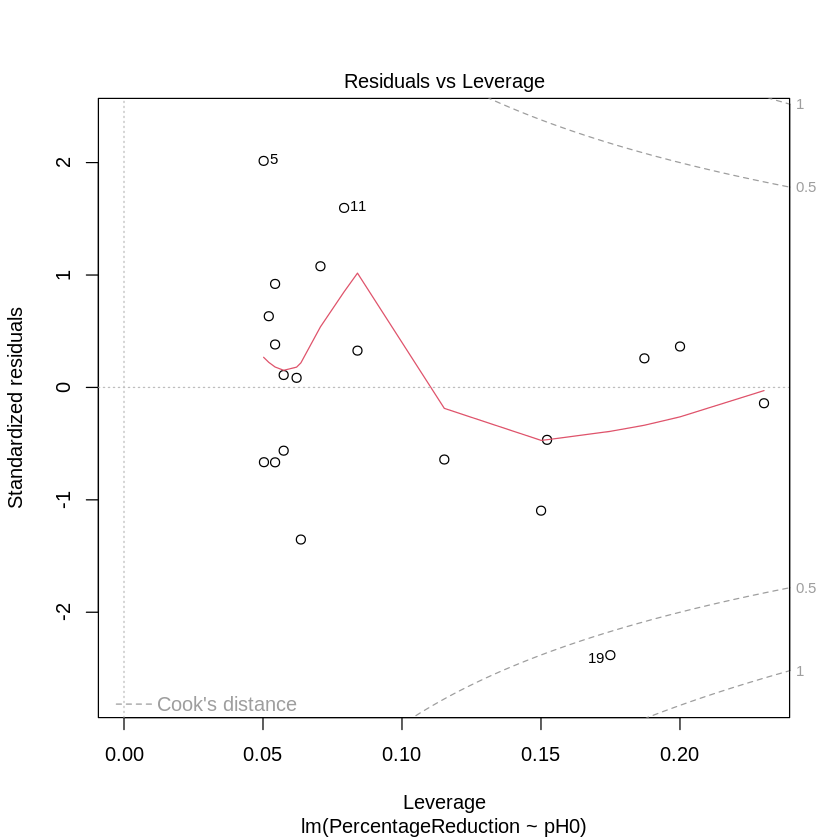

In [ ]:
plot(model)  #câu lệnh vẽ 4 mô hình ban đầu (1,2,3,4)

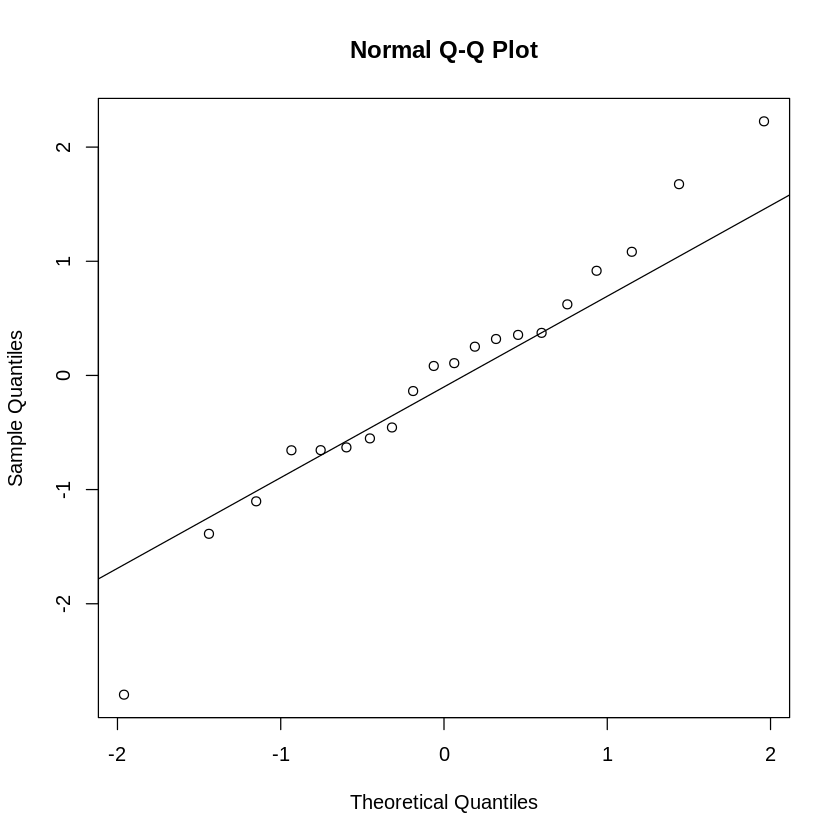

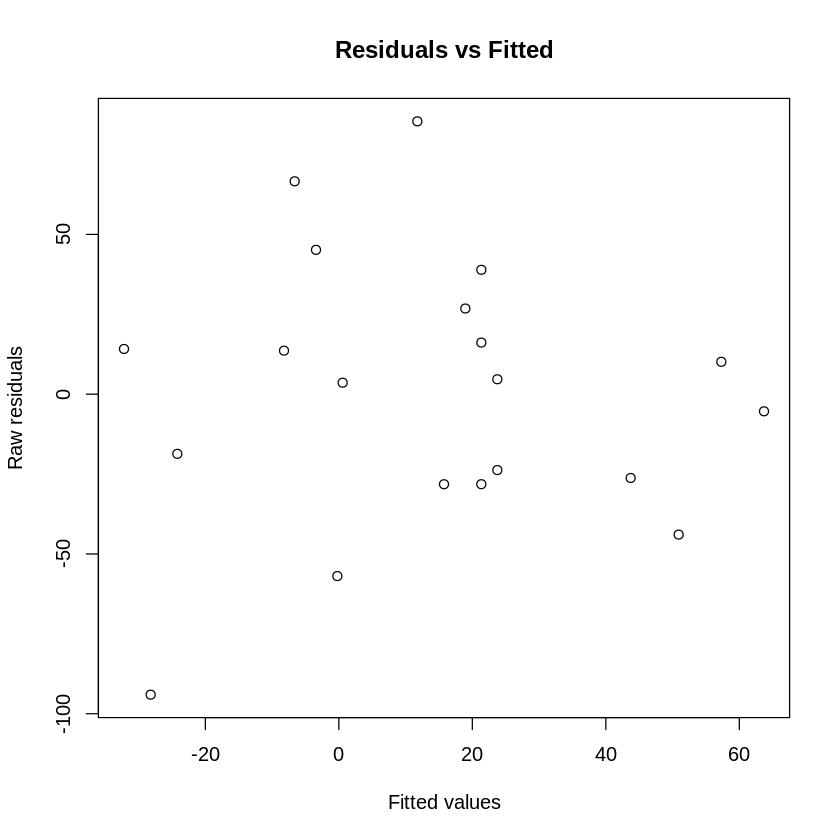

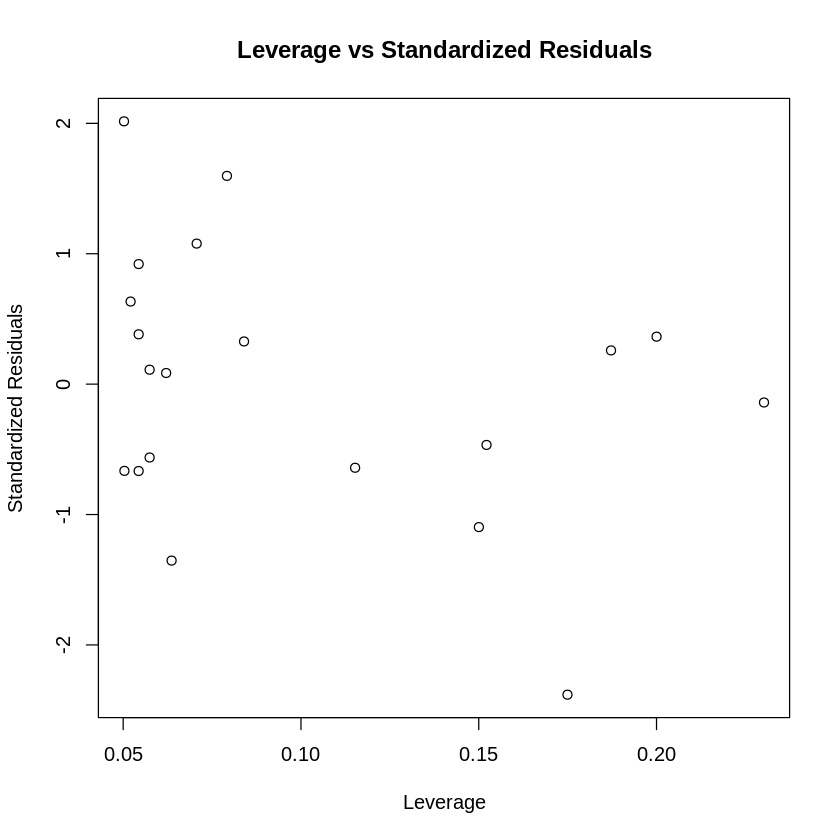

In [ ]:
#4. Plot các đồ thị chẩn đoán
# Q-Q plot để kiểm tra phân phối chuẩn của dư
qqnorm(studentized_residuals)
qqline(studentized_residuals)

# Plot residuals vs fitted values
plot(fitted(model), raw_residuals, main="Residuals vs Fitted", xlab="Fitted values", ylab="Raw residuals")

# Leverage vs Standardized Residuals
plot(leverages, std_residuals, main="Leverage vs Standardized Residuals", xlab="Leverage", ylab="Standardized Residuals")


### 4.7. Chẩn đoán nhờ cov_ratio

**Covariance Ratio** (tỷ lệ phương sai) là một chỉ số trong phân tích hồi quy tuyến tính dùng để đo lường mức độ ảnh hưởng của một quan sát cụ thể đối với ước lượng phương sai của các hệ số hồi quy.

Chỉ số này chủ yếu được sử dụng để phát hiện các quan sát có ảnh hưởng mạnh, có thể gây ra sự thay đổi lớn trong phương sai của các hệ số hồi quy khi quan sát đó bị loại bỏ.

---

**Cách tính Covariance Ratio:**
Tỷ lệ phương sai (covariance ratio) của quan sát \(i\) được tính như sau:

$$
\text{Covariance Ratio} = \frac{\hat{\sigma}_i^2}{\hat{\sigma}^2}
$$

Trong đó:
- $\hat{\sigma}_i^2$ là phương sai ước lượng của mô hình khi loại bỏ quan sát $i$.
- $\hat{\sigma}^2$ là phương sai ước lượng của mô hình sử dụng tất cả các quan sát.

---

**Ý nghĩa:**
- **Covariance Ratio gần 1**: Chỉ ra rằng quan sát không ảnh hưởng nhiều đến phương sai của các hệ số hồi quy.
- **Covariance Ratio lớn hơn 1**: Chỉ ra rằng quan sát có ảnh hưởng mạnh đến phương sai của mô hình.
- **Covariance Ratio nhỏ hơn 1**: Chỉ ra rằng quan sát có ảnh hưởng ít đến phương sai.

Chỉ số này rất hữu ích trong việc phát hiện các quan sát có khả năng gây ảnh hưởng mạnh đến mô hình hồi quy, từ đó giúp kiểm tra độ ổn định và tính tin cậy của mô hình.


In [ ]:
model


Call:
lm(formula = PercentageReduction ~ pH0, data = manuka)

Coefficients:
(Intercept)          pH0  
      631.0        -79.9  


In [ ]:
# Tính Covariance ratio (cr)
##Covariance ratio (cr) đo lường sự thay đổi trong phương sai của các ước lượng hệ số khi loại bỏ mỗi quan sát. Bạn có thể tính toán cr bằng cách sử dụng hàm covratio() trong R.
cov_ratio <- covratio(model)

# Xem các giá trị Covariance ratio
summary(cov_ratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6375  1.0713  1.1484  1.1240  1.2095  1.4532 

In [ ]:
cov_ratio

1         2         3         4         5         6         7         8 
1.1487430 1.1663920 1.0764837 1.3690856 0.7077688 1.0556636 1.1479572 0.9661000 
        9        10        11        12        13        14        15        16 
1.1878118 1.1232181 0.8969385 1.2098738 1.1943537 1.2093691 1.4532141 1.3808592 
       17        18        19        20 
1.1305623 1.2906069 0.6374695 1.1277788

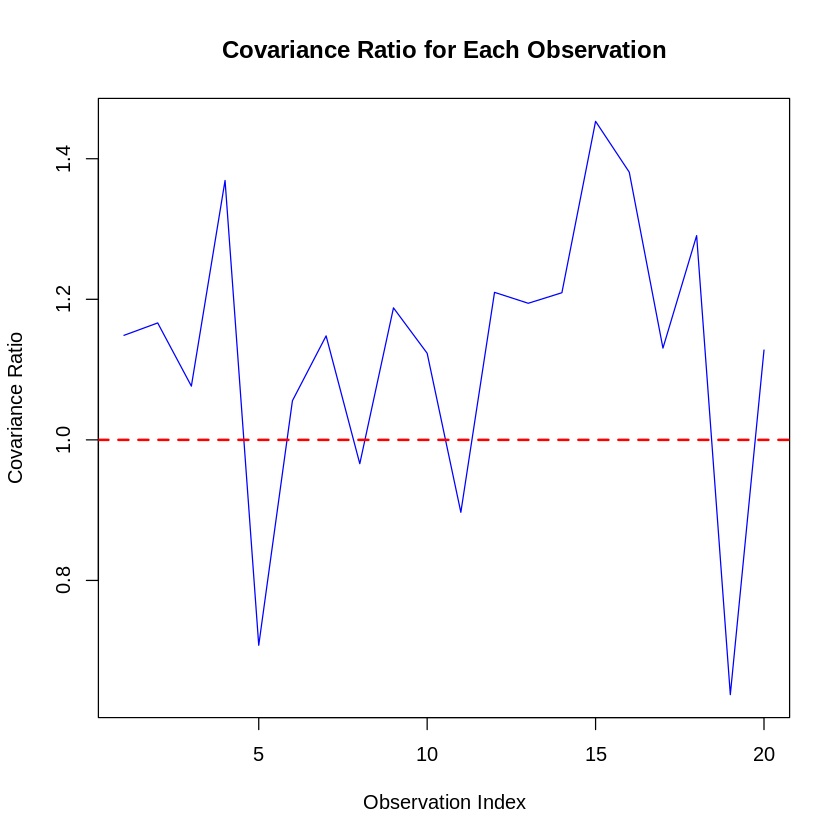

In [ ]:
plot(cov_ratio, type = "l", main = "Covariance Ratio for Each Observation",
     xlab = "Observation Index", ylab = "Covariance Ratio", col = "blue")

abline(h = 1, col = "red", lwd = 2, lty = 2)  #lty = 2 là đường đứt (1 là đường thường)
#lwd = 2 là độ dày đường
#h = 1 tức là vẽ ngang tại vị trí y = 1 (nếu v = 5 thì là vẽ đường dọc tại x = 5)

**Khi nào ko tốt**
- **Tỷ lệ hiệp phương sai quá cao (y > 1):** Khi có các quan sát có tỷ lệ hiệp phương sai lớn hơn 1 rất nhiều, điều này cho thấy những quan sát này có ảnh hưởng lớn đến mô hình và có thể làm lệch kết quả phân tích. Đây có thể là dấu hiệu của leverage cao, tức là những điểm này có giá trị khác biệt rõ rệt so với các quan sát còn lại và có thể là những điểm ngoại lệ.

- **Tỷ lệ hiệp phương sai quá thấp (y < 1):** Nếu tỷ lệ hiệp phương sai quá thấp, điều này có thể chỉ ra rằng các quan sát này có ít ảnh hưởng đến mô hình và có thể có lỗi trong dữ liệu, hoặc thậm chí là dữ liệu không có ích cho mô hình.

- **Nhiều điểm nằm xa đường đỏ:** Nếu nhiều điểm nằm quá xa đường đỏ, đặc biệt là ở khu vực có giá trị tỷ lệ hiệp phương sai cao hoặc thấp bất thường, bạn cần phải xem xét lại các quan sát đó để xác định xem chúng có phải là điểm dữ liệu sai lệch (outliers) hoặc có vấn đề trong quá trình thu thập dữ liệu không.

In [ ]:
# boxplot(cov_ratio)
# barplot(cov_ratio)

### 4.8. Chẩn đoán nhờ hàm influence.measures

In [ ]:
# Sử dụng influence.measures() để lấy các chỉ số ảnh hưởng
##Hàm influence.measures() trả về nhiều thông tin về ảnh hưởng của các quan sát trong mô hình hồi quy, bao gồm Cook's Distance, Covariance ratio, Leverages, dfbetas, và dffits.
influence_measures <- influence.measures(model)

# Xem kết quả
summary(influence_measures)

Potentially influential observations of
	 lm(formula = PercentageReduction ~ pH0, data = manuka) :

   dfb.1_  dfb.pH0 dffit   cov.r   cook.d hat  
4   0.11   -0.10    0.12    1.37_*  0.01   0.19
15 -0.07    0.07   -0.07    1.45_*  0.00   0.23
16 -0.15    0.15    0.18    1.38_*  0.02   0.20
19  1.06_* -1.09_* -1.29_*  0.64_*  0.60   0.17


4 cái trên chính là 4 giá trị gây ảnh hưởng nhiều nhất đến với bộ dữ liệu ban đầu, trong đó giá trị ở vị trí 19 là cao hơn cả

In [ ]:
influence_measures

Influence measures of
	 lm(formula = PercentageReduction ~ pH0, data = manuka) :

     dfb.1_  dfb.pH0   dffit cov.r   cook.d    hat inf
1  -0.38944  0.37836 -0.4634 1.149 0.106078 0.1500    
2   0.02893 -0.02529  0.0894 1.166 0.004195 0.0544    
3   0.07113 -0.06218  0.2198 1.076 0.024366 0.0544    
4   0.10604 -0.10346  0.1209 1.369 0.007704 0.1872   *
5  -0.01291  0.03477  0.5119 0.708 0.107414 0.0502    
6  -0.15063  0.16151  0.2986 1.056 0.044171 0.0707    
7  -0.05440  0.04902 -0.1362 1.148 0.009647 0.0574    
8   0.15348 -0.16733 -0.3616 0.966 0.062198 0.0636    
9   0.01061 -0.00956  0.0266 1.188 0.000373 0.0574    
10 -0.01890  0.01250 -0.1507 1.123 0.011729 0.0503    
11 -0.28127  0.29822  0.4912 0.897 0.109656 0.0792    
12 -0.17743  0.17118 -0.2275 1.210 0.026779 0.1152    
13 -0.00859  0.00942  0.0213 1.194 0.000241 0.0621    
14 -0.05823  0.06147  0.0966 1.209 0.004913 0.0840    
15 -0.06760  0.06617 -0.0748 1.453 0.002958 0.2302   *
16 -0.14983  0.15376  0.1775 1.381 0.0

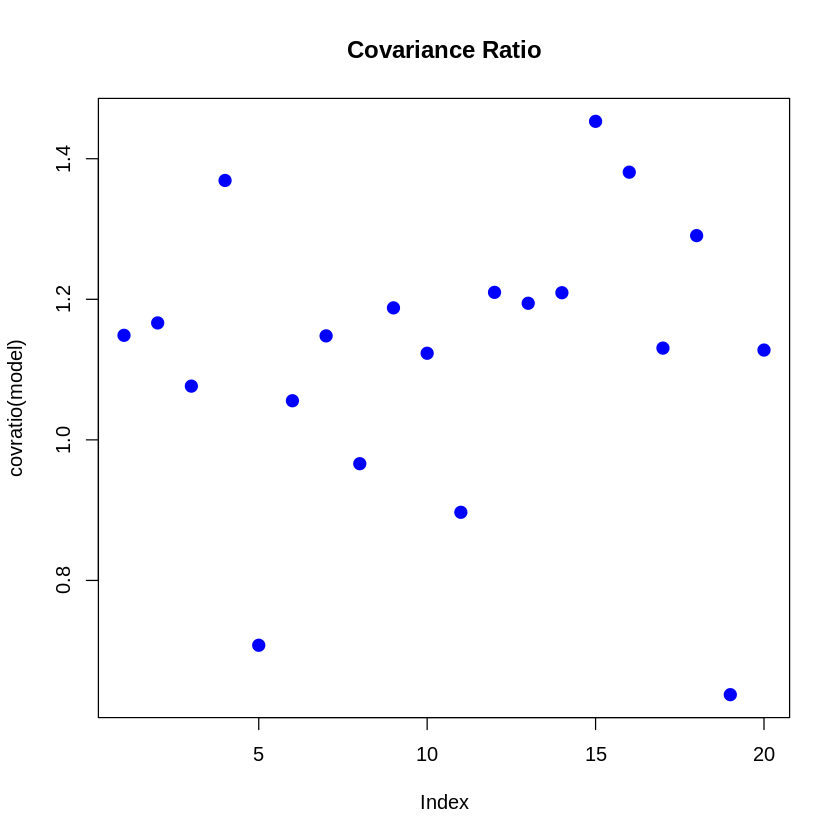

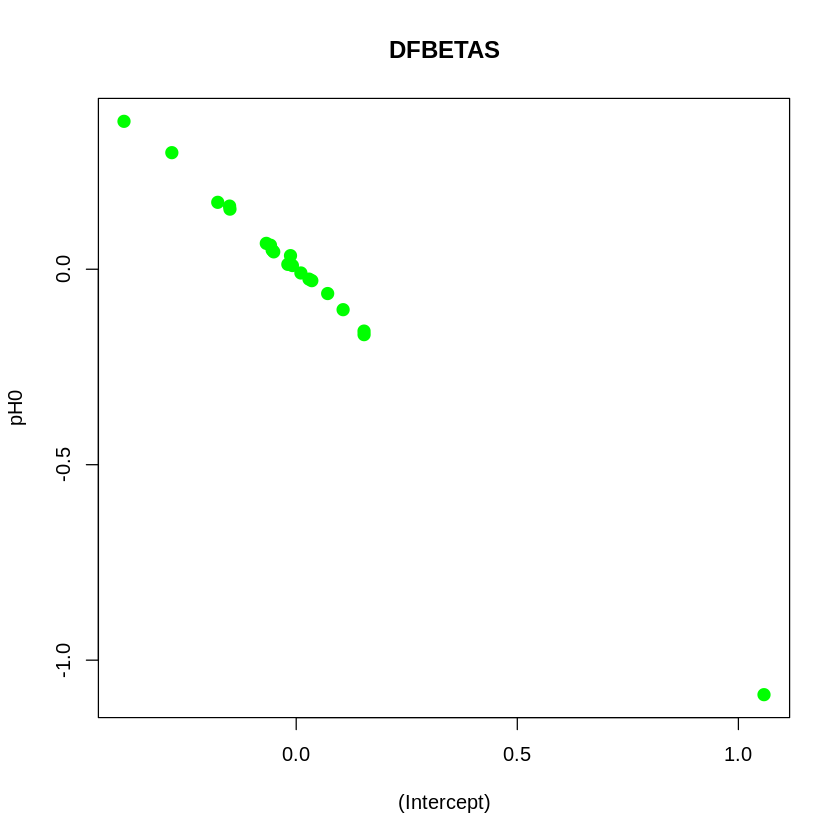

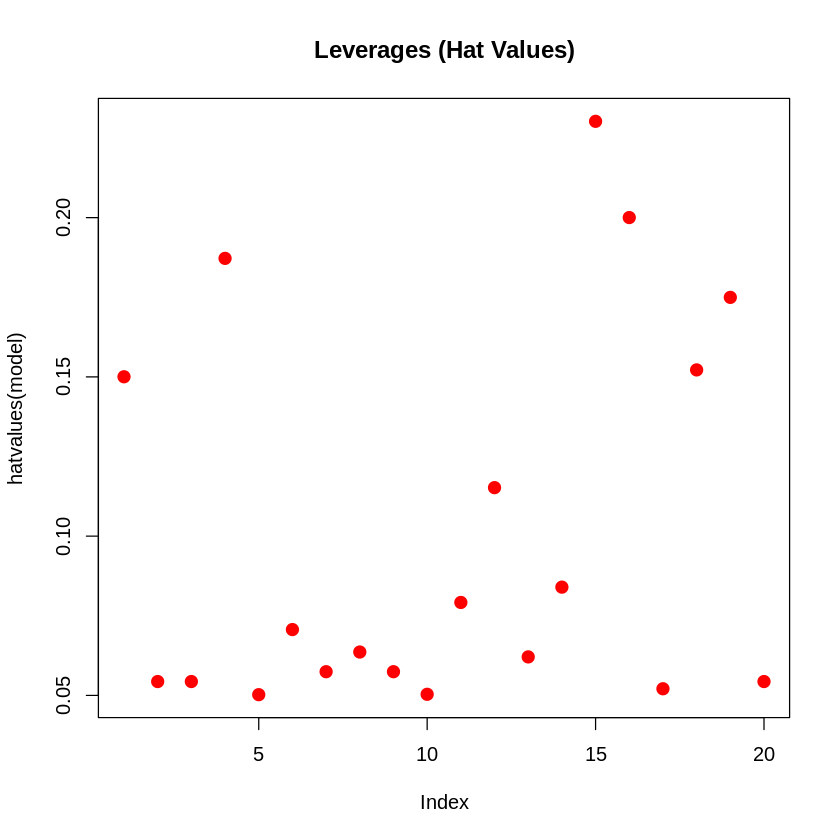

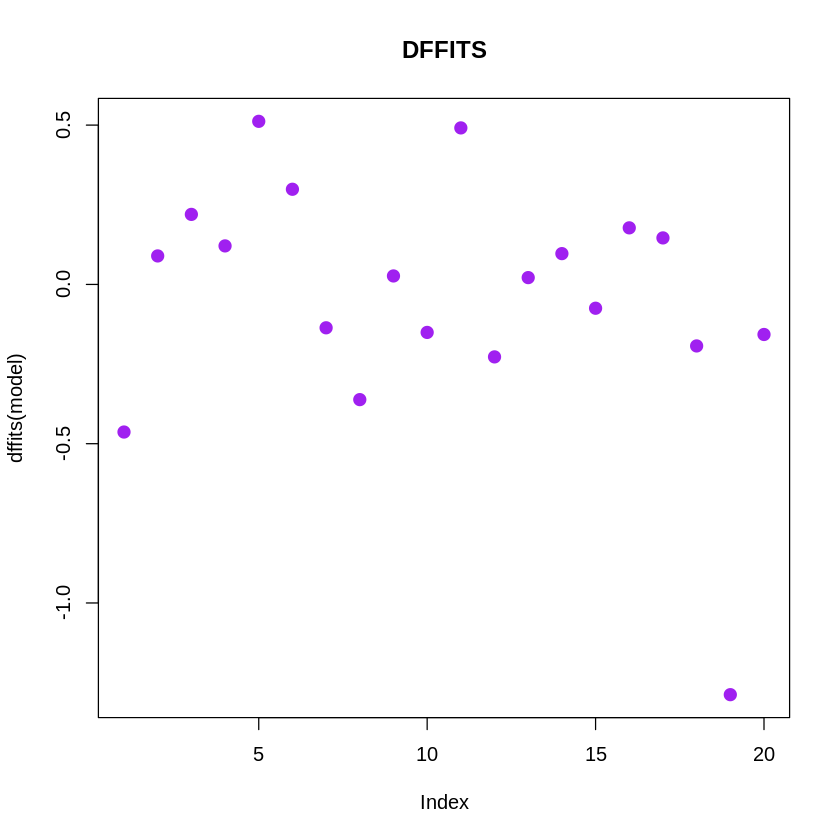

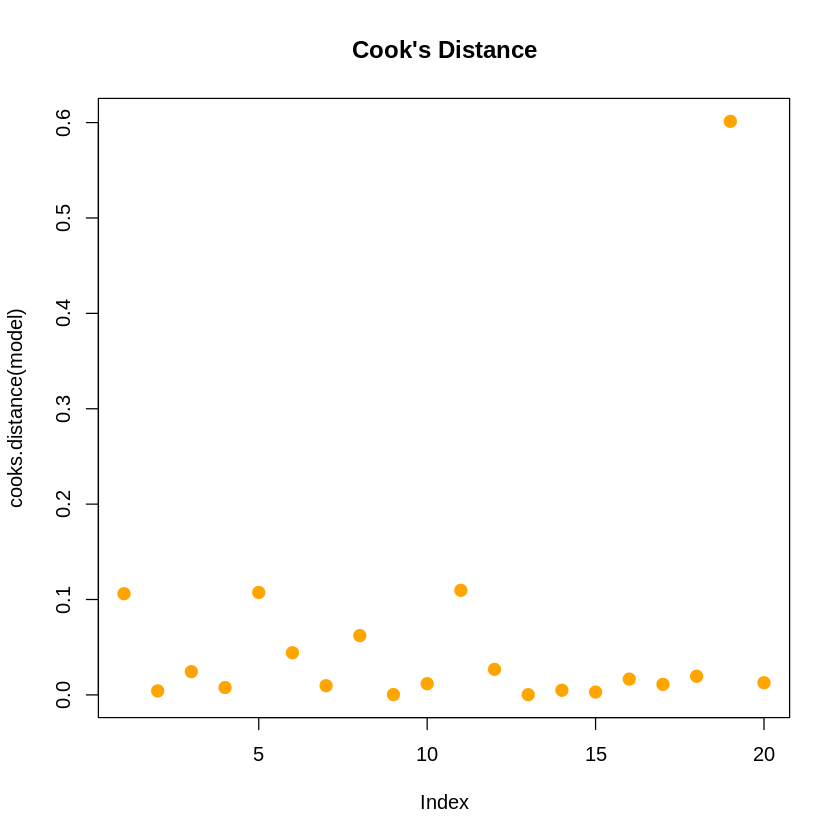

In [ ]:
# Để vẽ chỉ đồ thị về ảnh hưởng
# plot(covratio(model))
# plot(dfbetas(model))
# plot(hatvalues(model))
# plot(dffits(model))
# plot(cooks.distance(model))

cex.points = 2
# Vẽ đồ thị Covariance Ratio
plot(covratio(model), main="Covariance Ratio", col="blue", pch=20, cex=cex.points)

# Vẽ đồ thị DFBETAS
plot(dfbetas(model), main="DFBETAS", col="green", pch=20, cex=cex.points)

# Vẽ đồ thị Leverages (hat values)
plot(hatvalues(model), main="Leverages (Hat Values)", col="red", pch=20, cex=cex.points)

# Vẽ đồ thị DFFITS
plot(dffits(model), main="DFFITS", col="purple", pch=20, cex=cex.points)

# Vẽ đồ thị Cook's Distance
plot(cooks.distance(model), main="Cook's Distance", col="orange", pch=20, cex=cex.points)


1. **dfb.1_**: Thay đổi trong hệ số hồi quy ước tính cho `pH0` khi quan sát bị loại bỏ.

2. **dfb.pH0**: Thay đổi trong hệ số hồi quy ước tính cho `pH0` khi quan sát bị loại bỏ.

3. **dffit**: Sự chênh lệch giữa giá trị dự đoán khi quan sát được đưa vào và khi nó bị loại bỏ. Một giá trị lớn cho thấy quan sát có ảnh hưởng lớn đến giá trị dự đoán.

4. **cov.r**: Tỉ lệ phương sai, đo lường cách việc đưa vào hoặc loại bỏ một điểm dữ liệu ảnh hưởng đến ma trận phương sai của mô hình.

5. **cook.d**: Khoảng cách của Cook, kết hợp ảnh hưởng của quan sát đối với cả giá trị dự đoán và các hệ số hồi quy. Các quan sát có Cook's Distance lớn hơn ngưỡng (thường là $\frac{4}{n}$, với $n$ là số lượng quan sát) sẽ được xem là có ảnh hưởng lớn.

6. **hat**: Giá trị leverage, chỉ ra mức độ quan sát này xa so với trung bình các giá trị biến giải thích. Các quan sát có leverage cao thường là các điểm ngoài nhóm trong không gian của các giá trị biến giải thích.

7. **inf**: Cột này đánh dấu các quan sát có ảnh hưởng. Thường sẽ có dấu `*` cho các quan sát có ảnh hưởng mạnh.


Có thể thấy, giá trị tại index 19 là gây nhiều ảnh hưởng nhất, và hơn hẳn tất cả những chỉ số trên cộng lại, giờ ta sẽ bỏ đi giá trị ở index thứ 19 rồi thực hiện xây dựng lại mô hình

## **Yêu cầu 5. Chỉnh sửa lại mô hình hồi quy mà không có quan sát có ảnh hưởng này và viết mô hình. Diễn giải mô hình và so sánh với diễn giải của bạn về mô hình trước đó.**

In [ ]:
manuka_cleaned <- manuka[-19, ]

In [ ]:
manuka_cleaned

,Aetiology,Duration,Size0,Size2,pH0,pH2,PercentageReduction
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,V,52,4.3,4.0,7.26,7.15,6.976744
2,V,52,2.4,1.5,7.63,7.15,37.500000
3,V,52,7.3,2.9,7.63,7.50,60.273973
4,V,2,4.3,1.4,7.18,7.15,67.441860
5,V,52,3.5,0.1,7.75,6.69,97.142857
6,V,12,10.3,6.0,7.94,7.56,41.747573
7,V,6,0.6,0.6,7.60,5.52,0.000000
8,V,20,0.7,1.1,7.90,7.70,-57.142857
9,V,52,18.3,13.1,7.60,7.76,28.415301


In [ ]:
# Loại bỏ quan sát tại index thứ 19
manuka_cleaned <- manuka[-19, ]

# Xây dựng lại mô hình với dữ liệu đã loại bỏ quan sát tại index thứ 19
model_cleaned <- lm(PercentageReduction ~ pH0, data = manuka_cleaned)

# Xem tóm tắt mô hình mới
summary(model_cleaned)


Call:
lm(formula = PercentageReduction ~ pH0, data = manuka_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.319 -28.589   0.494  21.157  79.070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   426.08     207.11   2.057   0.0553 .
pH0           -52.65      26.87  -1.959   0.0667 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.02 on 17 degrees of freedom
Multiple R-squared:  0.1842,	Adjusted R-squared:  0.1362 
F-statistic: 3.837 on 1 and 17 DF,  p-value: 0.06673


In [ ]:
shapiro.test(model_cleaned$residuals)         #P-value > 0.9611 chứng tỏ phần dư tuân theo phân phối chuẩn


	Shapiro-Wilk normality test

data:  model_cleaned$residuals
W = 0.98179, p-value = 0.9611


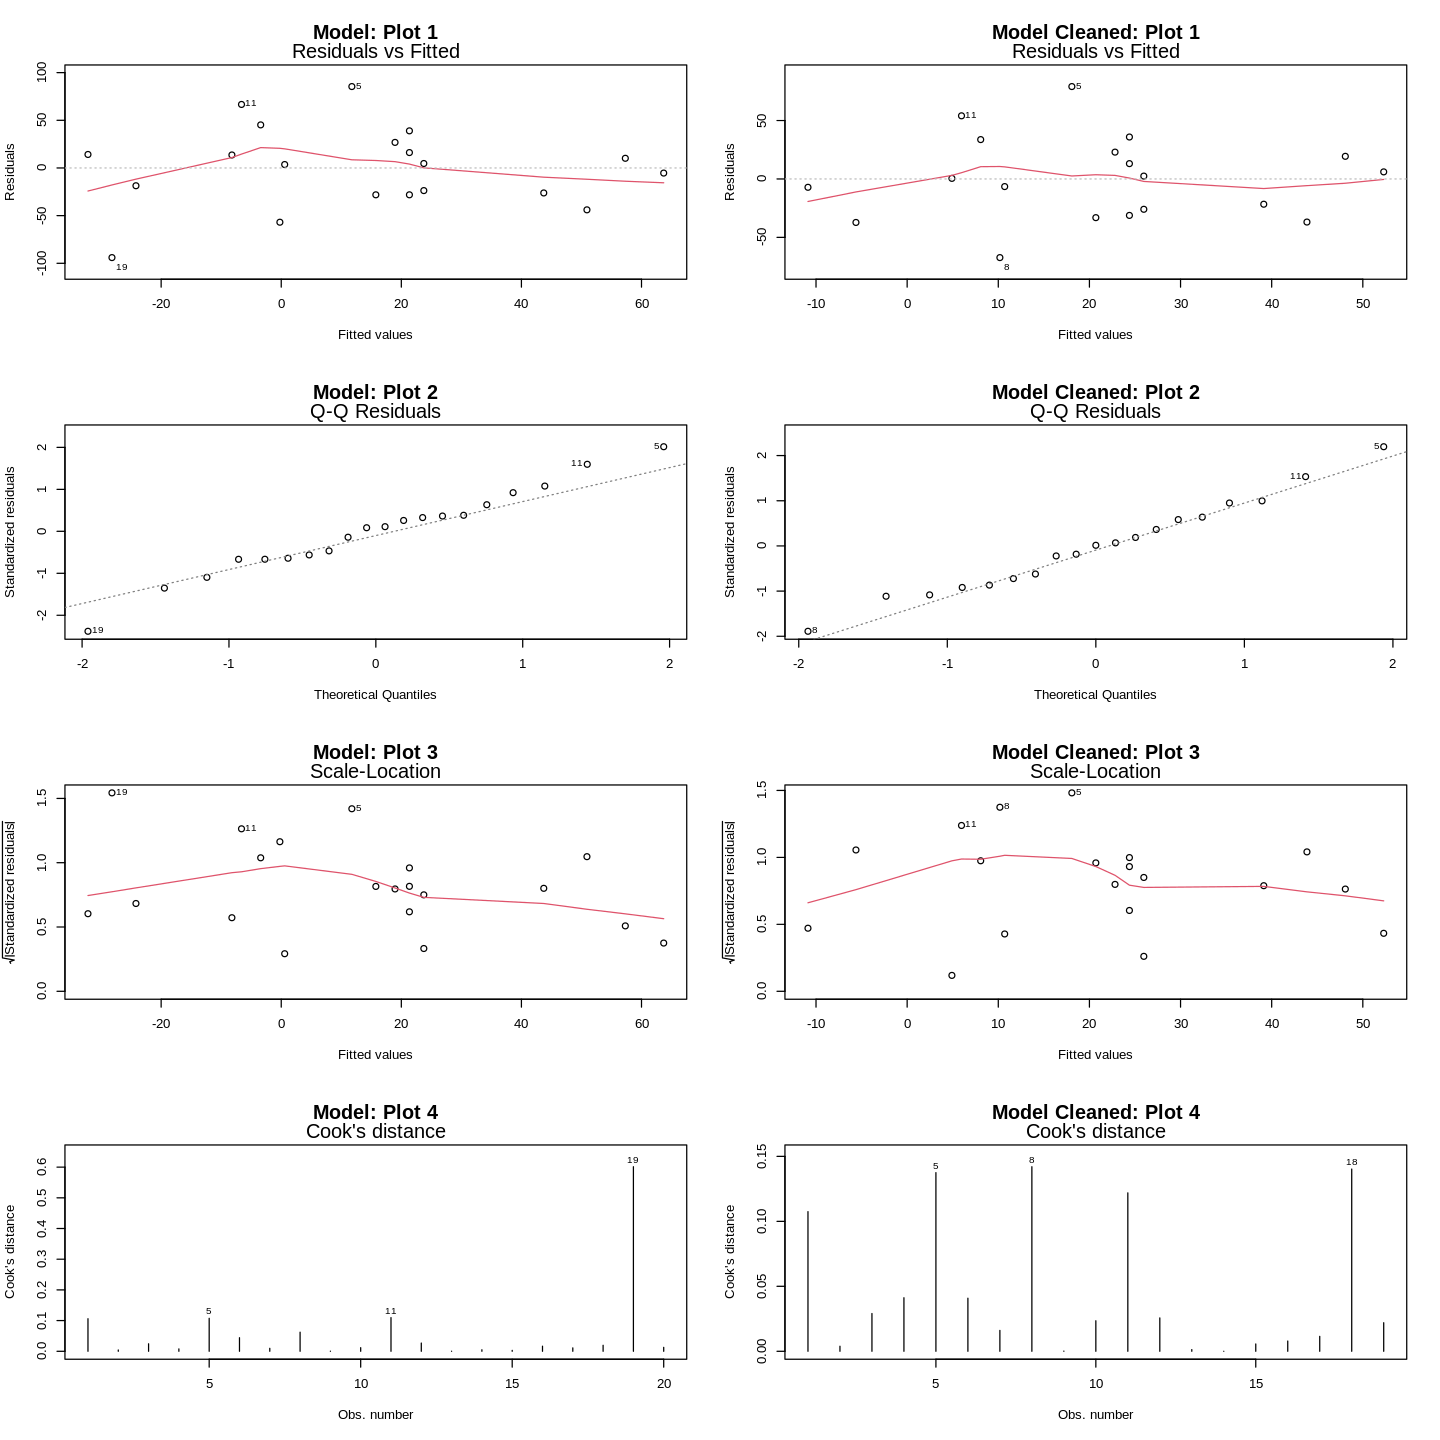

In [ ]:
# Đảm bảo rằng đồ họa sẽ được hiển thị to
options(repr.plot.width=12, repr.plot.height=12)

# Thiết lập layout cho 4 hàng và 2 cột
par(mfrow = c(4, 2))


plot(model, 1, main = "Model: Plot 1", cex.main = 1.5)
plot(model_cleaned, 1, main = "Model Cleaned: Plot 1", cex.main = 1.5)
plot(model, 2, main = "Model: Plot 2", cex.main = 1.5)
plot(model_cleaned, 2, main = "Model Cleaned: Plot 2", cex.main = 1.5)
plot(model, 3, main = "Model: Plot 3", cex.main = 1.5)
plot(model_cleaned, 3, main = "Model Cleaned: Plot 3", cex.main = 1.5)
plot(model, 4, main = "Model: Plot 4", cex.main = 1.5)
plot(model_cleaned, 4, main = "Model Cleaned: Plot 4", cex.main = 1.5)

# Reset layout về mặc định
par(mfrow = c(1, 1))  # Để không ảnh hưởng đến các đồ thị tiếp theo


In [ ]:
summary(influence.measures(model_cleaned))
# plot(covratio(model_cleaned))
# plot(dfbetas(model_cleaned))
# plot(hatvalues(model_cleaned))
# plot(dffits(model_cleaned))
# plot(cooks.distance(model_cleaned))

Potentially influential observations of
	 lm(formula = PercentageReduction ~ pH0, data = manuka_cleaned) :

   dfb.1_ dfb.pH0 dffit cov.r   cook.d hat  
5  -0.07   0.09    0.60  0.61_*  0.14   0.05
15  0.09  -0.09    0.10  1.48_*  0.01   0.24
16  0.11  -0.11   -0.12  1.48_*  0.01   0.24


In [ ]:
summary(model_cleaned)


Call:
lm(formula = PercentageReduction ~ pH0, data = manuka_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.319 -28.589   0.494  21.157  79.070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   426.08     207.11   2.057   0.0553 .
pH0           -52.65      26.87  -1.959   0.0667 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.02 on 17 degrees of freedom
Multiple R-squared:  0.1842,	Adjusted R-squared:  0.1362 
F-statistic: 3.837 on 1 and 17 DF,  p-value: 0.06673


In [ ]:
summary(model)


Call:
lm(formula = PercentageReduction ~ pH0, data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.031 -26.708   4.131  18.816  85.382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   631.01     227.47   2.774   0.0125 *
pH0           -79.90      29.41  -2.717   0.0141 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.47 on 18 degrees of freedom
Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2514 
F-statistic: 7.382 on 1 and 18 DF,  p-value: 0.01413


#### So sánh 2 mô hình


##### 1. **Hệ số hồi quy (Coefficients):**

- **Model Cleaned:**
  - **Intercept:** 426.08, p-value = 0.0553 (gần ngưỡng 0.05, có ý nghĩa ở mức 10%)
  - **pH0:** -52.65, p-value = 0.0667 (gần ngưỡng 0.05, có ý nghĩa ở mức 10%)
  
- **Model:**
  - **Intercept:** 631.01, p-value = 0.0125 (ý nghĩa tại mức 1%)
  - **pH0:** -79.90, p-value = 0.0141 (ý nghĩa tại mức 1%)

**Đánh giá:**
- **model_cleaned** có các hệ số **Intercept** và **pH0** có p-value gần ngưỡng 0.05, có thể coi là có ý nghĩa ở mức 10%, trong khi **model** có các p-value thấp hơn 0.05, chứng tỏ các hệ số có ý nghĩa thống kê mạnh mẽ hơn.
- Hệ số **pH0** trong **model** có giá trị tuyệt đối lớn hơn (−79.90 so với −52.65), chứng tỏ ảnh hưởng mạnh mẽ hơn của **pH0** trong **model**.

##### 2. **Độ lệch chuẩn của sai số (Residual Standard Error):**

- **Model Cleaned:** 37.02
- **Model:** 43.47

**Đánh giá:**
- **model_cleaned** có **Residual Standard Error** thấp hơn, chứng tỏ mô hình này có độ chính xác cao hơn trong việc dự đoán **PercentageReduction**.

##### 3. **R-squared và Adjusted R-squared:**

- **Model Cleaned:**
  - **Multiple R-squared:** 0.1842, **Adjusted R-squared:** 0.1362
- **Model:**
  - **Multiple R-squared:** 0.2908, **Adjusted R-squared:** 0.2514

**Đánh giá:**
- **Model** có **R-squared** và **Adjusted R-squared** cao hơn, chứng tỏ mô hình này giải thích được nhiều phương sai của dữ liệu hơn và có hiệu quả giải thích cao hơn so với **model_cleaned**.

##### 4. **F-statistic và p-value:**

- **Model Cleaned:**
  - **F-statistic:** 3.837, p-value = 0.06673
- **Model:**
  - **F-statistic:** 7.382, p-value = 0.01413

**Đánh giá:**
- **Model** có **F-statistic** và p-value tốt hơn, chứng tỏ rằng mô hình này giải thích dữ liệu tốt hơn và có khả năng phân biệt rõ ràng giữa mô hình có biến giải thích và mô hình không có biến giải thích.

##### 5. **Tóm tắt và Kết luận:**

- **Model Cleaned:** Mô hình này có độ lệch chuẩn của sai số thấp hơn, nhưng chỉ có các hệ số **Intercept** và **pH0** có ý nghĩa thống kê ở mức 10%. Mô hình giải thích khoảng 18.42% phương sai của dữ liệu (R-squared = 0.1842), cho thấy hiệu quả hạn chế trong việc giải thích dữ liệu.
  
- **Model:** Mô hình này có hệ số **pH0** mạnh mẽ hơn (với giá trị tuyệt đối lớn hơn), các giá trị p của các hệ số đều có ý nghĩa thống kê ở mức 1%. Với **R-squared** = 0.2908, mô hình này giải thích được khoảng 29.08% phương sai của dữ liệu, chứng tỏ nó có khả năng giải thích dữ liệu tốt hơn và phù hợp hơn.

##### **Đánh giá cuối cùng:**
- **Model** có ưu thế hơn **model_cleaned** về mặt ý nghĩa thống kê, khả năng giải thích phương sai và các chỉ số F-statistic.
- Mặc dù **model_cleaned** có sai số dự đoán thấp hơn, nhưng về mặt tổng thể, **model** có hiệu quả cao hơn trong việc giải thích dữ liệu và có các hệ số với ý nghĩa thống kê mạnh mẽ hơn.

Vì vậy, nếu mục tiêu của bạn là có một mô hình mạnh mẽ hơn và dễ giải thích hơn về các yếu tố ảnh hưởng, **model** là lựa chọn tốt hơn.


## **Yêu cầu 6. Vẽ đường hồi quy này trên biểu đồ được tạo ở trên. So sánh hai đường hồi quy và bình luận.**

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


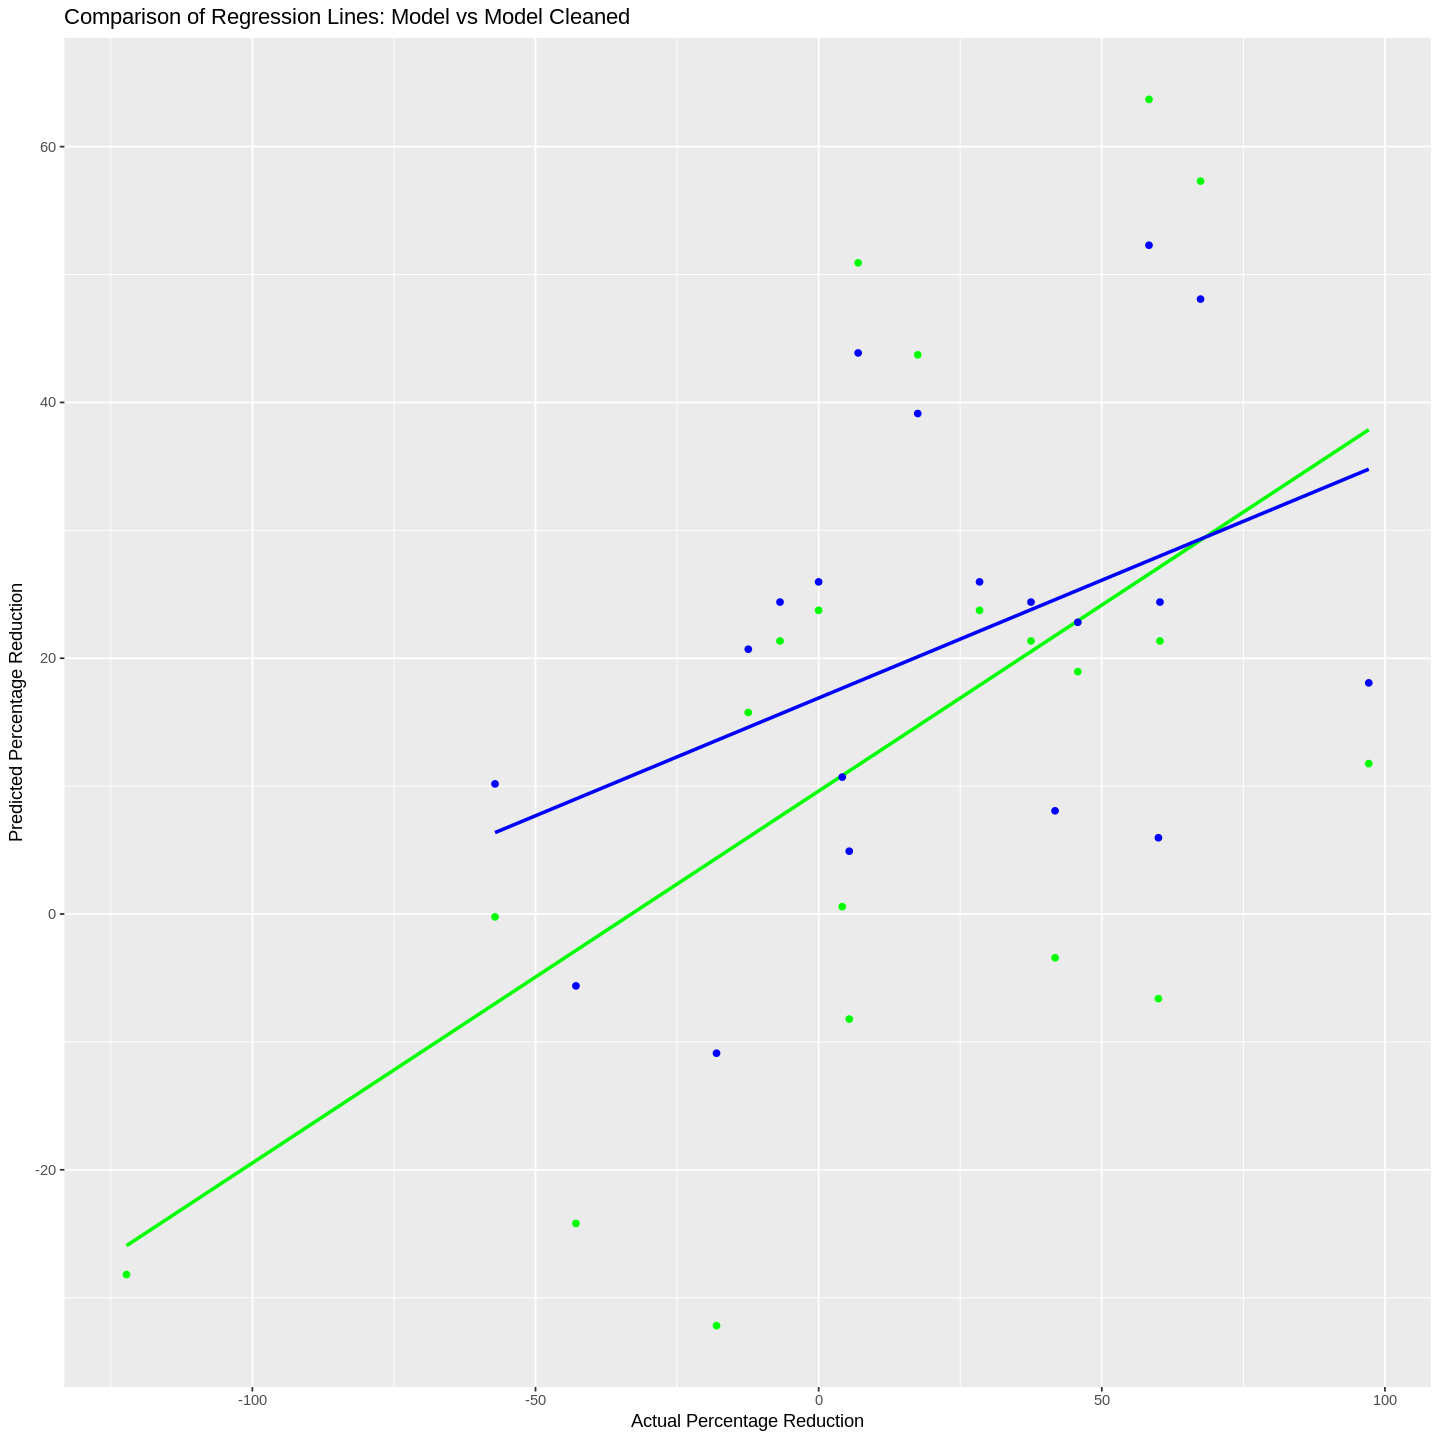

In [ ]:
# Dự đoán từ mô hình gốc và mô hình đã làm sạch
pred_model <- predict(model, manuka)
pred_model_cleaned <- predict(model_cleaned, manuka_cleaned)

# Vẽ biểu đồ so sánh các mô hình
library(ggplot2)
ggplot() +
  geom_point(aes(x = manuka$PercentageReduction, y = pred_model), color = 'green') +
  geom_smooth(aes(x = manuka$PercentageReduction, y = pred_model), method = 'lm', color = 'green', se = FALSE) +
  geom_point(aes(x = manuka_cleaned$PercentageReduction, y = pred_model_cleaned), color = 'blue') +
  geom_smooth(aes(x = manuka_cleaned$PercentageReduction, y = pred_model_cleaned), method = 'lm', color = 'blue', se = FALSE) +
  ggtitle('Comparison of Regression Lines: Model vs Model Cleaned') +
  xlab('Actual Percentage Reduction') +
  ylab('Predicted Percentage Reduction')


#### Phân tích biểu đồ so sánh giữa hai đường hồi quy

##### 1. Đường hồi quy mô hình gốc (màu xanh lá)
- Đường hồi quy này có xu hướng dốc và dường như phù hợp tốt với các dữ liệu còn lại.
- Một số điểm ngoài vùng phân bố chung có thể đang kéo lệch mô hình, làm cho đường hồi quy có độ dốc mạnh hơn.

##### 2. Đường hồi quy mô hình đã làm sạch (màu xanh dương)
- Sau khi loại bỏ điểm ảnh hưởng mạnh, đường hồi quy trở nên phẳng hơn, cho thấy mối quan hệ yếu hơn giữa các biến `PercentageReduction` và `pH0`.
- Mô hình này có thể chính xác hơn và ít bị ảnh hưởng bởi những quan sát ngoại lệ.

##### 3. So sánh giữa hai mô hình
- Đường hồi quy từ mô hình gốc có thể bị lệch do sự hiện diện của điểm dữ liệu có ảnh hưởng mạnh (quan sát tại index 19).
- Mô hình đã làm sạch có sự điều chỉnh, phản ánh mối quan hệ thực tế hơn giữa các biến mà không bị sai lệch bởi điểm dữ liệu đặc biệt này.

##### Kết luận
- **Mô hình đã làm sạch** có thể phản ánh chính xác hơn mối quan hệ giữa `PercentageReduction` và `pH0` mà không bị ảnh hưởng bởi các điểm dữ liệu cực đoan. Nhưng vẫn chưa đủ tiêu chuẩn để làm mô hình dự đoán
- **Mô hình gốc** có thể bị sai lệch do ảnh hưởng của những quan sát ngoại lệ, nhưng nó lại đủ tiêu chuẩn làm mô hình hồi quy dự đoán


## **Yêu cầu Thêm: Tìm ra mô hình tốt nhất.**

### CÁCH 1: Dùng hàm Poly()

Hàm poly sẽ thử xem với lũy thừa thứ bao nhiêu của biến độc lập sẽ cho ra mô hình tốt nhất

In [ ]:
# Thử mô hình với poly() (Bậc 2 hoặc bậc cao hơn)
model_poly <- lm(PercentageReduction ~ poly(pH0, degree = 2), data = manuka)
summary(model_poly)


Call:
lm(formula = PercentageReduction ~ poly(pH0, degree = 2), data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.589 -33.865   0.831  27.511  74.551 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)              13.559      9.521   1.424    0.173  
poly(pH0, degree = 2)1 -118.104     42.578  -2.774    0.013 *
poly(pH0, degree = 2)2  -56.524     42.578  -1.328    0.202  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.58 on 17 degrees of freedom
Multiple R-squared:  0.3574,	Adjusted R-squared:  0.2818 
F-statistic: 4.728 on 2 and 17 DF,  p-value: 0.0233


In [ ]:
# Tạo một data frame để lưu trữ AIC và BIC của từng mô hình
results <- data.frame(Degree = integer(), AIC = numeric(), BIC = numeric())

# Chạy vòng lặp từ degree = 1 đến degree = 5 (hoặc một giá trị khác tùy vào yêu cầu)
for (degree in 1:5) {
  # Xây dựng mô hình với degree tương ứng
  model_poly <- lm(PercentageReduction ~ poly(pH0, degree = degree), data = manuka)

  # Lưu giá trị AIC và BIC của mô hình vào data frame
  results <- rbind(results, data.frame(Degree = degree, AIC = AIC(model_poly), BIC = BIC(model_poly)))
}

# In ra bảng kết quả AIC và BIC để so sánh
print(results)

# Tìm ra degree có AIC nhỏ nhất và BIC nhỏ nhất
best_degree_aic <- results$Degree[which.min(results$AIC)]
best_degree_bic <- results$Degree[which.min(results$BIC)]

# In ra kết quả mô hình tối ưu theo AIC và BIC
cat("Best degree according to AIC:", best_degree_aic, "\n")
cat("Best degree according to BIC:", best_degree_bic, "\n")



  Degree      AIC      BIC
1      1 211.5335 214.5207
2      2 211.5607 215.5436
3      3 211.9831 216.9618
4      4 213.1774 219.1518
5      5 213.8859 220.8560
Best degree according to AIC: 1 
Best degree according to BIC: 1 


### CÁCH 2: Dùng hàm ns()

Chia các quan sát thành các khoảng khác nhau (số df là số khoảng), mỗi khoảng sẽ vẽ các đường ước lượng nhỏ cho khoảng giá trị đó

In [ ]:
# Thử mô hình với ns() (Spline tự nhiên)
library(splines)
model_ns <- lm(PercentageReduction ~ ns(pH0, df = 2), data = manuka)
summary(model_ns)


Call:
lm(formula = PercentageReduction ~ ns(pH0, df = 2), data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.595 -33.479   0.593  27.760  73.755 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)         38.44      27.69   1.388  0.18300   
ns(pH0, df = 2)1   -53.66      58.53  -0.917  0.37206   
ns(pH0, df = 2)2   -96.87      31.50  -3.075  0.00686 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.51 on 17 degrees of freedom
Multiple R-squared:  0.3594,	Adjusted R-squared:  0.284 
F-statistic: 4.768 on 2 and 17 DF,  p-value: 0.02271


In [ ]:
# Tải gói splines nếu chưa tải
library(splines)

# Tạo một vector lưu trữ kết quả AIC và BIC
results <- data.frame(df = integer(), AIC = numeric(), BIC = numeric())

# Chạy vòng lặp với các giá trị df từ 2 đến 10
for (i in 1:10) {
  # Tạo mô hình spline tự nhiên với df = i
  model_ns <- lm(PercentageReduction ~ ns(pH0, df = i), data = manuka)

  # Lưu AIC và BIC vào dataframe
  results <- rbind(results, data.frame(df = i, AIC = AIC(model_ns), BIC = BIC(model_ns)))
}

# In kết quả
print(results)

   df      AIC      BIC
1   1 211.5335 214.5207
2   2 211.5003 215.4832
3   3 211.9840 216.9627
4   4 213.0268 219.0012
5   5 214.9057 221.8758
6   6 216.2442 224.2100
7   7 218.8008 227.7624
8   8 216.7684 226.7258
9   9 215.0887 226.0417
10 10 215.3146 227.2634


### CÁCH 3: Dùng hàm bs()

Cũng chia các khoảng cho quan sát (df khoảng), mỗi khoảng sẽ ước lượng 1 đường phi tuyến tính với cấp của hàm là degree

In [ ]:
# Thử mô hình với bs() (B-spline)
model_bs <- lm(PercentageReduction ~ bs(pH0, df = 2, degree = 2), data = manuka)
summary(model_bs)


Call:
lm(formula = PercentageReduction ~ bs(pH0, df = 2, degree = 2), 
    data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.589 -33.865   0.831  27.511  74.551 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)  
(Intercept)                     37.53      28.39   1.322   0.2036  
bs(pH0, df = 2, degree = 2)1    25.36      57.86   0.438   0.6666  
bs(pH0, df = 2, degree = 2)2   -93.85      34.60  -2.712   0.0148 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.58 on 17 degrees of freedom
Multiple R-squared:  0.3574,	Adjusted R-squared:  0.2818 
F-statistic: 4.728 on 2 and 17 DF,  p-value: 0.0233


In [ ]:
# Tải gói splines nếu chưa tải
library(splines)

# Tạo một dataframe lưu trữ kết quả AIC và BIC
results_bs <- data.frame(df = integer(), degree = integer(), AIC = numeric(), BIC = numeric())

# Chạy vòng lặp với các giá trị df từ 2 đến 10 và degree từ 2 đến 5 (bạn có thể thay đổi phạm vi nếu cần)
for (df in 1:10) {
  for (degree in 1:5) {
    # Tạo mô hình B-spline với df và degree hiện tại
    model_bs <- lm(PercentageReduction ~ bs(pH0, df = df, degree = degree), data = manuka)

    # Lưu AIC và BIC vào dataframe
    results_bs <- rbind(results_bs, data.frame(df = df, degree = degree, AIC = AIC(model_bs), BIC = BIC(model_bs)))
  }
}

# In kết quả để tìm ra mô hình tốt nhất
print(results_bs)

# Lọc ra mô hình có AIC và BIC nhỏ nhất
best_model <- results_bs[which.min(results_bs$AIC), ]
print("Mô hình tốt nhất theo AIC:")
print(best_model)

best_model_bic <- results_bs[which.min(results_bs$BIC), ]
print("Mô hình tốt nhất theo BIC:")
print(best_model_bic)


Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 2”
Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 3”
Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 4”
Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 5”
Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 3”
Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 4”
Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 5”
Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 4”
Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 5”
Warning message in bs(pH0, df = df, degree = degree):
“'df' was too small; have used 5”


   df degree      AIC      BIC
1   1      1 211.5335 214.5207
2   1      2 211.5607 215.5436
3   1      3 211.9831 216.9618
4   1      4 213.1774 219.1518
5   1      5 213.8859 220.8560
6   2      1 211.6968 215.6797
7   2      2 211.5607 215.5436
8   2      3 211.9831 216.9618
9   2      4 213.1774 219.1518
10  2      5 213.8859 220.8560
11  3      1 212.8554 217.8341
12  3      2 211.7917 216.7703
13  3      3 211.9831 216.9618
14  3      4 213.1774 219.1518
15  3      5 213.8859 220.8560
16  4      1 213.5259 219.5003
17  4      2 213.1579 219.1323
18  4      3 213.3123 219.2867
19  4      4 213.1774 219.1518
20  4      5 213.8859 220.8560
21  5      1 214.4729 221.4430
22  5      2 215.1905 222.1606
23  5      3 214.7033 221.6734
24  5      4 214.1690 221.1391
25  5      5 213.8859 220.8560
26  6      1 215.0335 222.9994
27  6      2 216.8395 224.8054
28  6      3 216.3389 224.3047
29  6      4 215.7532 223.7190
30  6      5 215.8320 223.7978
31  7      1 217.4445 226.4061
32  7   

### CÁCH 4: Biến đổi giá trị các biến trong mô hình

In [ ]:
manuka$pH0

[1] 7.26 7.63 7.63 7.18 7.75 7.94 7.60 7.90 7.60 7.70 7.98 7.35 7.89 8.00 7.10
[16] 8.30 7.66 8.20 8.25 7.63

In [ ]:
model <- lm(PercentageReduction ~ pH0, data = manuka)
model_1 <- lm(PercentageReduction ~ I(sqrt(pH0)), data = manuka)
model_2 <- lm(PercentageReduction ~ I(log(pH0)), data = manuka)
model_3 <- lm(PercentageReduction ~ I(1/pH0), data = manuka)
#model_4 <- lm(PercentageReduction ~ I(asin(sqrt(pH0))), data = manuka)
#model_5 <- lm(PercentageReduction ~ I(pH0^(-2)), data = manuka)

In [ ]:
# Fit models
model <- lm(PercentageReduction ~ pH0, data = manuka)
model_1 <- lm(PercentageReduction ~ I(sqrt(pH0)), data = manuka)
model_2 <- lm(PercentageReduction ~ I(log(pH0)), data = manuka)
model_3 <- lm(PercentageReduction ~ I(1/pH0), data = manuka)

# Hàm lấy các chỉ số của một mô hình
get_model_stats <- function(model) {
  summary_model <- summary(model)
  r_squared <- summary_model$r.squared
  residual_std_error <- summary_model$sigma
  f_statistic <- summary_model$fstatistic[1]
  p_value <- pf(summary_model$fstatistic[1], summary_model$fstatistic[2], summary_model$fstatistic[3], lower.tail = FALSE)

  return(c(R_squared = r_squared,
           Residual_Std_Error = residual_std_error,
           F_statistic = f_statistic,
           P_value = p_value))
}

# Lấy thông số cho tất cả các mô hình
model_stats <- rbind(
  Base_Model = get_model_stats(model),
  Model_sqrt = get_model_stats(model_1),
  Model_log = get_model_stats(model_2),
  Model_inv = get_model_stats(model_3)
)
# Chuyển sang data frame để dễ xem
model_stats_df <- as.data.frame(model_stats)

# In kết quả
print(model_stats_df)



           R_squared Residual_Std_Error F_statistic.value P_value.value
Base_Model 0.2908223           43.47037          7.381510    0.01413492
Model_sqrt 0.2873986           43.57517          7.259565    0.01482823
Model_log  0.2839433           43.68069          7.137673    0.01555987
Model_inv  0.2769539           43.89336          6.894679    0.01714354


**Base_Model (mô hình gốc)** là tốt nhất dựa trên tất cả các tiêu chí:
- R_squared cao nhất (0.2908), cho thấy mô hình giải thích được nhiều biến thiên nhất.
- Residual Std Error nhỏ nhất (43.47037), cho thấy sai số còn lại thấp nhất.
- F-statistic cao nhất (7.3815), cho thấy mức độ phù hợp cao nhất.
- P-value nhỏ nhất (0.0141), có ý nghĩa thống kê nhất.

### CÁCH 5: Sử dụng Boxcox

**Box-Cox Transformation** là một phương pháp dùng để chuyển đổi dữ liệu nhằm làm cho phân phối dữ liệu trở nên gần với phân phối chuẩn (normal distribution) hơn, từ đó cải thiện sự phù hợp của mô hình hồi quy hoặc các mô hình thống kê khác.

### Ý nghĩa của Box-Cox Transformation:
1. **Giảm sự không đồng nhất phương sai (heteroscedasticity)**: Khi phương sai của các residuals thay đổi theo giá trị của biến độc lập (tức là dữ liệu không đồng nhất phương sai), Box-Cox có thể giúp làm giảm hiện tượng này.
2. **Biến đổi dữ liệu không chuẩn**: Box-Cox giúp biến đổi các dữ liệu có phân phối không chuẩn (như phân phối lệch) thành phân phối gần với chuẩn hơn, điều này giúp các mô hình hồi quy tuyến tính hoạt động hiệu quả hơn.
3. **Cải thiện độ chính xác của mô hình hồi quy**: Khi dữ liệu đã được chuẩn hóa với Box-Cox, mô hình có thể trở nên chính xác hơn, vì nó giả định rằng các residuals có phân phối chuẩn và có phương sai không đổi.

### Công thức Box-Cox:
Phương pháp Box-Cox định nghĩa một biến đổi sau:

$$
y(\lambda) = \frac{y^\lambda - 1}{\lambda}, \quad \lambda \neq 0
$$

$$
y(\lambda) = \ln(y), \quad \lambda = 0
$$

- $y$ là giá trị dữ liệu gốc.
- $lambda$ là tham số điều chỉnh, được tối ưu để làm cho dữ liệu gần nhất với phân phối chuẩn. Các giá trị của $\lambda$ có thể từ -5 đến 5, và Box-Cox sẽ tìm giá trị $\lambda$ tốt nhất cho dữ liệu.


In [ ]:
model <- lm(PercentageReduction ~ I(log(pH0)), data = manuka)

In [ ]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(MASS)

In [ ]:
manuka$pH0

[1] 7.26 7.63 7.63 7.18 7.75 7.94 7.60 7.90 7.60 7.70 7.98 7.35 7.89 8.00 7.10
[16] 8.30 7.66 8.20 8.25 7.63

In [ ]:
manuka$PercentageReduction

[1]    6.976744   37.500000   60.273973   67.441860   97.142857   41.747573
 [7]    0.000000  -57.142857   28.415301  -12.422360   60.000000   17.500000
[13]    4.166667    5.405405   58.333333  -18.032787   45.762712  -42.857143
[19] -122.222222   -6.818182

In [ ]:
manuka$PercentageReduction_adjusted <- manuka$PercentageReduction + 130

In [ ]:
manuka$PercentageReduction_adjusted

[1] 136.976744 167.500000 190.273973 197.441860 227.142857 171.747573
 [7] 130.000000  72.857143 158.415301 117.577640 190.000000 147.500000
[13] 134.166667 135.405405 188.333333 111.967213 175.762712  87.142857
[19]   7.777778 123.181818

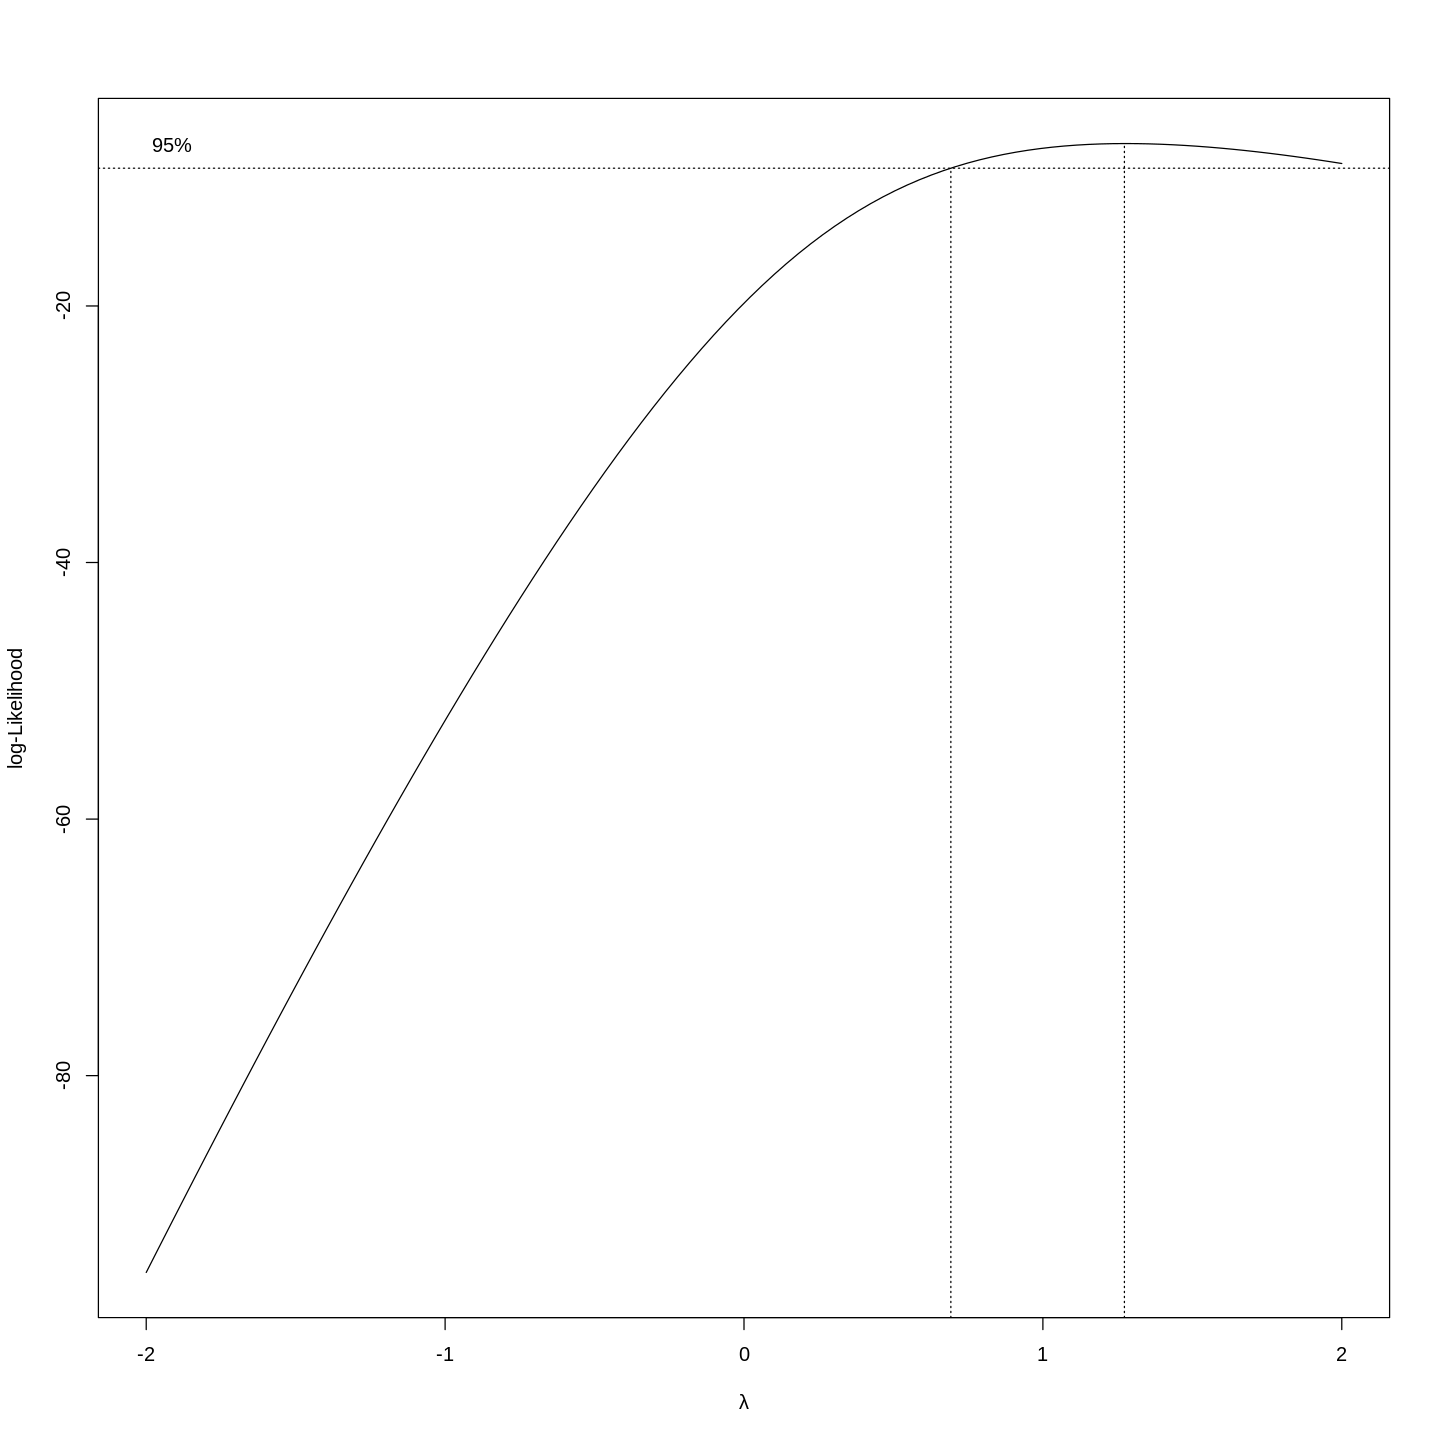

In [ ]:
# Biến đổi Box-Cox
library(MASS)
boxcox_model <- boxcox(PercentageReduction_adjusted ~ pH0, data = manuka)

Lambda tốt nhất là: 1.272727 


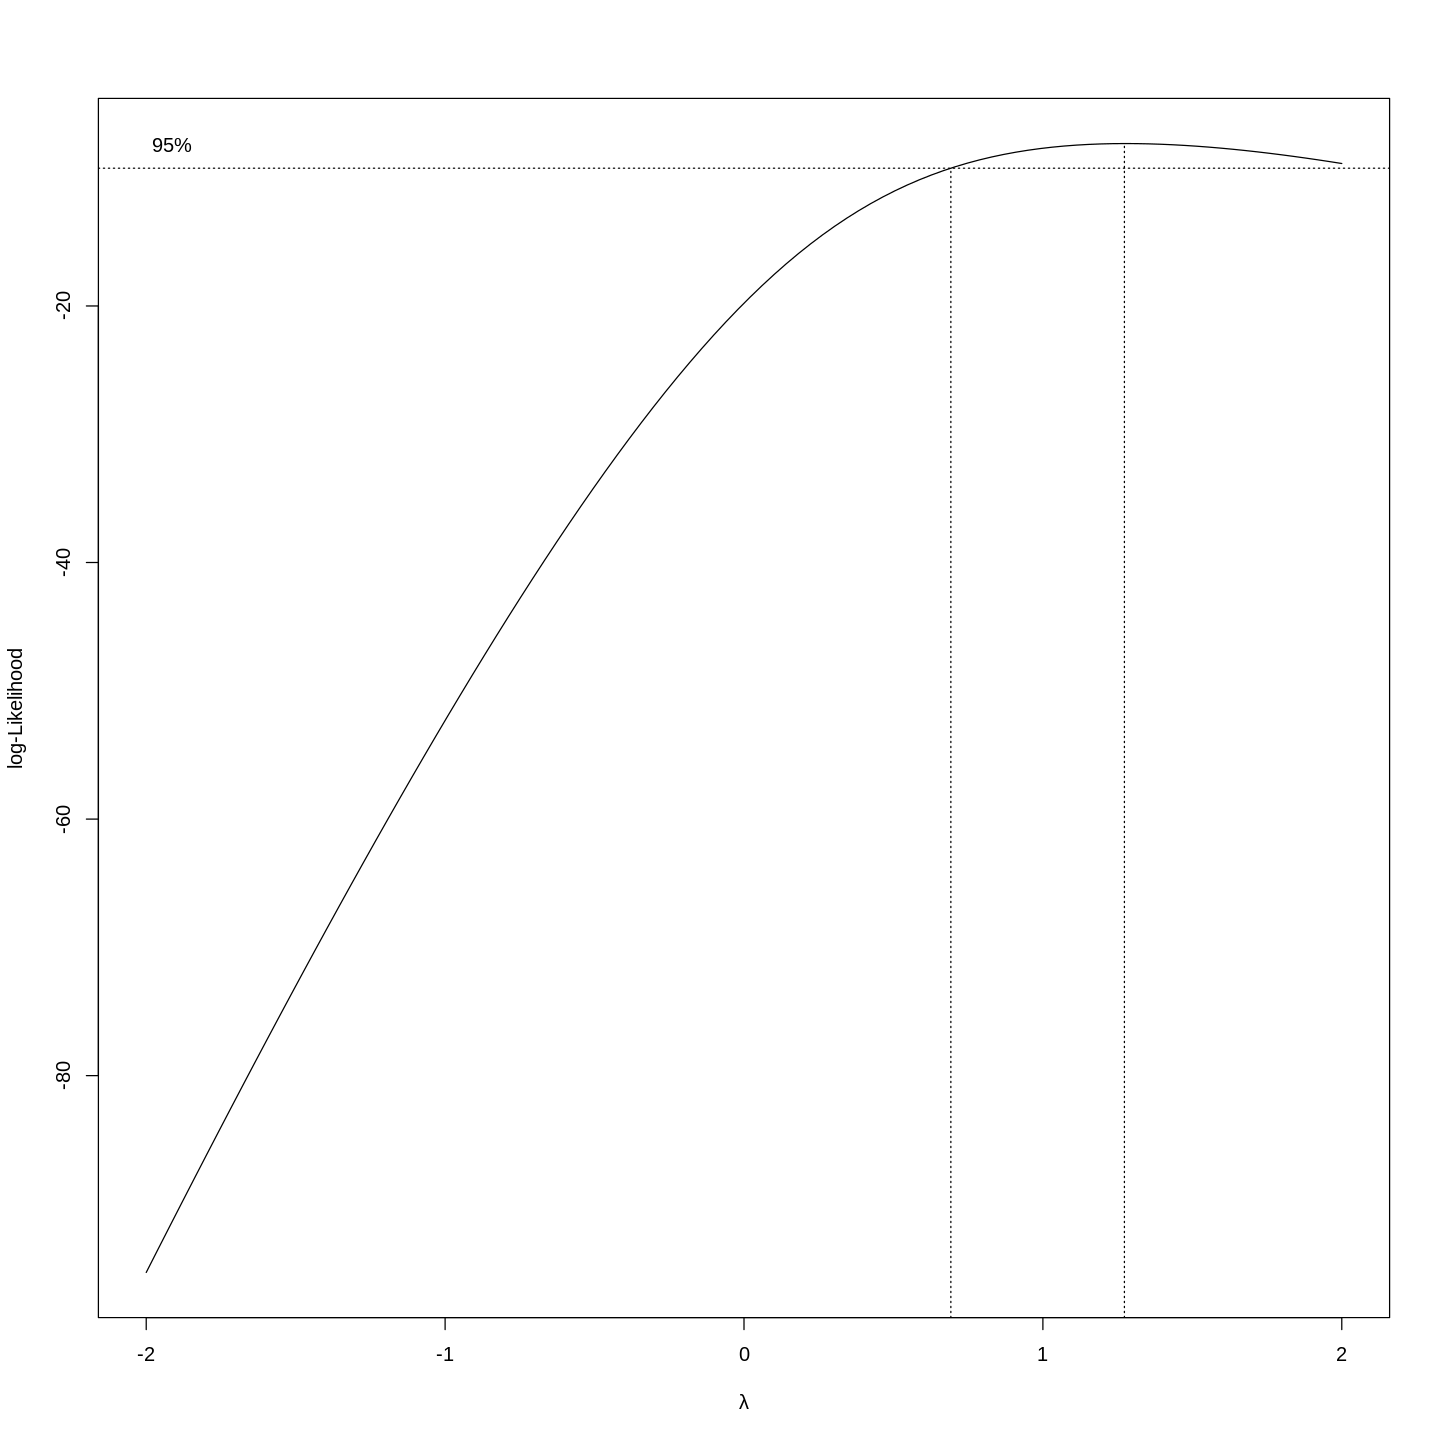

In [ ]:
# Tải gói MASS (nếu chưa tải)
library(MASS)

# Tạo mô hình hồi quy ban đầu
model <- lm(PercentageReduction_adjusted ~ pH0, data = manuka)

# Tìm lambda tốt nhất bằng cách sử dụng Box-Cox Transformation
boxcox_results <- boxcox(model, lambda = seq(-2, 2, 0.1))

# Xác định giá trị lambda tốt nhất (giá trị λ tương ứng với log-likelihood lớn nhất)
lambda_best <- boxcox_results$x[which.max(boxcox_results$y)]

# In giá trị lambda tốt nhất
cat("Lambda tốt nhất là:", lambda_best, "\n")


In [ ]:
lambda_best <- 1.272727

# Thực hiện biến đổi Box-Cox
manuka$PercentageReduction_transformed <- (manuka$PercentageReduction_adjusted^lambda_best - 1) / lambda_best

In [ ]:
model_transformed <- lm(PercentageReduction_transformed ~ pH0, data = manuka)
summary(model_transformed)


Call:
lm(formula = PercentageReduction_transformed ~ pH0, data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-288.35 -105.55    5.76   67.28  342.71 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2641.6      834.4   3.166  0.00535 **
pH0           -284.0      107.9  -2.633  0.01688 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 159.4 on 18 degrees of freedom
Multiple R-squared:  0.2781,	Adjusted R-squared:  0.238 
F-statistic: 6.933 on 1 and 18 DF,  p-value: 0.01688


In [ ]:
manuka$PercentageReduction_adjusted

[1] 136.976744 167.500000 190.273973 197.441860 227.142857 171.747573
 [7] 130.000000  72.857143 158.415301 117.577640 190.000000 147.500000
[13] 134.166667 135.405405 188.333333 111.967213 175.762712  87.142857
[19]   7.777778 123.181818

In [ ]:
old_model <- lm(PercentageReduction_adjusted ~ pH0, data = manuka)
summary(old_model)


Call:
lm(formula = PercentageReduction_adjusted ~ pH0, data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.031 -26.708   4.131  18.816  85.382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   761.01     227.47   3.346   0.0036 **
pH0           -79.90      29.41  -2.717   0.0141 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.47 on 18 degrees of freedom
Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2514 
F-statistic: 7.382 on 1 and 18 DF,  p-value: 0.01413


##### Kết luận

### Mô hình cũ (không biến đổi):
- **$R^2$ cao hơn**: Mô hình giải thích được nhiều sự biến động trong dữ liệu hơn.
- **Residual Standard Error (RSE) thấp hơn**: Dự đoán chính xác hơn.
- **p-value thấp hơn**: Mối quan hệ giữa `pH0` và `PercentageReduction` rõ ràng và có ý nghĩa.
- **F-statistic cao hơn**: Mô hình cũ có mức độ giải thích sự biến động của dữ liệu tốt hơn, với độ tin cậy cao hơn.

### Mô hình Box-Cox:
- **$R^2$ thấp hơn**, **RSE cao hơn**, và **F-statistic thấp hơn** khiến mô hình này kém hiệu quả hơn trong trường hợp này. Tuy nhiên, mô hình Box-Cox vẫn có thể thử nghiệm với các biến đổi dữ liệu khác để cải thiện kết quả.



### CÁCH 6: Bỏ một số giá trị (hàng)

#### 6.1. Loại bỏ cả 4 giá trị outliners (4,15,16,19)

In [ ]:
manuka

Aetiology,Duration,Size0,Size2,pH0,pH2,PercentageReduction,PercentageReduction_adjusted,PercentageReduction_transformed
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
V,52,4.3,4.0,7.26,7.15,6.976744,136.976744,410.963581
V,52,2.4,1.5,7.63,7.15,37.500000,167.500000,531.112388
V,52,7.3,2.9,7.63,7.50,60.273973,190.273973,624.808077
V,2,4.3,1.4,7.18,7.15,67.441860,197.441860,654.955127
V,52,3.5,0.1,7.75,6.69,97.142857,227.142857,782.987121
V,12,10.3,6.0,7.94,7.56,41.747573,171.747573,548.338205
V,6,0.6,0.6,7.60,5.52,0.000000,130.000000,384.459740
V,20,0.7,1.1,7.90,7.70,-57.142857,72.857143,183.581340
V,52,18.3,13.1,7.60,7.76,28.415301,158.415301,494.671252


In [ ]:
manuka_cleaned

,Aetiology,Duration,Size0,Size2,pH0,pH2,PercentageReduction
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,V,52,4.3,4.0,7.26,7.15,6.976744
2,V,52,2.4,1.5,7.63,7.15,37.500000
3,V,52,7.3,2.9,7.63,7.50,60.273973
4,V,2,4.3,1.4,7.18,7.15,67.441860
5,V,52,3.5,0.1,7.75,6.69,97.142857
6,V,12,10.3,6.0,7.94,7.56,41.747573
7,V,6,0.6,0.6,7.60,5.52,0.000000
8,V,20,0.7,1.1,7.90,7.70,-57.142857
9,V,52,18.3,13.1,7.60,7.76,28.415301


In [ ]:
influence_measures <- influence.measures(model)

# Xem kết quả
summary(influence_measures)

Potentially influential observations of
	 lm(formula = PercentageReduction_adjusted ~ pH0, data = manuka) :

   dfb.1_  dfb.pH0 dffit   cov.r   cook.d hat  
4   0.11   -0.10    0.12    1.37_*  0.01   0.19
15 -0.07    0.07   -0.07    1.45_*  0.00   0.23
16 -0.15    0.15    0.18    1.38_*  0.02   0.20
19  1.06_* -1.09_* -1.29_*  0.64_*  0.60   0.17


In [ ]:
ob_remove = c(4,15,16,19)
manuka_cleaned_4_values <- manuka[-ob_remove,]

In [ ]:
manuka_cleaned_4_values

,Aetiology,Duration,Size0,Size2,pH0,pH2,PercentageReduction,PercentageReduction_adjusted,PercentageReduction_transformed
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,V,52,4.3,4.0,7.26,7.15,6.976744,136.97674,410.9636
2,V,52,2.4,1.5,7.63,7.15,37.500000,167.50000,531.1124
3,V,52,7.3,2.9,7.63,7.50,60.273973,190.27397,624.8081
5,V,52,3.5,0.1,7.75,6.69,97.142857,227.14286,782.9871
6,V,12,10.3,6.0,7.94,7.56,41.747573,171.74757,548.3382
7,V,6,0.6,0.6,7.60,5.52,0.000000,130.00000,384.4597
8,V,20,0.7,1.1,7.90,7.70,-57.142857,72.85714,183.5813
9,V,52,18.3,13.1,7.60,7.76,28.415301,158.41530,494.6713
10,V,52,16.1,18.1,7.70,7.42,-12.422360,117.57764,338.2324


In [ ]:
model_cleaned_4_values <- lm(PercentageReduction ~ pH0, data = manuka_cleaned_4_values)
model_cleaned_4_values


Call:
lm(formula = PercentageReduction ~ pH0, data = manuka_cleaned_4_values)

Coefficients:
(Intercept)          pH0  
     263.57       -31.78  


In [ ]:
summary(model_cleaned_4_values)


Call:
lm(formula = PercentageReduction ~ pH0, data = manuka_cleaned_4_values)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.673 -26.400  -6.315  26.826  79.846 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   263.57     328.18   0.803    0.435
pH0           -31.78      42.42  -0.749    0.466

Residual standard error: 40.02 on 14 degrees of freedom
Multiple R-squared:  0.03853,	Adjusted R-squared:  -0.03014 
F-statistic: 0.5611 on 1 and 14 DF,  p-value: 0.4662


In [ ]:
shapiro.test(model_cleaned_4_values$residuals)   #p > 0.05 ==> phần dư tuân theo phân phối chuẩn


	Shapiro-Wilk normality test

data:  model_cleaned_4_values$residuals
W = 0.98687, p-value = 0.9957


In [ ]:
new_influence_measures <- influence.measures(model_cleaned_4_values)

# Xem kết quả
summary(new_influence_measures)

Potentially influential observations of
	 lm(formula = PercentageReduction ~ pH0, data = manuka_cleaned_4_values) :

   dfb.1_ dfb.pH0 dffit cov.r   cook.d hat  
1  -0.47   0.46   -0.52  1.55_*  0.14   0.31
12 -0.16   0.16   -0.19  1.47_*  0.02   0.23


In [ ]:
new_influence_measures

Influence measures of
	 lm(formula = PercentageReduction ~ pH0, data = manuka_cleaned_4_values) :

    dfb.1_ dfb.pH0   dffit cov.r   cook.d    hat inf
1  -0.4717  0.4649 -0.5196 1.545 0.139035 0.3133   *
2   0.0499 -0.0466  0.1170 1.221 0.007270 0.0743    
3   0.1230 -0.1150  0.2885 1.075 0.041513 0.0743    
5  -0.0268  0.0456  0.6161 0.601 0.142392 0.0628    
6  -0.1794  0.1860  0.2815 1.186 0.040691 0.1109    
7  -0.0867  0.0823 -0.1680 1.205 0.014833 0.0822    
8   0.3605 -0.3768 -0.6508 0.741 0.173564 0.0940    
9   0.0247 -0.0234  0.0478 1.259 0.001229 0.0822    
10 -0.0347  0.0284 -0.2081 1.126 0.022226 0.0637    
11 -0.3780  0.3895  0.5380 1.014 0.135860 0.1313    
12 -0.1615  0.1586 -0.1864 1.473 0.018534 0.2269   *
13  0.0367 -0.0384 -0.0692 1.266 0.002569 0.0904    
14  0.0306 -0.0315 -0.0419 1.351 0.000946 0.1429    
17  0.0568 -0.0517  0.1759 1.168 0.016131 0.0684    
18  0.8368 -0.8503 -0.9524 1.253 0.422237 0.3080    
20 -0.0861  0.0804 -0.2018 1.160 0.021111 0.0743    

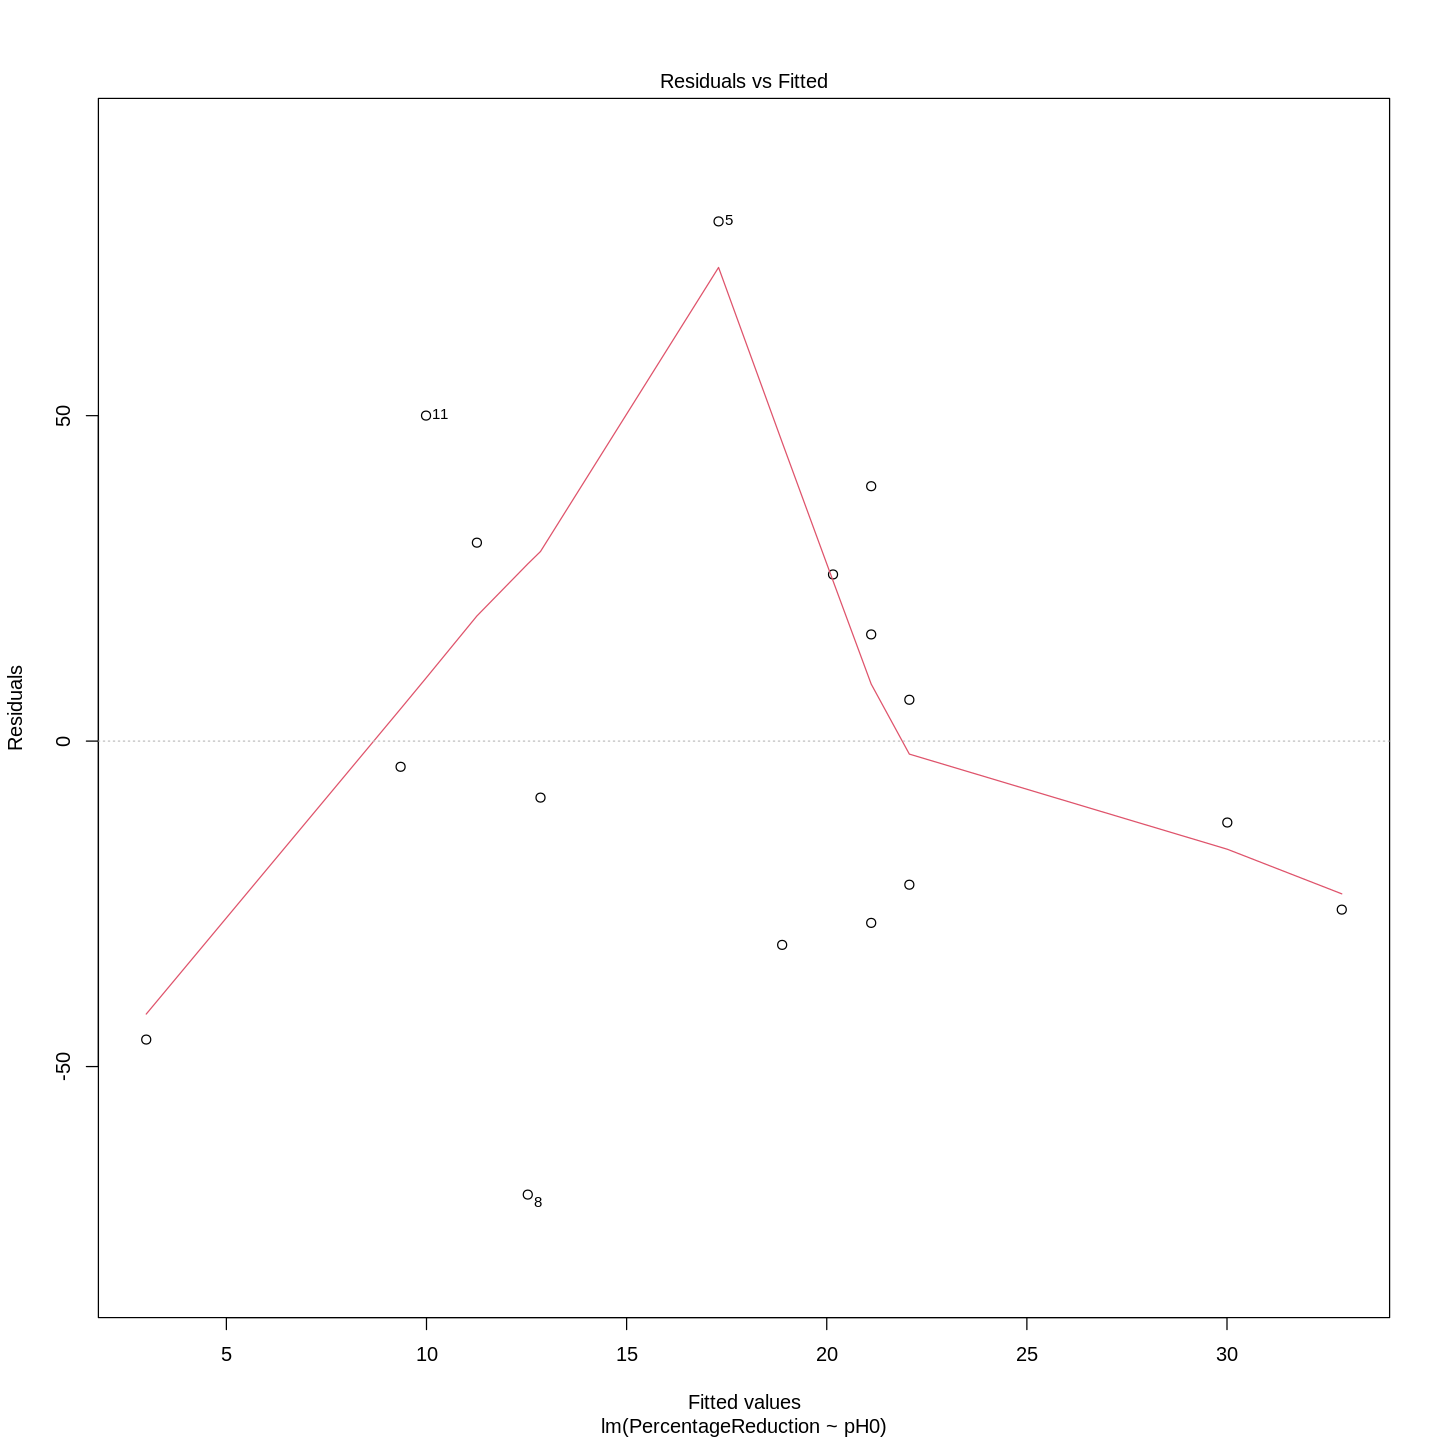

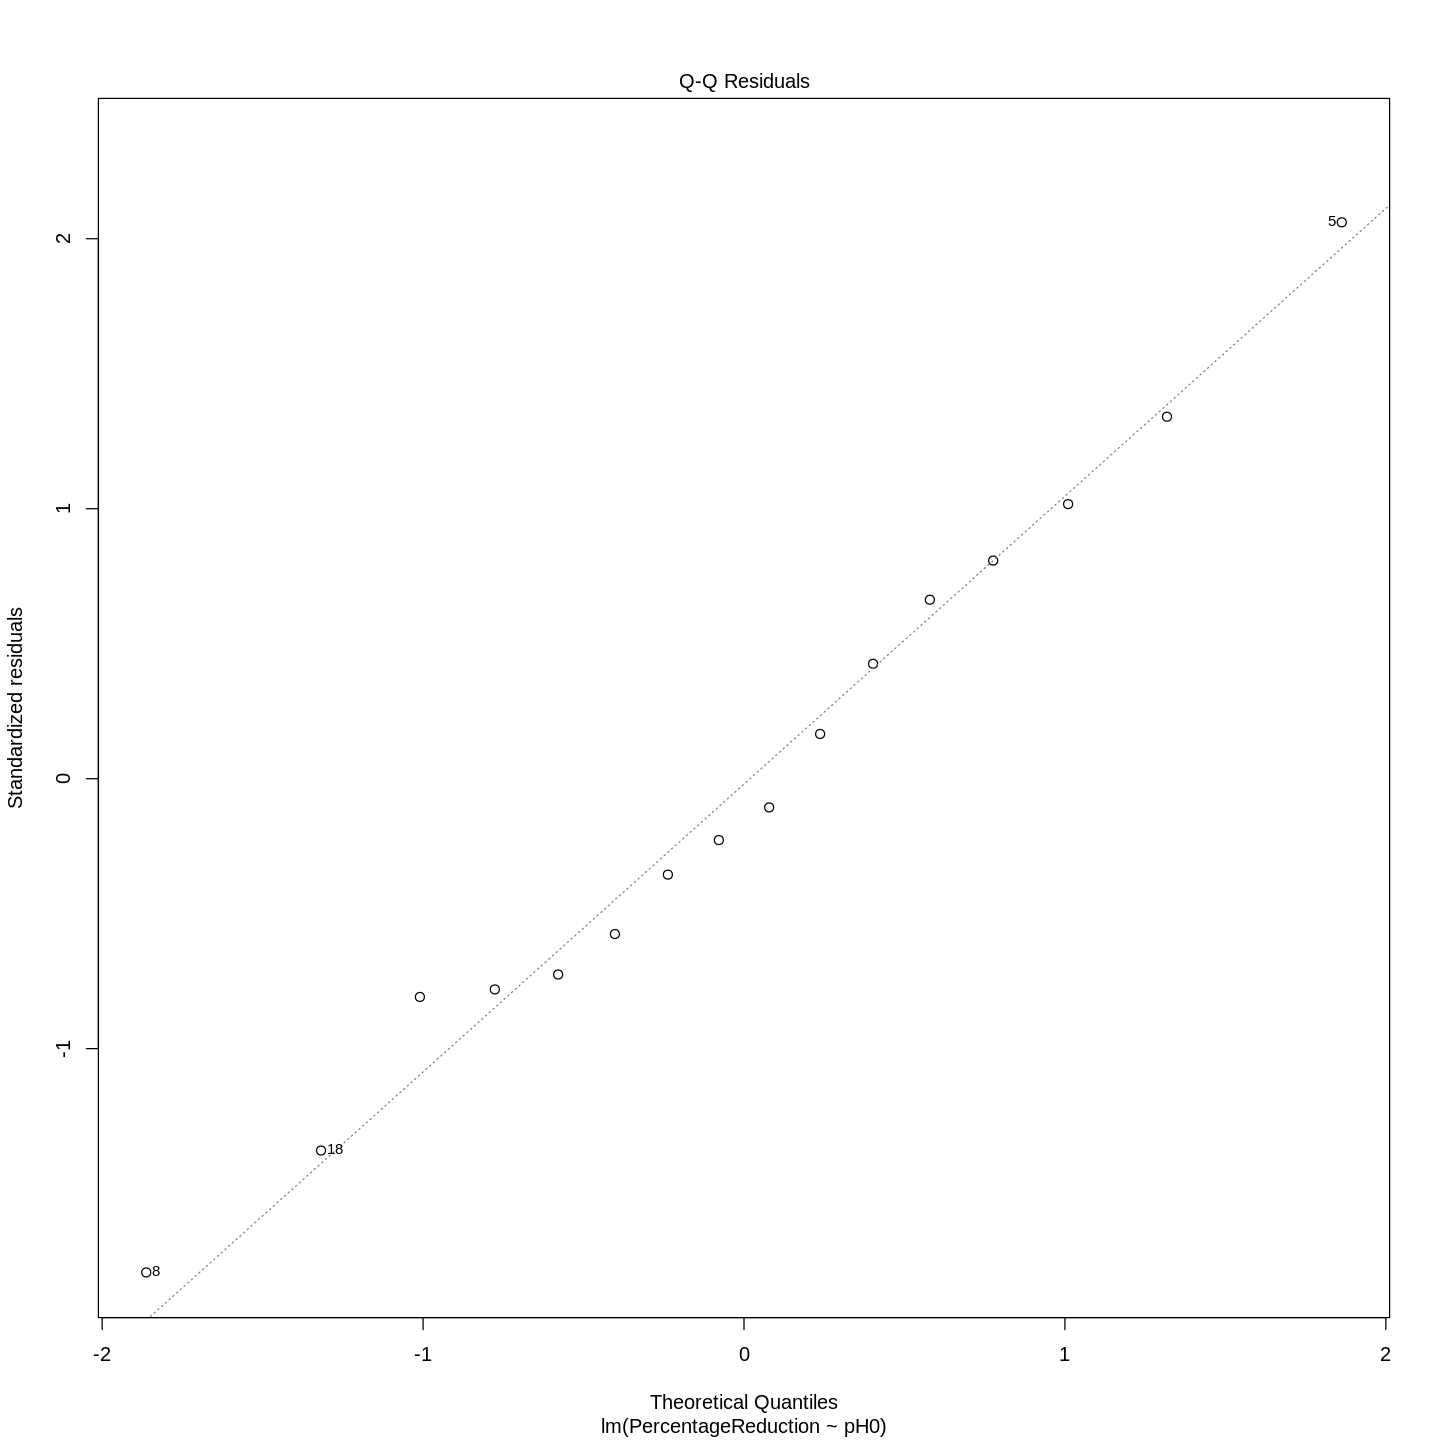

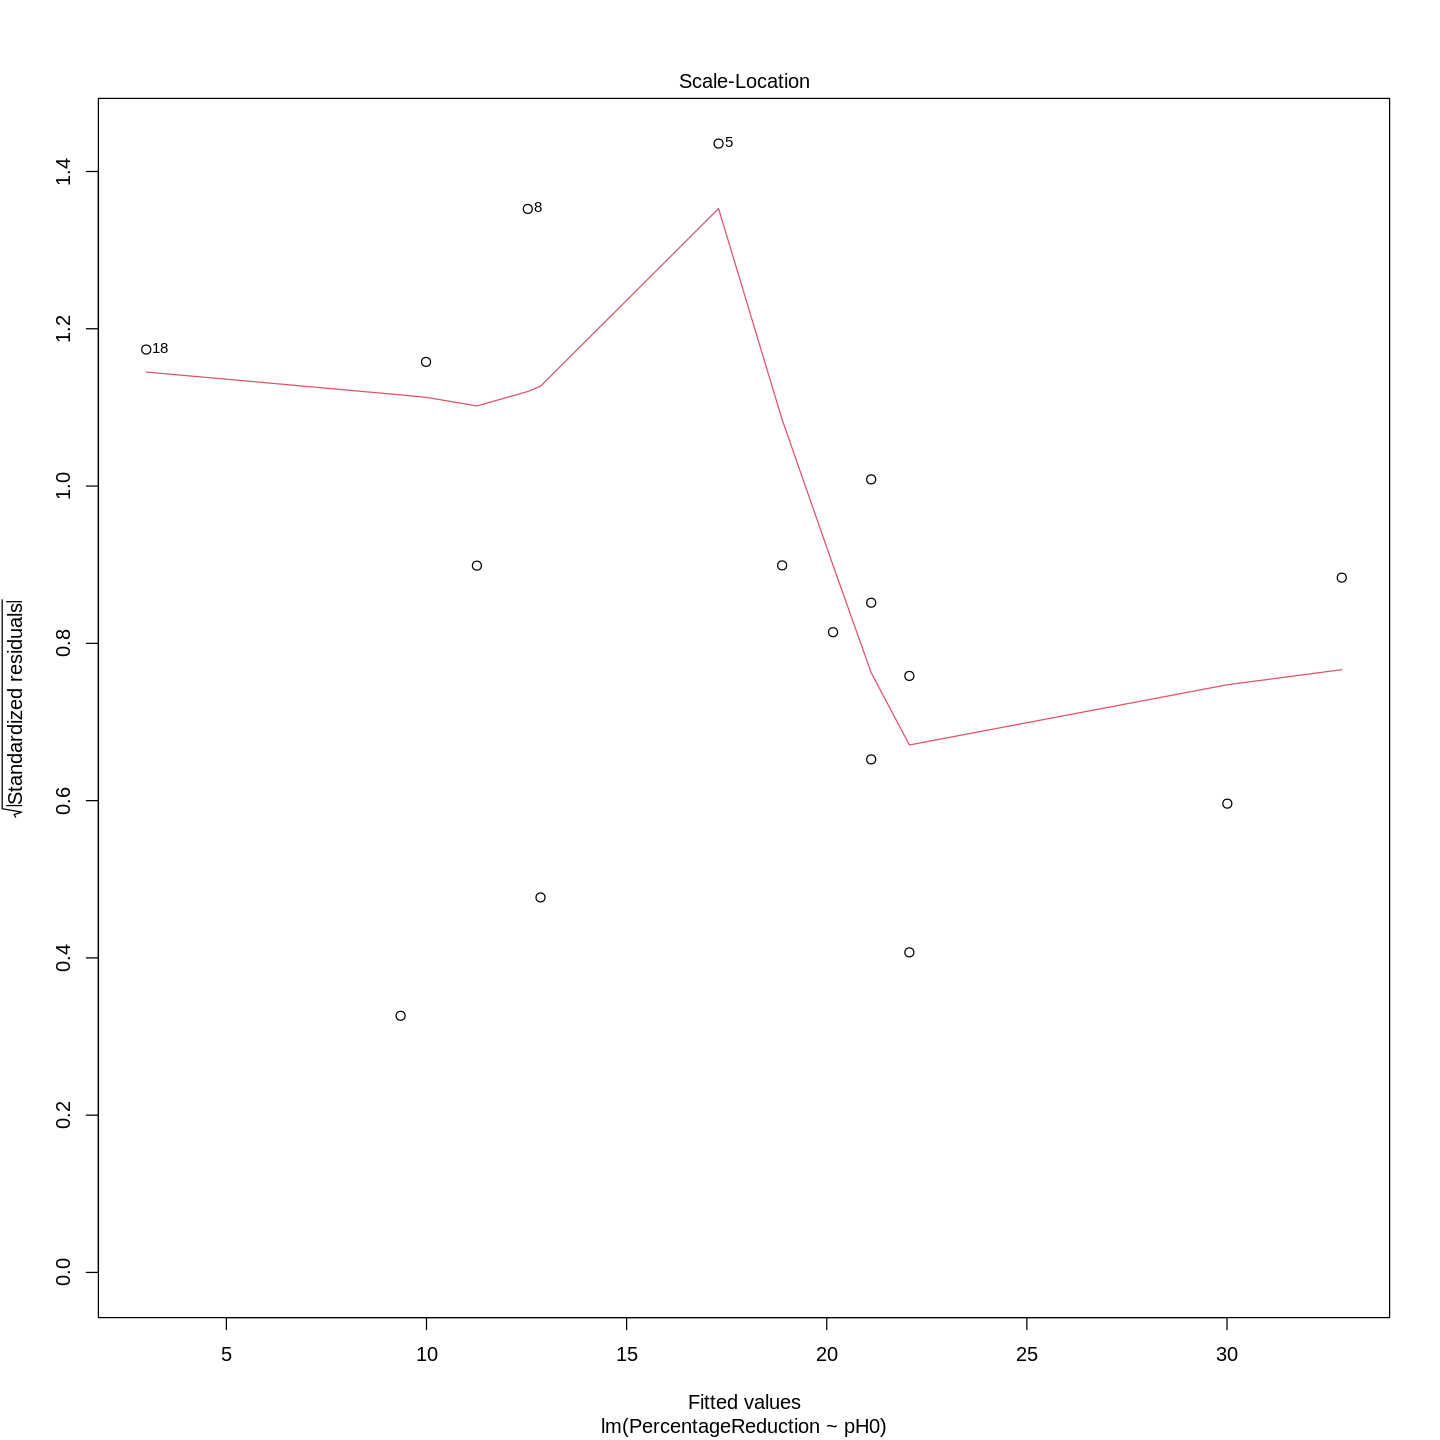

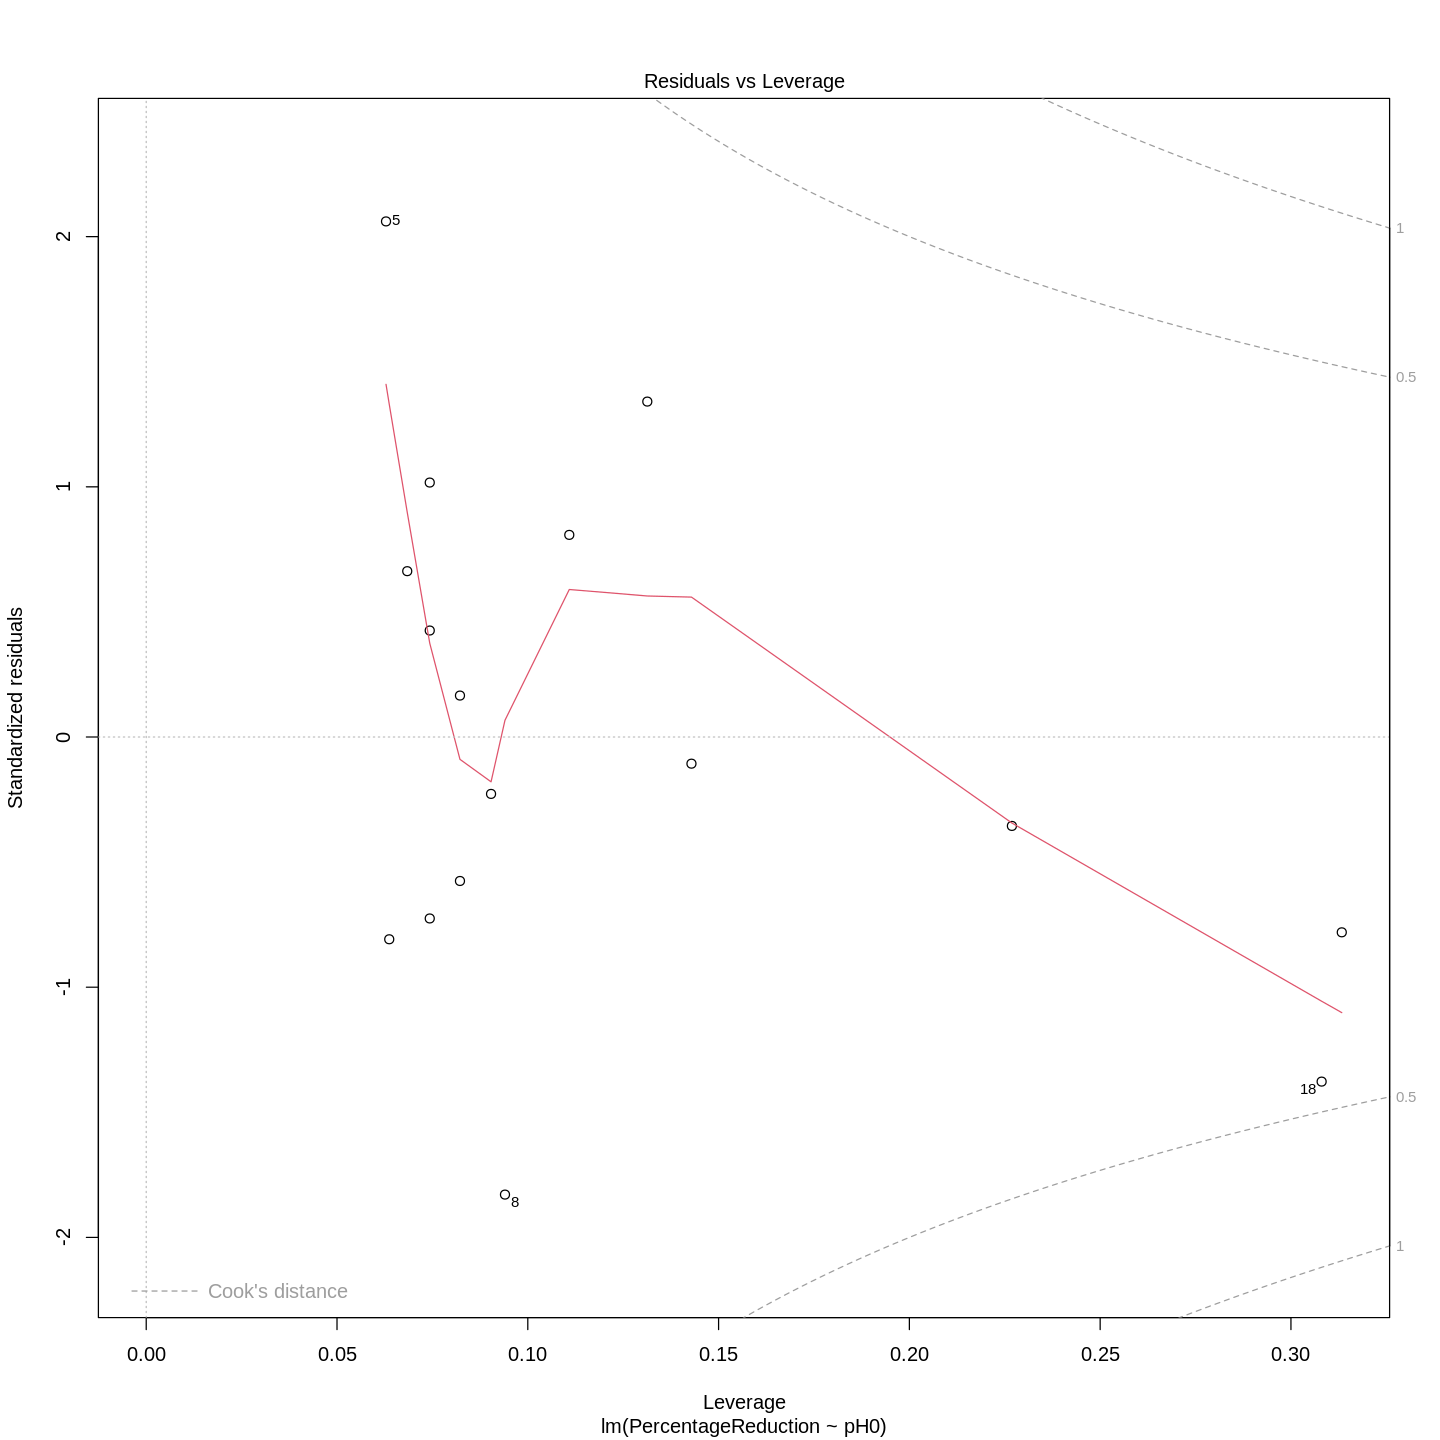

In [ ]:
plot(model_cleaned_4_values)

In [ ]:
summary(model_cleaned_4_values)
# Call:
# lm(formula = PercentageReduction ~ pH0, data = manuka_cleaned_4_values)

# Residuals:
#     Min      1Q  Median      3Q     Max
# -69.673 -26.400  -6.315  26.826  79.846

# Coefficients:
#             Estimate Std. Error t value Pr(>|t|)
# (Intercept)   263.57     328.18   0.803    0.435
# pH0           -31.78      42.42  -0.749    0.466

# Residual standard error: 40.02 on 14 degrees of freedom
# Multiple R-squared:  0.03853,	Adjusted R-squared:  -0.03014
# F-statistic: 0.5611 on 1 and 14 DF,  p-value: 0.4662
summary(model)
# Call:
# lm(formula = PercentageReduction_adjusted ~ pH0, data = manuka)

# Residuals:
#     Min      1Q  Median      3Q     Max
# -94.031 -26.708   4.131  18.816  85.382

# Coefficients:
#             Estimate Std. Error t value Pr(>|t|)
# (Intercept)   761.01     227.47   3.346   0.0036 **
# pH0           -79.90      29.41  -2.717   0.0141 *
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Residual standard error: 43.47 on 18 degrees of freedom
# Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2514
# F-statistic: 7.382 on 1 and 18 DF,  p-value: 0.01413


Call:
lm(formula = PercentageReduction_adjusted ~ pH0, data = manuka)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.031 -26.708   4.131  18.816  85.382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   761.01     227.47   3.346   0.0036 **
pH0           -79.90      29.41  -2.717   0.0141 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.47 on 18 degrees of freedom
Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2514 
F-statistic: 7.382 on 1 and 18 DF,  p-value: 0.01413


Kết luận:

**Mô hình ban đầu tốt hơn** về mặt ý nghĩa thống kê và khả năng giải thích dữ liệu (R-squared cao hơn).

**Loại bỏ các quan sát** 4, 15, 16, và 19 đã **làm giảm** đáng kể hiệu suất và **ý nghĩa** của mô hình.

**Nếu các quan sát bị loại bỏ không gây ra vấn đề lớn về tính hợp lệ của dữ liệu, bạn nên giữ chúng trong mô hình**. Hoặc thử phương pháp khác như **hồi quy mạnh mẽ (rlm)** để giảm tác động của các quan sát bất thường mà không cần loại bỏ chúng.

#### 6.2. Thử tất cả trường hợp loại biến có thể (trong 4 giá trị này)

In [ ]:
# Danh sách các quan sát cần xem xét
observations <- c(4, 15, 16, 19)

# Hàm để kiểm tra hiệu suất mô hình
evaluate_model <- function(data, remove_obs) {
  # Loại bỏ các quan sát
  cleaned_data <- data[setdiff(1:nrow(data), remove_obs), ]

  # Xây dựng mô hình
  model <- lm(PercentageReduction_adjusted ~ pH0, data = cleaned_data)
  model_summary <- summary(model)

  # Trích xuất các tiêu chí
  r_squared <- model_summary$r.squared
  adj_r_squared <- model_summary$adj.r.squared
  residual_se <- model_summary$sigma
  aic <- AIC(model)
  bic <- BIC(model)
  f_statistic <- model_summary$fstatistic[1]  # Giá trị F
  p_value <- pf(f_statistic, model_summary$fstatistic[2], model_summary$fstatistic[3], lower.tail = FALSE)  # p-value của F

  return(list(
    model = model,
    r_squared = r_squared,
    adj_r_squared = adj_r_squared,
    residual_se = residual_se,
    aic = aic,
    bic = bic,
    f_statistic = f_statistic,
    p_value = p_value
  ))
}

# Tìm tất cả các tổ hợp có thể
all_combinations <- unlist(lapply(1:length(observations), function(x) {
  combn(observations, x, simplify = FALSE)
}), recursive = FALSE)

# Thêm trường hợp không loại bỏ gì
all_combinations <- c(list(NULL), all_combinations)

# Lặp qua tất cả các tổ hợp và lưu kết quả
results <- lapply(all_combinations, function(comb) {
  res <- evaluate_model(manuka, comb)
  res$removed_obs <- comb  # Thêm thông tin về các quan sát đã loại bỏ
  return(res)
})

# Lập bảng kết quả
results_table <- do.call(rbind, lapply(results, function(res) {
  data.frame(
    Removed_Observations = paste(res$removed_obs, collapse = ", "),
    R_Squared = res$r_squared,
    Adjusted_R_Squared = res$adj_r_squared,
    Residual_Standard_Error = res$residual_se,
    AIC = res$aic,
    BIC = res$bic,
    F_Statistic = res$f_statistic,
    P_Value = res$p_value
  )
}))

# Hiển thị bảng kết quả
print(results_table)

# Tìm mô hình tốt nhất dựa trên Adjusted R-squared
best_model_idx <- which.max(results_table$Adjusted_R_Squared)
best_model <- results[[best_model_idx]]

# Hiển thị kết quả của mô hình tốt nhất
print(best_model$model)
print(paste("Best Adjusted R-squared:", best_model$adj_r_squared))
print(paste("Residual Standard Error:", best_model$residual_se))
print(paste("AIC:", best_model$aic))
print(paste("BIC:", best_model$bic))
print(paste("F-Statistic:", best_model$f_statistic))
print(paste("P-Value:", best_model$p_value))



        Removed_Observations  R_Squared Adjusted_R_Squared
value                        0.29082233         0.25142357
value1                     4 0.24537254         0.20098269
value2                    15 0.25899866         0.21541034
value3                    16 0.28027867         0.23794213
value4                    19 0.18415845         0.13616777
value5                 4, 15 0.20315491         0.15335210
value6                 4, 16 0.23526831         0.18747258
value7                 4, 19 0.13024109         0.07588115
value8                15, 16 0.25047763         0.20363248
value9                15, 19 0.14088068         0.08718573
value10               16, 19 0.13874864         0.08492043
value11            4, 15, 16 0.19513002         0.14147202
value12            4, 15, 19 0.07690741         0.01536791
value13            4, 16, 19 0.08711492         0.02625591
value14           15, 16, 19 0.09684851         0.03663841
value15        4, 15, 16, 19 0.03853370        -0.030142

Dựa vào bảng trên, ta có thể khẳng định: **Mô hình ban đầu vẫn tốt nhất** (xét theo 3 tiêu chí là R-square, Adjust R-square và RSE), thậm chí cả F-statistic và p-value

### CÁCH 7: Sử dụng rlm

In [ ]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load gói MASS
library(MASS)

model_rlm <- rlm(PercentageReduction ~ pH0, data = manuka)

# Hiển thị kết quả mô hình
summary(model_rlm)


Call: rlm(formula = PercentageReduction ~ pH0, data = manuka)
Residuals:
     Min       1Q   Median       3Q      Max 
-100.164  -25.125    3.366   19.194   84.564 

Coefficients:
            Value    Std. Error t value 
(Intercept) 549.4416 223.6486     2.4567
pH0         -69.2726  28.9155    -2.3957

Residual standard error: 37.96 on 18 degrees of freedom

In [ ]:
summary(model_rlm)


Call: rlm(formula = PercentageReduction ~ pH0, data = manuka)
Residuals:
     Min       1Q   Median       3Q      Max 
-100.164  -25.125    3.366   19.194   84.564 

Coefficients:
            Value    Std. Error t value 
(Intercept) 549.4416 223.6486     2.4567
pH0         -69.2726  28.9155    -2.3957

Residual standard error: 37.96 on 18 degrees of freedom

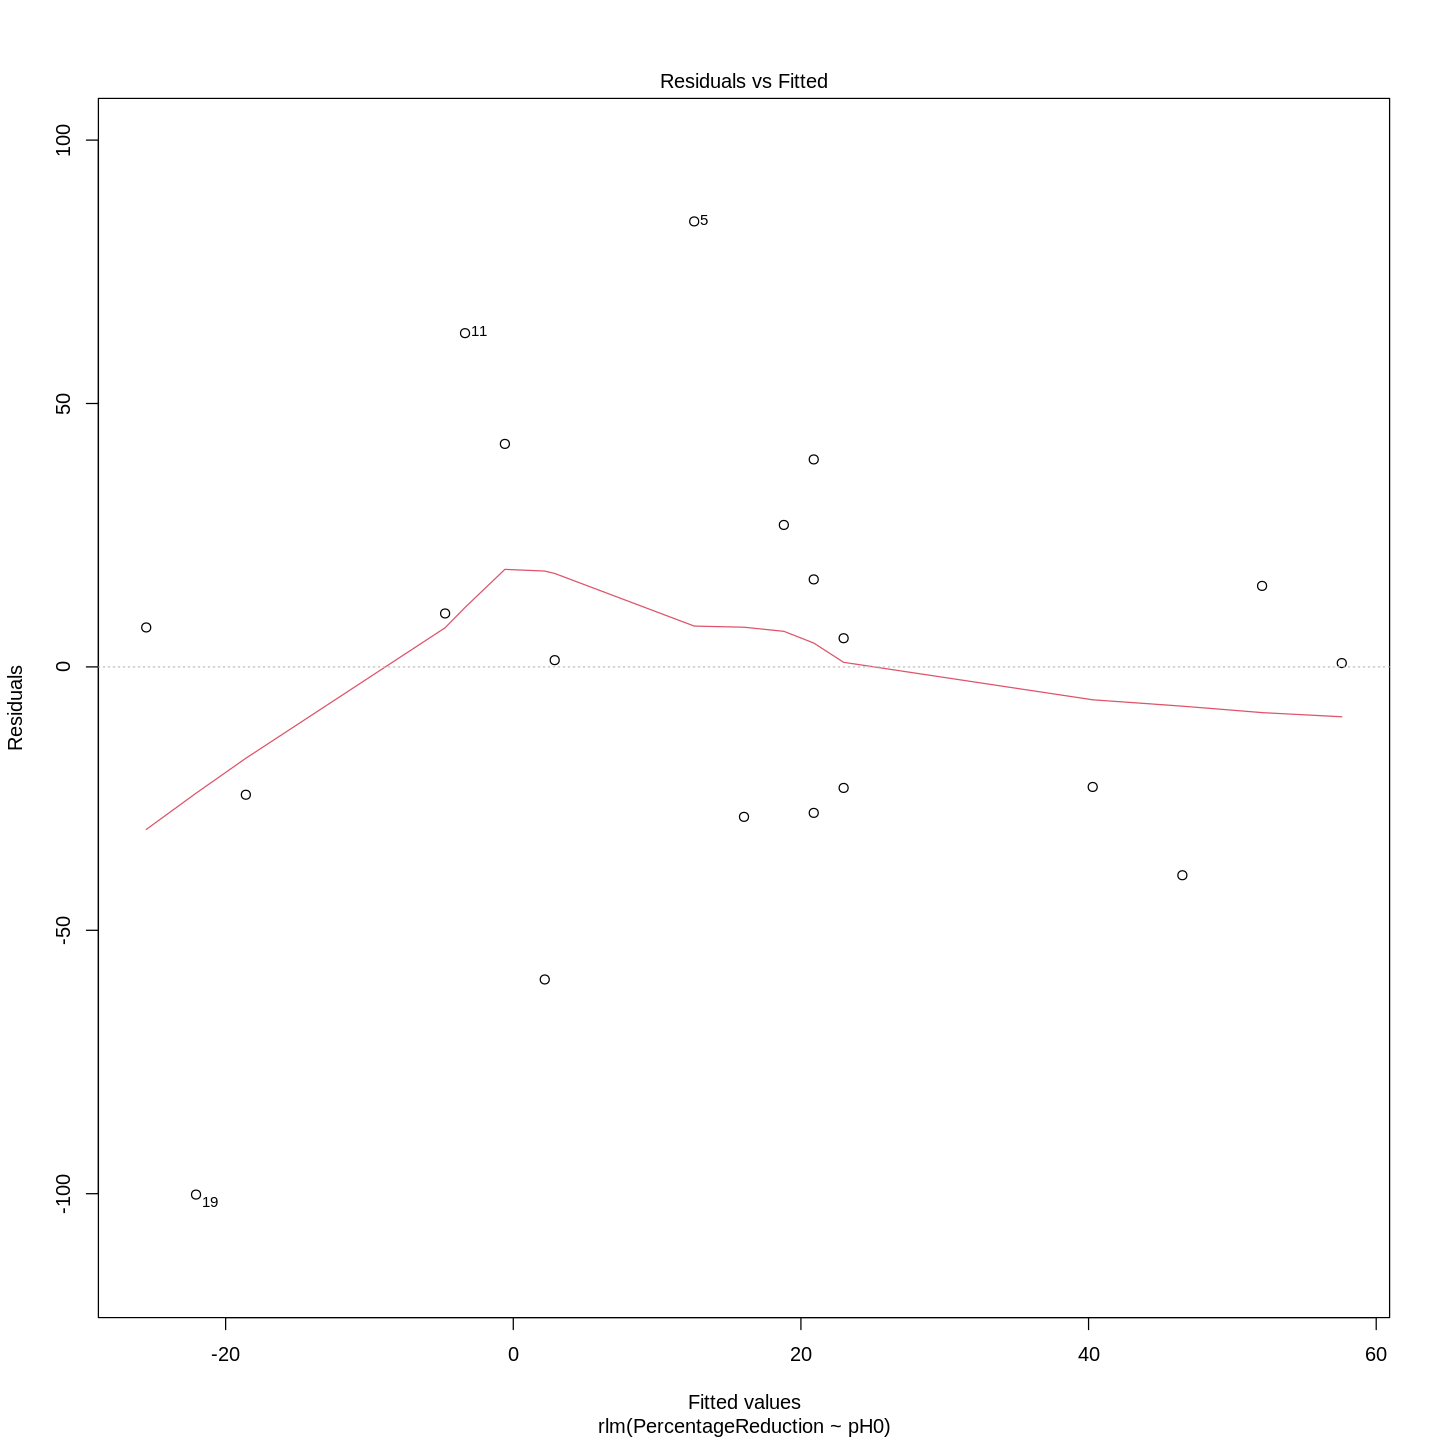

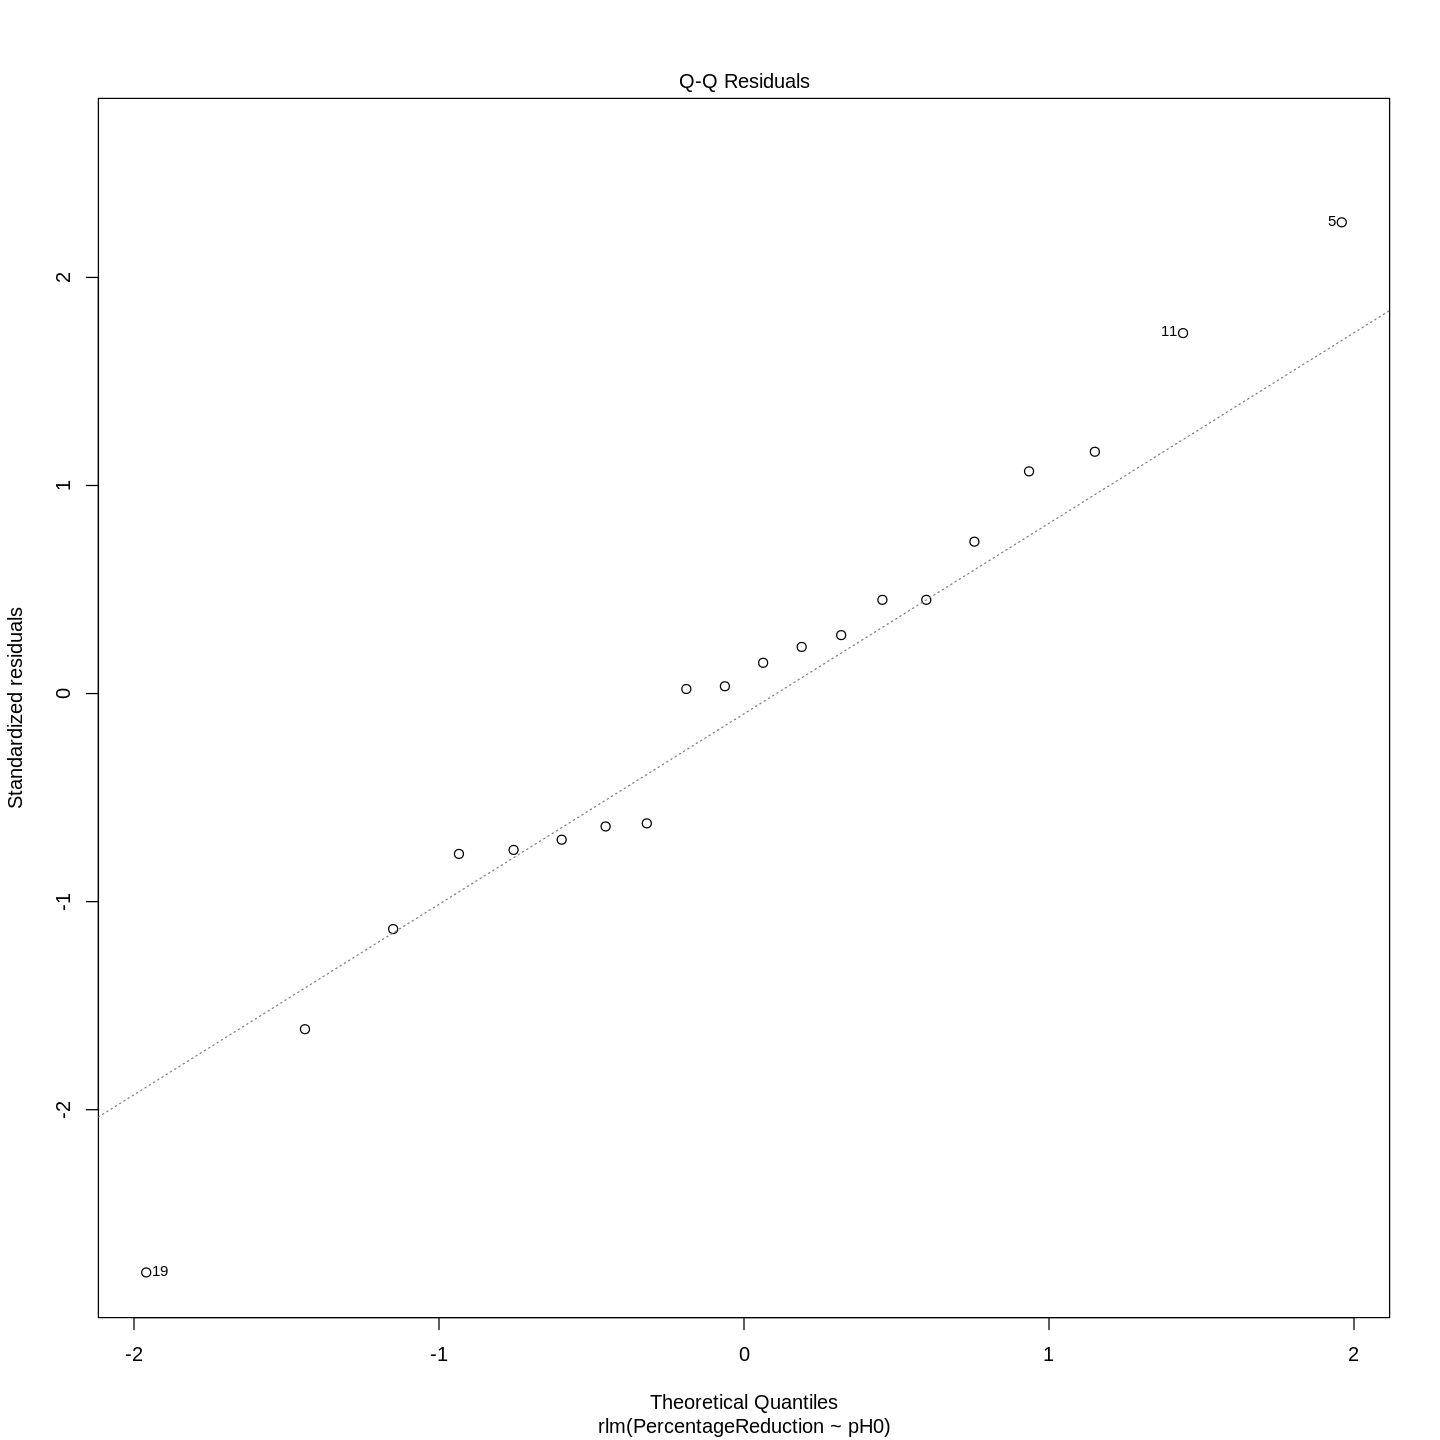

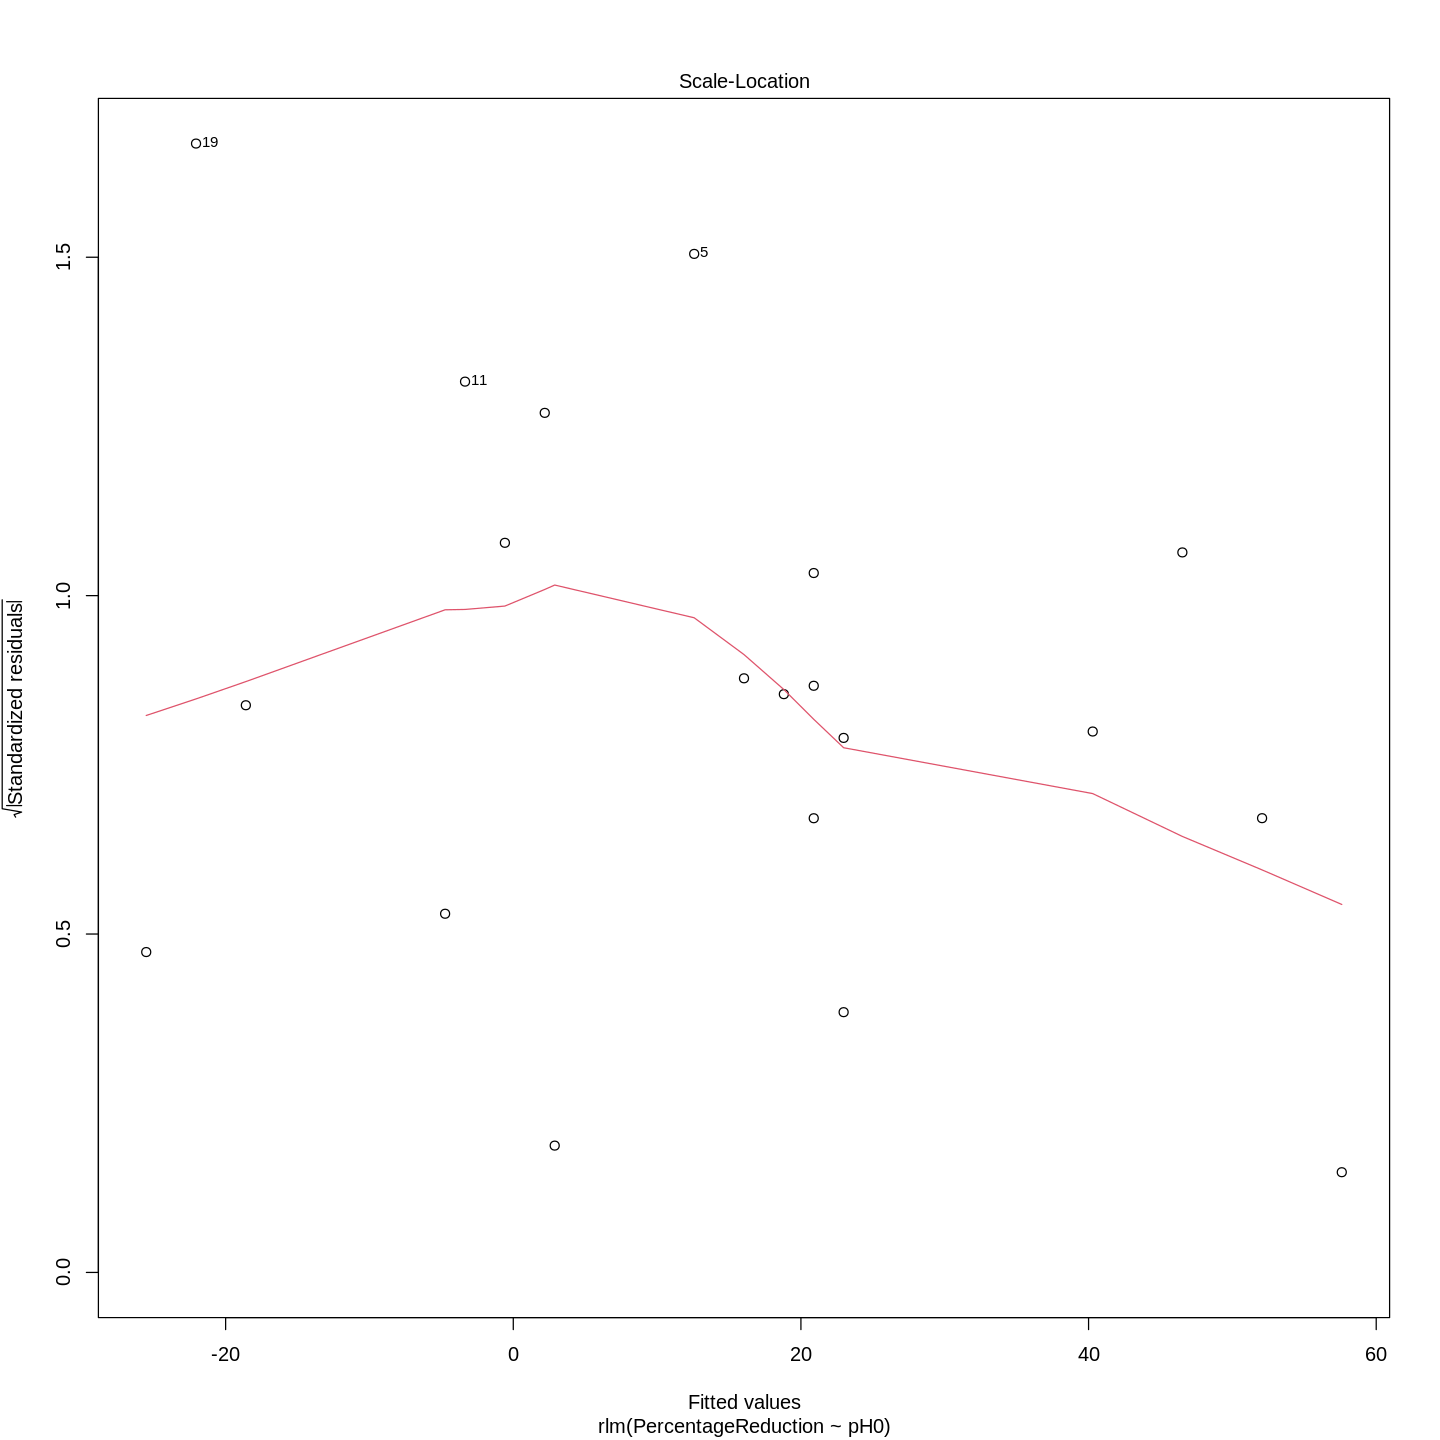

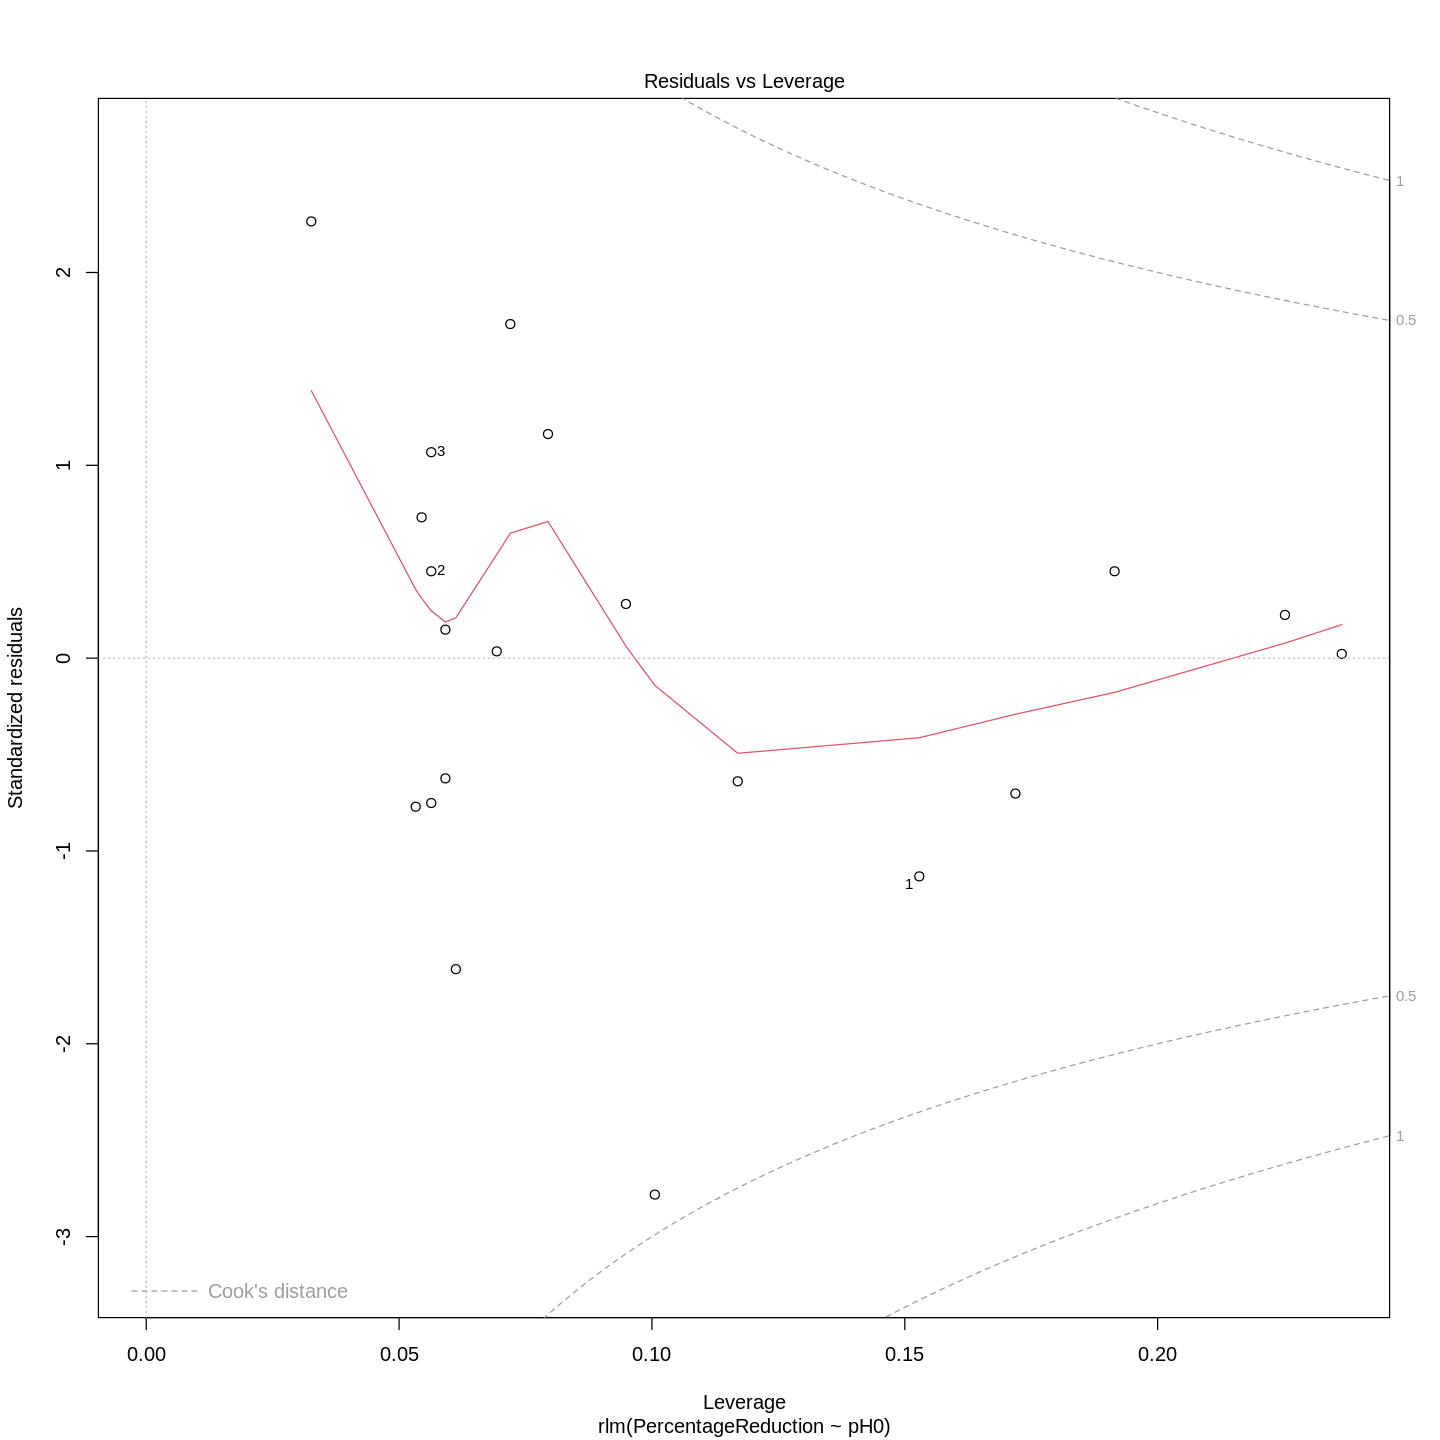

In [ ]:
plot(model_rlm)

In [ ]:
# Tính R-squared và Adjusted R-squared cho mô hình rlm
residuals_rlm <- residuals(model_rlm)
fitted_values_rlm <- fitted(model_rlm)

# Tổng bình phương sai số
SS_residuals <- sum(residuals_rlm^2)
SS_total <- sum((manuka$PercentageReduction - mean(manuka$PercentageReduction))^2)

# R-squared
R_squared <- 1 - (SS_residuals / SS_total)

# Tính Adjusted R-squared
n <- nrow(manuka)
p <- 1  # Chỉ có một biến dự đoán (pH0)
Adjusted_R_squared <- 1 - (1 - R_squared) * (n - 1) / (n - p - 1)

# In kết quả
R_squared
Adjusted_R_squared


[1] 0.2855353

[1] 0.2458428

## **TỔNG KẾT**:

Mặc dù đã thực hiện rất nhiều phép biến đổi, nhưng vẫn chưa thể tìm dc mô hình tốt hơn mô hình ban đầu. Việc tìm ra mối liên hệ giữa độ ph và khả năng khắc phục vết thương có lẽ cần có một bộ dữ liệu lớn hơn, một mẫu lớn hơn để có thể đưa ra được đánh giá chính xác (những vấn đề về y học và cơ chế hoạt động của cơ thể người luôn là những vấn đề phức tạp nhất)


# Bài 3.15 - Nguyễn Tùng Lâm

Đề bài:
3.15. A study of babies [4] hypothesized that babies would take longer to
learn to crawl in colder months because the extra clothing restricts their
movement (data set: crawl). The data and a fuller description are given in
Problem 2.16 (p. 87). In that problem, a linear regression model was fitted
to the data.
1. Perform a diagnostic analysis of the fitted linear regression model.
2. Identify any influential observations or outliers.
3. Suppose some of the babies were twins. Which assumption would be
violated by the inclusion of these babies in the study? Do you think this
would have practical implications?

In [ ]:
# Dataset
install.packages("GLMsData")
install.packages("lmtest")
library("GLMsData")
library(lmtest)
data("crawl")
df<- crawl
df

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




BirthMonth,Age,SD,SampleSize,Temp
<fct>,<dbl>,<dbl>,<int>,<int>
January,29.84,7.08,32,66
February,30.52,6.96,36,73
March,29.70,8.33,23,72
April,31.84,6.21,26,63
May,28.58,8.07,27,52
June,31.44,8.10,29,39
July,33.64,6.91,21,33
August,32.82,7.61,45,30
September,33.83,6.93,38,33


1.Perform a diagnostic analysis of the fitted linear regression model.

In [ ]:
model <- lm(Age~Temp,data = df,weight = SampleSize)
summary(model)


Call:
lm(formula = Age ~ Temp, data = df, weights = SampleSize)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-16.581  -4.325   2.001   4.026   9.146 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.70254    1.26003  28.335 6.97e-11 ***
Temp        -0.07561    0.02454  -3.081   0.0116 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.399 on 10 degrees of freedom
Multiple R-squared:  0.487,	Adjusted R-squared:  0.4357 
F-statistic: 9.494 on 1 and 10 DF,  p-value: 0.01162


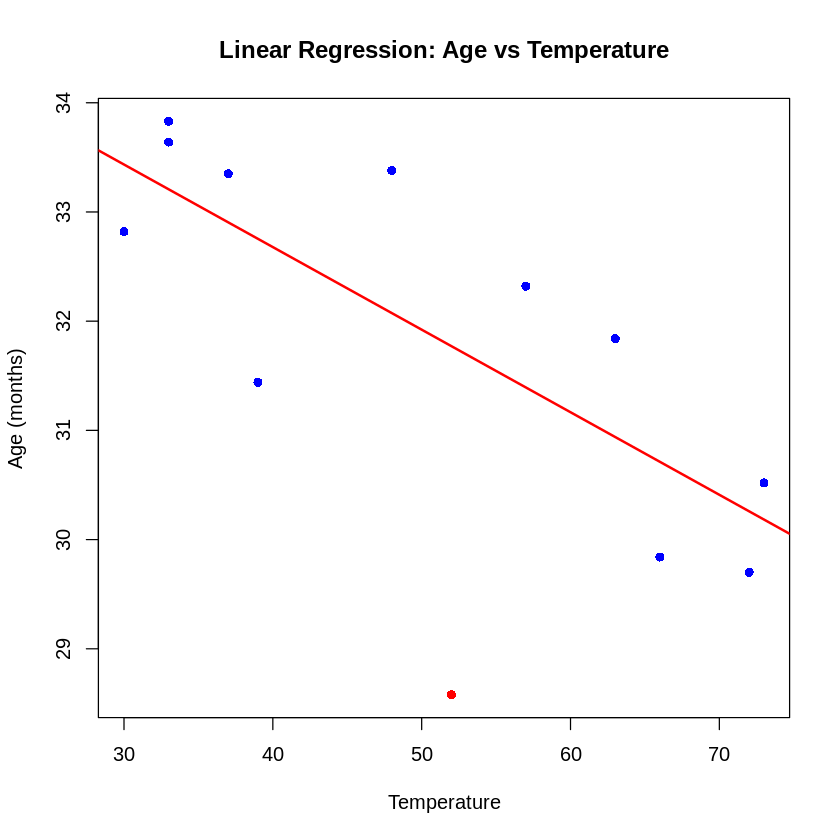

In [ ]:
df$r_standardized <- rstandard(model)
highlight <- abs(df$r_standardized) > 2
plot(df$Temp, df$Age,xlab = "Temperature", ylab = "Age (months)",main = "Linear Regression: Age vs Temperature",pch = 16, col = ifelse(highlight,"red","blue"))
abline(model, col = "red", lwd = 2)
# df


	studentized Breusch-Pagan test

data:  model
BP = 415.22, df = 1, p-value < 2.2e-16


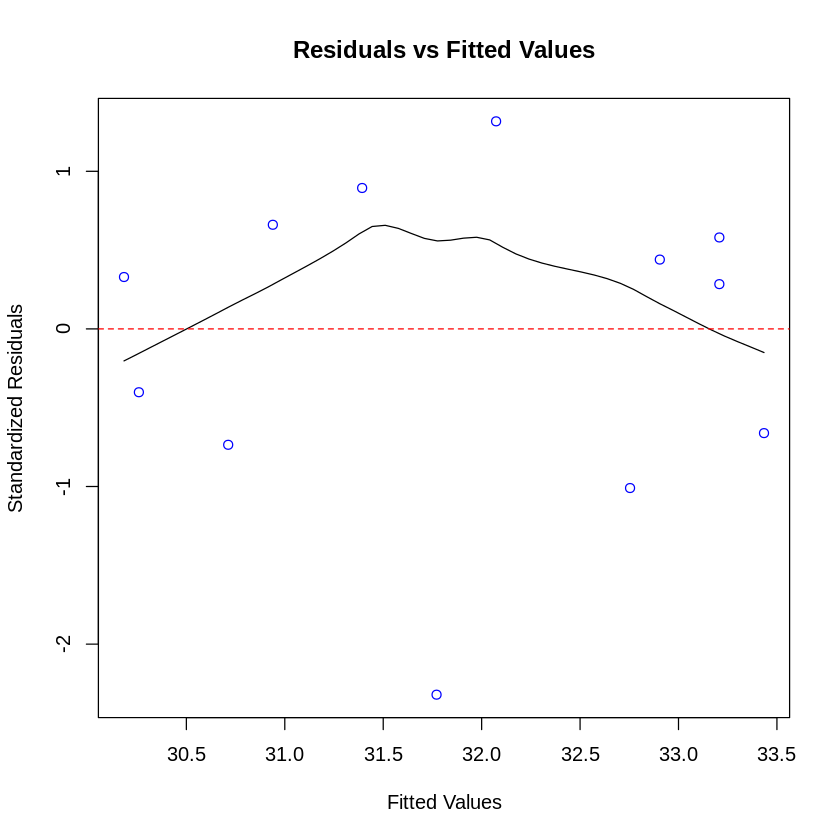

In [ ]:
# Kiểm định phương sai không đổi
scatter.smooth(rstandard(model) ~ fitted(model),
               main = "Residuals vs Fitted Values",
               xlab = "Fitted Values",
               ylab = "Standardized Residuals",col="blue")
abline(h = 0, col = "red", lty = 2)
bptest(model)
#  Nhận xét:
# - Phần dư phân bổ nhiều phía trên, có khả năng vi phạm giả định về Phương sai phần dư không đổi
# - Kết hợp thêm kiểm định BPtest cho p-value < 5% => Vi phạm giả định


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.88029, p-value = 0.08841


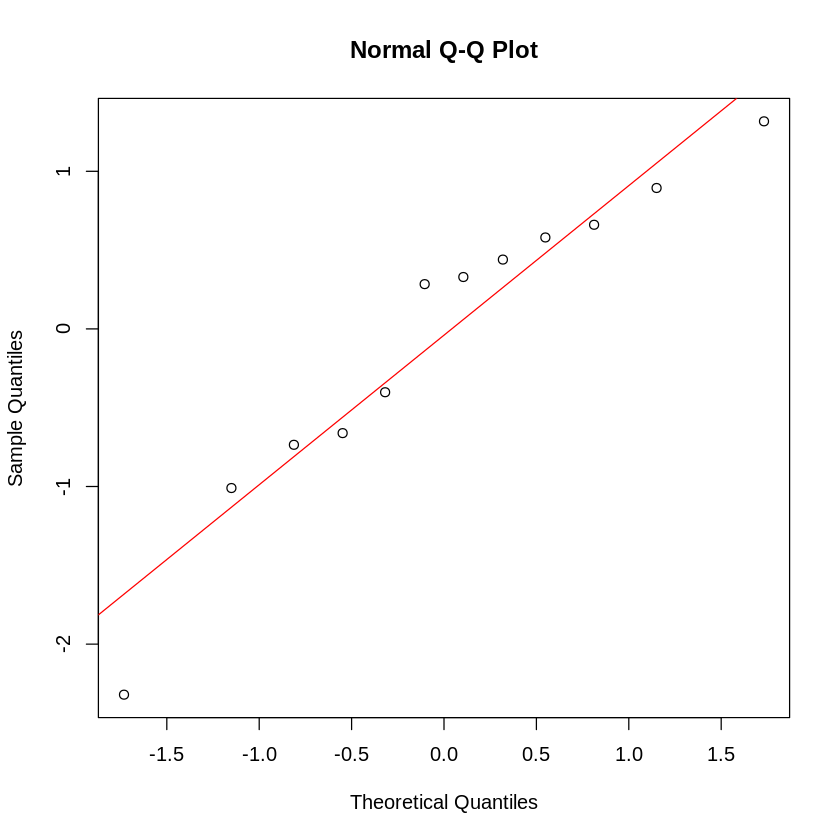

In [ ]:
# Kiểm định phần dư tuân theo phân phối chuẩn hay không?
qqnorm(rstandard(model)); qqline(rstandard(model),col = "red")
shapiro.test(residuals(model))
#Nhận xét: Kết hợp biểu đồ và Saphiro test cho p-value > 5% => Phần dư có phân phối chuẩn

2. Identify any influential observations or outliers.

BirthMonth,Age,SD,SampleSize,Temp,r_standardized
<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>
January,29.84,7.08,32,66,-0.7352459
February,30.52,6.96,36,73,0.3292230
March,29.70,8.33,23,72,-0.4017996
April,31.84,6.21,26,63,0.6607410
May,28.58,8.07,27,52,-2.3206258
June,31.44,8.10,29,39,-1.0096045
July,33.64,6.91,21,33,0.2840962
August,32.82,7.61,45,30,-0.6611690
September,33.83,6.93,38,33,0.5801706


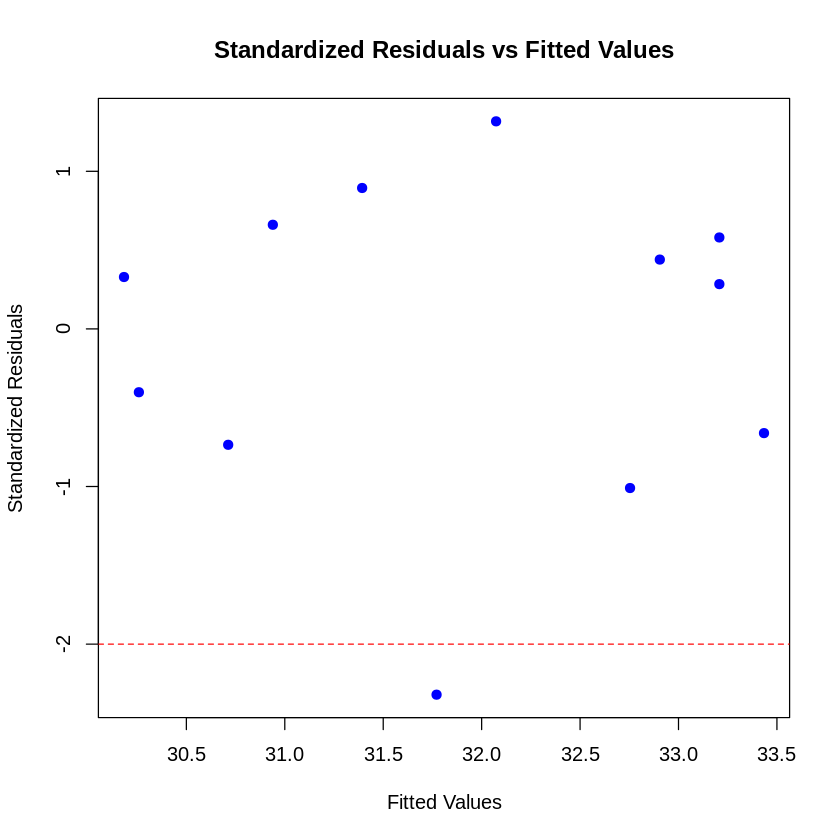

In [ ]:
# Vẽ scatter plot giữa dư studentized và giá trị dự đoán (fitted values)
plot(fitted(model), rstandard(model),
     main = "Standardized Residuals vs Fitted Values",
     xlab = "Fitted Values",
     ylab = "Standardized Residuals",
     pch = 19, col = "blue")

# Thêm đường cắt để chỉ ra các outliers
abline(h = c(-2, 2), col = "red", lty = 2)  # Các điểm ngoài khoảng -3 đến 3 có thể là outliers
df
# Dữ liệu tại tháng 5 là 1 outlier

[1] 0.7434918

[1] 1.224745

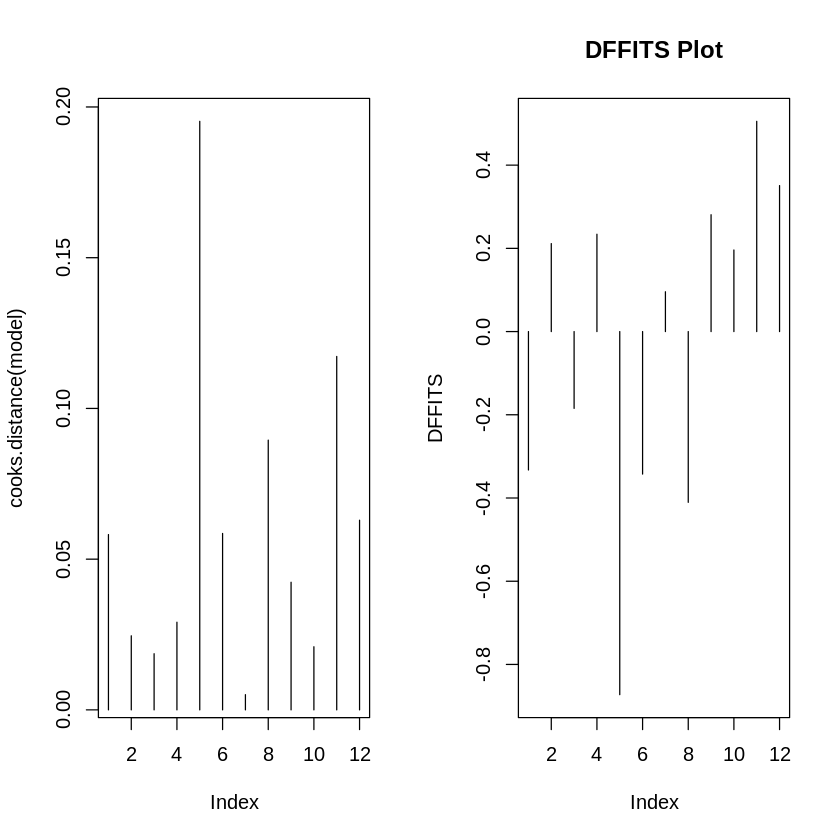

In [ ]:
# Xác định các điểm influential bằng Cook distance
par(mfrow = c(1, 2))
threshold <- qf(0.5, 2, 10)
threshold
plot( cooks.distance(model), type="h")
# Thêm đường ngưỡng
abline(h = threshold, col = "blue", lty = 2)


# Xác định các điểm influential bằng  Dffits
dffits_values <- dffits(model)
threshold <- 3 * sqrt(2 / 12)
threshold
plot(dffits_values,
     type = "h",
     main = "DFFITS Plot",
     xlab = "Index",
     ylab = "DFFITS",
     col = ifelse(abs(dffits_values) > threshold, "red", "black"))
# Thêm đường ngưỡng
abline(h = c(threshold, -threshold), col = "blue", lty = 2)

# plot(cooks.distance(model),rstandard(model))

In [ ]:
# Influence Measures
influence_data <- influence.measures(model)
# influence_data
colSums(influence_data$is.inf)
# influence_data
# cov.r <- 3*2/(12-2)
# cov.r
# Kiểm tra điểm ảnh hưởng

#Kết luận: Không có quan sát nào là điểm có ảnh hưởng lớn theo DFFIT, Cook's distance

dfb.1_ dfb.Temp    dffit    cov.r   cook.d      hat 
       0        0        0        2        0        0

3. Suppose some of the babies were twins. Which assumption would be
violated by the inclusion of these babies in the study? Do you think this
would have practical implications?


Trong trường hợp một số trẻ em trong dữ liệu là sinh đôi, điều này có thể vi phạm giả định về tính độc lập (Independence) của mô hình hồi quy tuyến tính. Các cặp song sinh có thể chia sẻ các yếu tố di truyền, môi trường, hoặc điều kiện chăm sóc giống nhau dẫn đến các quan sát từ các cặp song sinh không hoàn toàn độc lập, mà có sự tương quan với nhau.

# Bài 3.16 - Nguyễn Tiến Linh

## **Đề bài**

**English Version:**

3.16 Children  were  asked  to  build  towers  out  of  cubical  and  cylindrical blocks as high as they could [20,33], and the number of blocks used and the time taken were recorded. The data (data set:blocks) and a fuller descrip- tion are given in Problem2.18(p.88). In that problem, a linear regression model was fitted to model the time to build the towers, based on the initial examination in Problem1.9(p.28).
 1. Perform a diagnostic analysis of the linear regression model fitted in Prob- lem2.18(p.88), and show a transformation of the response is necessary.
 2. Fit an appropriate linear regression model to the data after applying the transformation, ensuring a diagnostic analysis

**Tiếng Việt**

3.16 Trẻ em được yêu cầu xây các tòa tháp từ các khối lập phương và hình trụ cao nhất có thể [20,33], và số lượng khối được sử dụng và thời gian thực hiện đã được ghi lại. Dữ liệu (bộ dữ liệu: khối) và mô tả đầy đủ hơn được đưa ra trong Bài toán 2.18 (trang 88). Trong bài toán đó, một mô hình hồi quy tuyến tính đã được lắp để mô hình hóa thời gian xây các tòa tháp, dựa trên cuộc kiểm tra ban đầu trong Bài toán 1.9 (trang 28).

1. Thực hiện phân tích chẩn đoán mô hình hồi quy tuyến tính được lắp trong Bài toán 2.18 (trang 88) và chỉ ra rằng cần phải chuyển đổi phản hồi.
2. Lắp một mô hình hồi quy tuyến tính phù hợp với dữ liệu sau khi áp dụng phép chuyển đổi, đảm bảo phân tích chẩn đoán

## **Đáp án**

** Phân tích chẩn đoán mô hình ban đầu**

 Mô hình ban đầu: Mô hình hồi quy tuyến tính:

Time∼Shape

**Mục số 1**

In [ ]:
install.packages('GLMsData')
library('GLMsData')

data(blocks)
par(mfrow=c(2, 4))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
m1 <- lm( Time~Shape, data=blocks)
anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Shape,1,5218.618,5218.6176,8.539566,0.004314623
Residuals,98,59888.816,611.1104,NA,NA


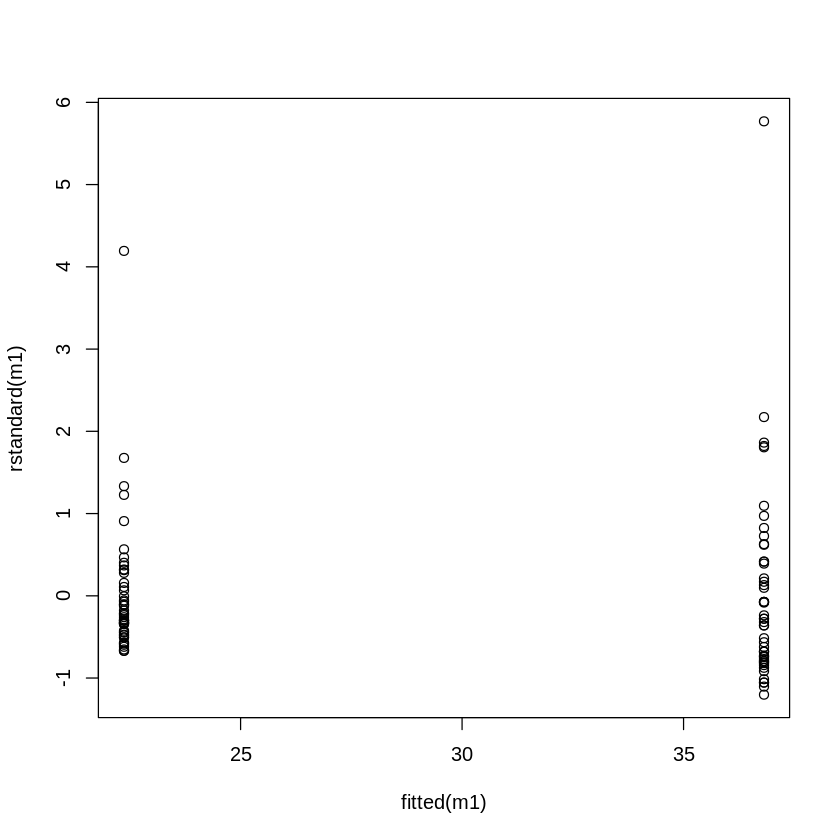

In [ ]:

#các giá trị dự đoán tập trung chủ yếu quanh 25 và 35
#Có một số điểm phần dư vượt ra khỏi khoảng từ -2 đến 2, đặc biệt một điểm nằm trên 5.
plot( rstandard(m1) ~ fitted(m1) )

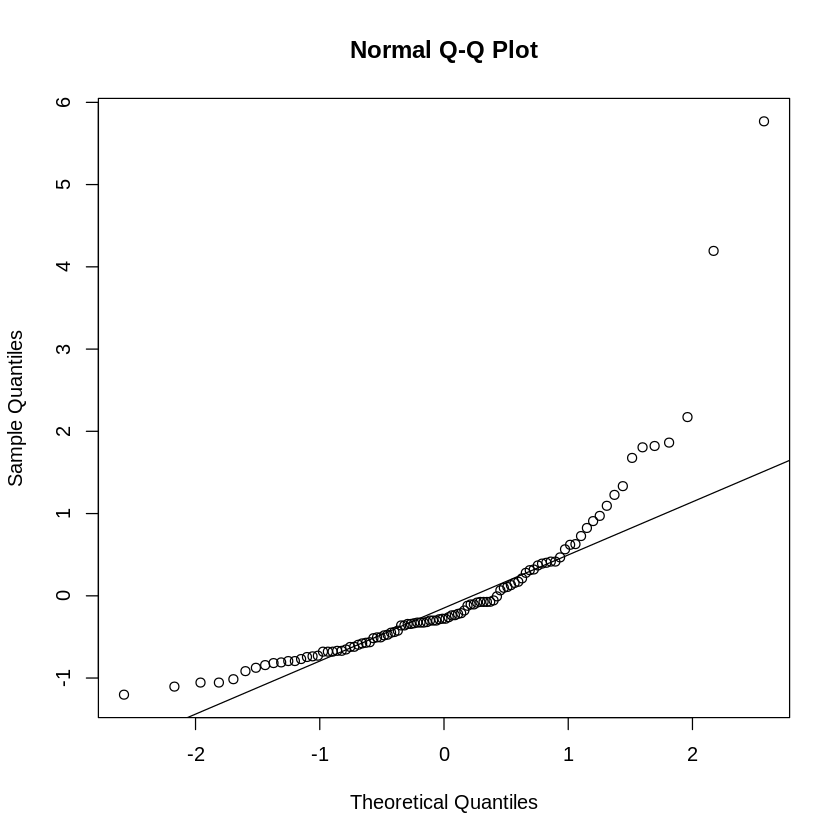

In [ ]:
qqnorm( rstandard(m1) )
qqline( rstandard(m1) )

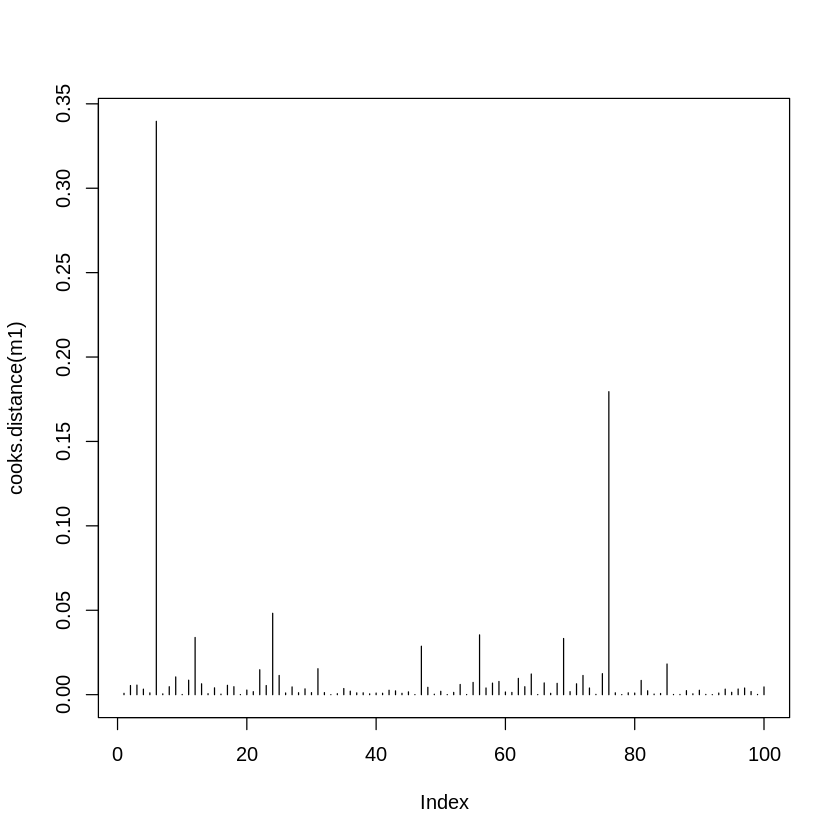

In [ ]:
plot( cooks.distance(m1), type="h")

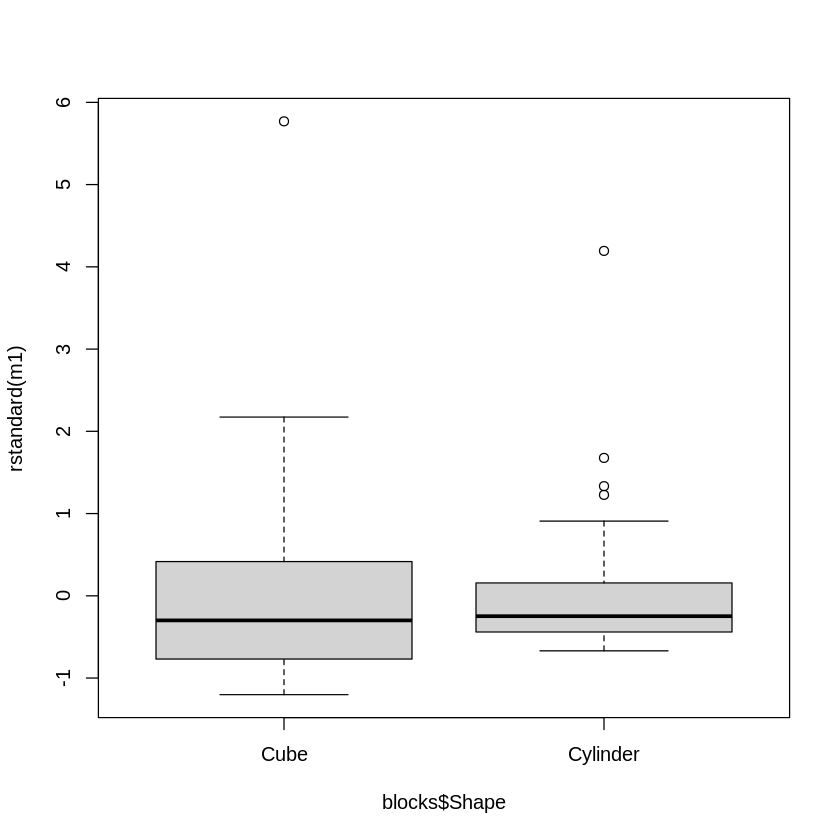

In [ ]:
plot( rstandard(m1) ~ blocks$Shape)

In [ ]:
rowSums(influence.measures(m1)$is.inf)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

**Kết luận:**

1. Phân tích cho thấy:
*   Phân phối phần dư không chuẩn.
*   Độ phương sai giữa khối vuông và khối trụ khác nhau.
2. Điều này chỉ ra cần thiết phải biến đổi biến phản hồi (Time) để cải thiện tính phù hợp của mô hình.

**Mục số 2**

**Biến đổi Logarit**: Áp dụng phép biến đổi logarit lên biến phản hồi Time:

log
⁡
(
Time
)
∼
Shape
×
Age
log(Time)∼Shape×Age

**Xây dựng mô hình**

In [ ]:
 m2  <-  lm(  log(Time)~Shape*Age,  data=blocks);  anova(m2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Shape,1,6.282826e+00,6.282826e+00,1.484219e+01,0.0002110496
Age,1,8.063286e-05,8.063286e-05,1.904824e-04,0.9890169583
Shape:Age,1,3.068779e-01,3.068779e-01,7.249506e-01,0.3966437061
Residuals,96,4.063763e+01,4.233086e-01,NA,NA


In [ ]:
m2  <-  update(m2,  .~Shape+Age);anova(m2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Shape,1,6.282826e+00,6.282826e+00,1.488439e+01,0.0002058511
Age,1,8.063286e-05,8.063286e-05,1.910241e-04,0.9890010592
Residuals,97,4.094451e+01,4.221083e-01,NA,NA


In [ ]:
m2  <-  update(m2,  .~Shape);anova(m2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Shape,1,6.282826,6.2828263,15.03781,0.000190795
Residuals,98,40.944588,0.4178019,NA,NA


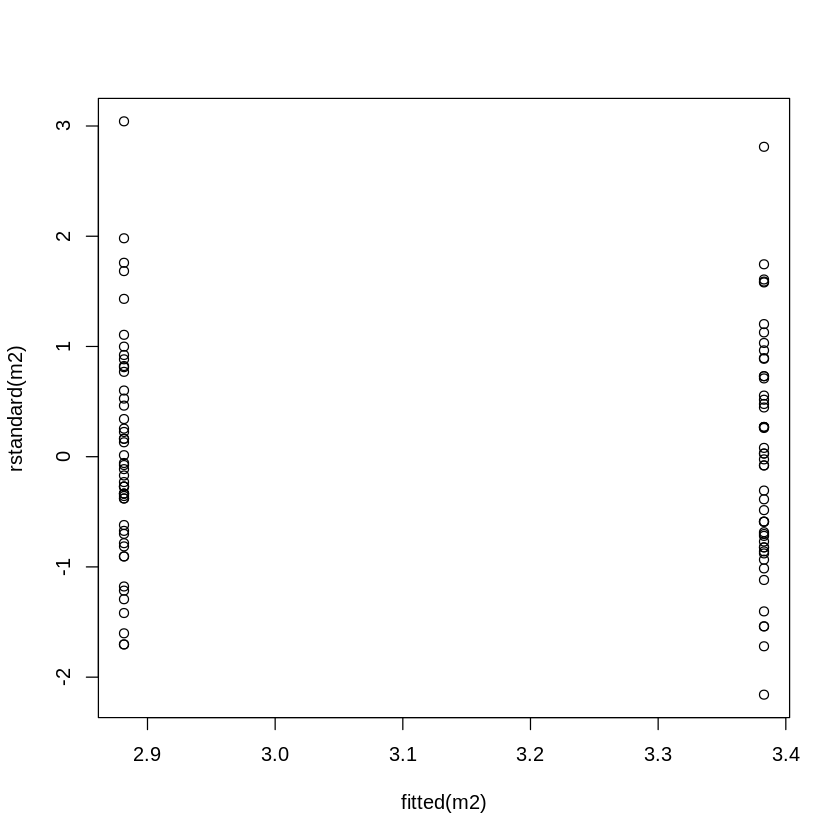

In [ ]:
 plot(  rstandard(m2)  ~  fitted(m2)  )

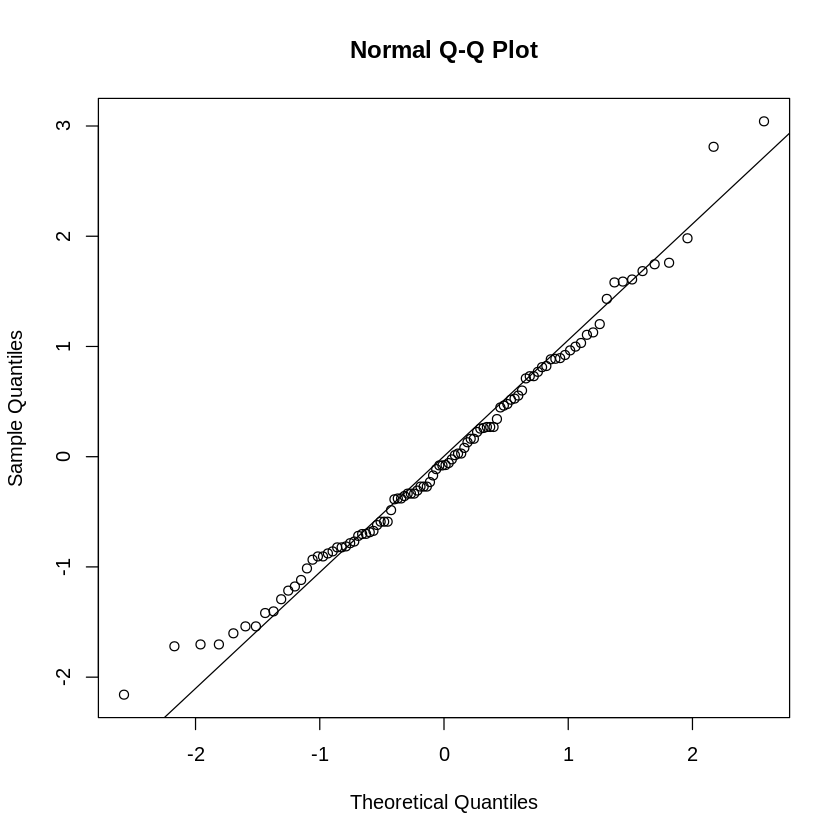

In [ ]:
qqnorm(  rstandard(m2)  );  qqline(  rstandard(m2)  )

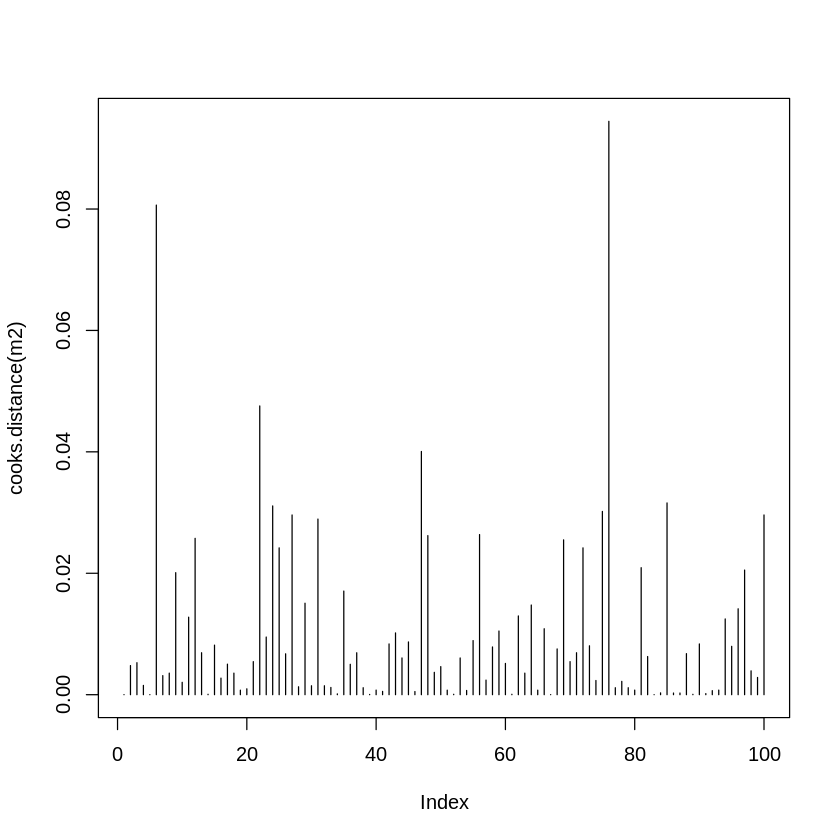

In [ ]:
 plot(  cooks.distance(m2),  type="h")

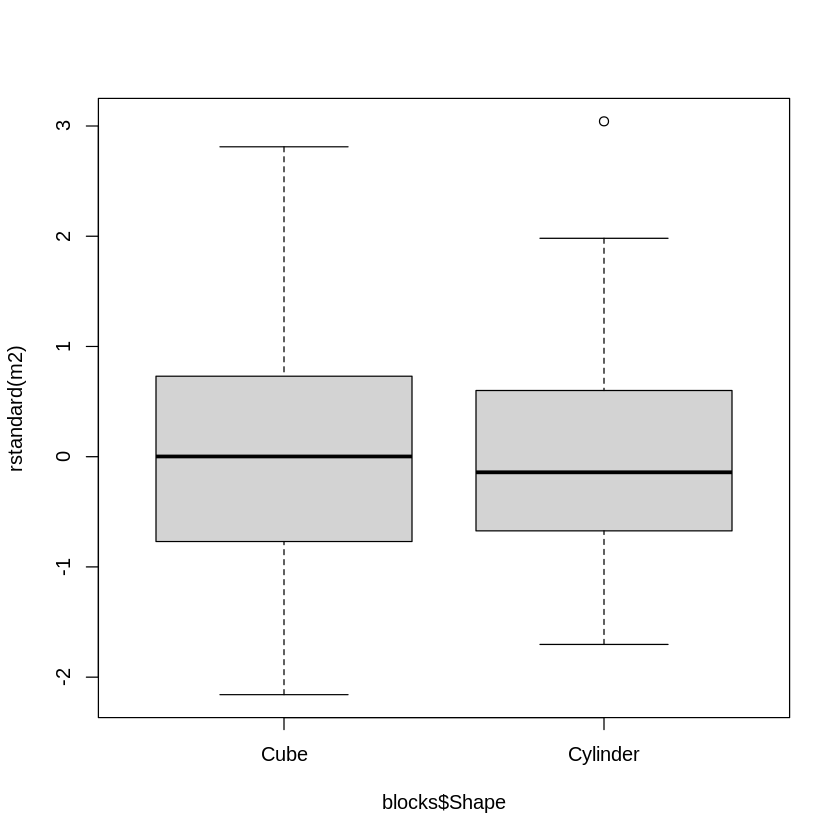

In [ ]:
  plot(  rstandard(m2)  ~  blocks$Shape)

In [ ]:
  rowSums(influence.measures(m2)$is.inf)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

**Kết luận chính:**

1. Phần dư của mô hình mới có phân phối gần chuẩn hơn (được xác nhận qua Q-Q plot).
2. Phương sai của phần dư trở nên ổn định hơn, không còn sự khác biệt rõ ràng giữa khối vuông và khối trụ như trong mô hình ban đầu.
3. Mô hình mới phù hợp hơn với dữ liệu, và các biểu đồ chẩn đoán (Q-Q plot, residual plot, Cook's distance) cho thấy các cải thiện đáng kể.

**Kết quả tổng quát:**

1. Việc biến đổi logarit giúp khắc phục các vấn đề không chuẩn của phần dư và phương sai không đồng nhất trong mô hình ban đầu.
2. Mô hình mới cho phép phân tích chính xác hơn về mối quan hệ giữa thời gian xây tháp, loại khối và tuổi.

1. Mô hình chỉ bao gồm Hình dạng. Biểu đồ Q–Q cho thấy không chuẩn; phương sai khác nhau giữa các khối lập phương và hình trụ. Có lẽ là các quan sát có ảnh hưởng.
2. Chẩn đoán mô hình có vẻ tốt hơn, nếu không muốn nói là hoàn hảo, sau khi áp dụng phép biến đổi logarit

# **Bài 3.17 - Trần Mỹ Linh**

## **Đề bài:**

**English version:**


In Problem 2.17, the daily energy requirements and weight of 64 wethers (Table 2.11; data set: sheep) were analysed [18, 38, 42].
 1. Using the model fitted in Problem 2.17, perform a diagnostic analysis.
 2. Fit another linear regression model using the logarithm of energy requirements as the response variable. Perform a diagnostic analysis of this
 second model, and show this is a superior model.
 3. Interpret the model that was fitted using the logarithm of energy requirements.

**Tiếng việt:**

Bài tập 2.17 đã phân tích nhu cầu năng lượng hàng ngày và trọng lượng của 64 con cừu thiến.

  1. Thực hiện các phân tích chuẩn đoán cho mô hình được xây dựng trong bài 2.17
  2. Xây dựng một mô hình hồi quy tuyến tính khác bằng cách lấy logarit của nhu cầu năng lượng làm biến phụ thuộc. Thực hiện các phân tích chuẩn đoán cho mô hình này, giải thích vì sao mô hình này vượt trội hơn.
  3. Mô hình được xây dựng bằng cách sử dụng logarit của nhu cầu năng lượng, diễn giải mô hình trên.



## **Đáp án:**

**Câu 1:**

**Table 2.11** *Nhu cầu năng lượng (Mcal/ngày) và cân nặng (kg) của một mẫu gồm 64 con cừu thiến Merino*

| Weight | Energy | Weight | Energy | Weight | Energy | Weight | Energy | Weight | Energy | Weight | Energy |
|-------------|--------------------|-------------|--------------------|-------------|--------------------|-------------|--------------------|-------------|--------------------|-------------|--------------------|
| 22.1        | 1.31               | 25.1        | 1.00               | 25.7        | 1.20               | 25.9        | 1.36               | 26.2        | 1.27               | 27.0        | 1.41               |
| 27.0        | 1.46               | 30.0        | 1.23               | 30.2        | 1.01               | 30.6        | 1.12               | 33.2        | 1.25               | 33.2        | 1.32               |
| 33.2        | 1.47               | 33.9        | 1.03               | 33.8        | 1.46               | 34.3        | 1.14               | 34.9        | 1.00               | 42.6        | 1.81               |
| 43.7        | 1.73               | 44.9        | 1.93               | 49.0        | 1.78               | 49.2        | 2.53               | 51.8        | 1.87               | 51.8        | 1.92               |
| 52.5        | 1.65               | 52.6        | 1.70               | 53.3        | 2.22               | 51.8        | 1.46               | 53.3        | 1.26               | 27.6        | 1.39               |
| 28.4        | 1.27               | 28.9        | 1.74               | 29.3        | 1.54               | 29.7        | 1.44               | 31.0        | 1.47               | 31.9        | 1.50               |
| 32.0        | 1.34               | 32.6        | 1.75               | 33.1        | 1.46               | 34.2        | 1.59               | 44.4        | 3.33               | 44.6        | 2.25               |
| 52.1        | 2.67               | 52.4        | 2.28               | 52.7        | 3.15               | 53.1        | 2.73               | 52.6        | 3.73               | 46.7        | 2.21               |
| 31.8        | 1.39               | 36.1        | 1.79               | 28.6        | 2.13               | 29.2        | 1.80               | 26.2        | 1.05               | 45.9        | 2.36               |
| 36.8        | 2.31               | 34.4        | 1.85               | 34.4        | 1.63               | 26.4        | 1.27               | 27.5        | 0.94               |

\
Mô hình được xây dựng trong bài 2.17 là mô hình hồi quy tuyến tính biểu diễn nhu cầu năng lượng hàng ngày theo cân nặng:

In [ ]:
install.packages("GLMsData")
library(GLMsData)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(sheep)
head(sheep)
summary(sheep)

,Weight,Energy
,<dbl>,<dbl>
1,22.1,1.31
2,26.2,1.27
3,33.2,1.25
4,34.3,1.14
5,49.0,1.78
6,52.6,1.70


     Weight          Energy     
 Min.   :22.10   Min.   :0.940  
 1st Qu.:28.82   1st Qu.:1.300  
 Median :33.20   Median :1.595  
 Mean   :35.94   Mean   :1.693  
 3rd Qu.:44.45   3rd Qu.:1.883  
 Max.   :53.30   Max.   :3.730  

In [ ]:
m <- lm(Energy ~ Weight, data=sheep)
summary(m)


Call:
lm(formula = Energy ~ Weight, data = sheep)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76227 -0.22099  0.00156  0.21907  1.31339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.132941   0.180436   0.737    0.464    
Weight      0.043416   0.004857   8.939 9.45e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3662 on 62 degrees of freedom
Multiple R-squared:  0.5631,	Adjusted R-squared:  0.5561 
F-statistic: 79.91 on 1 and 62 DF,  p-value: 9.447e-13


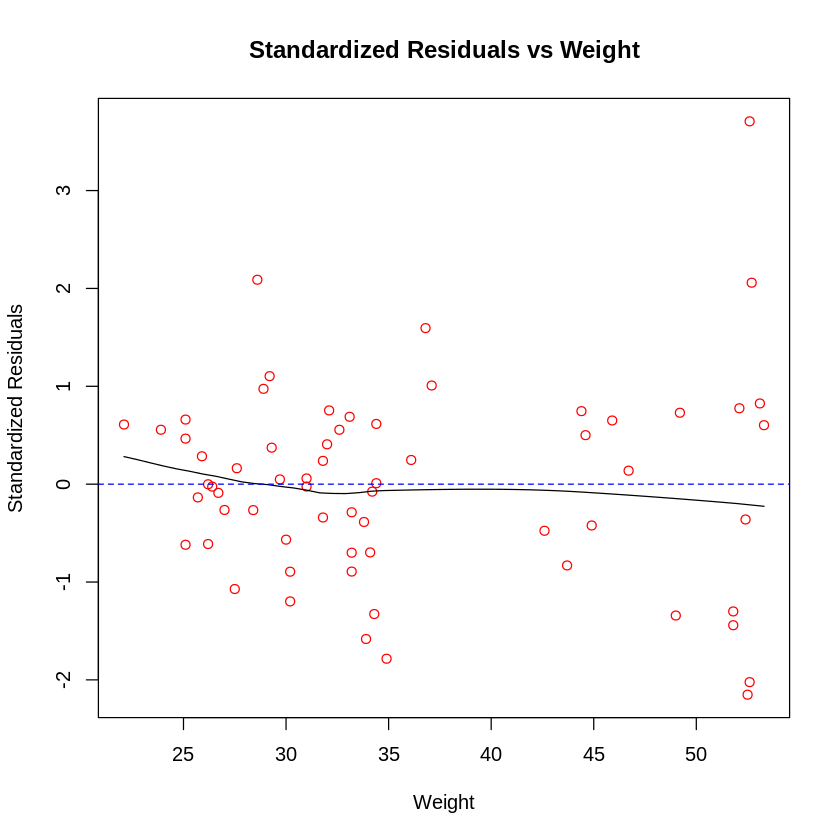

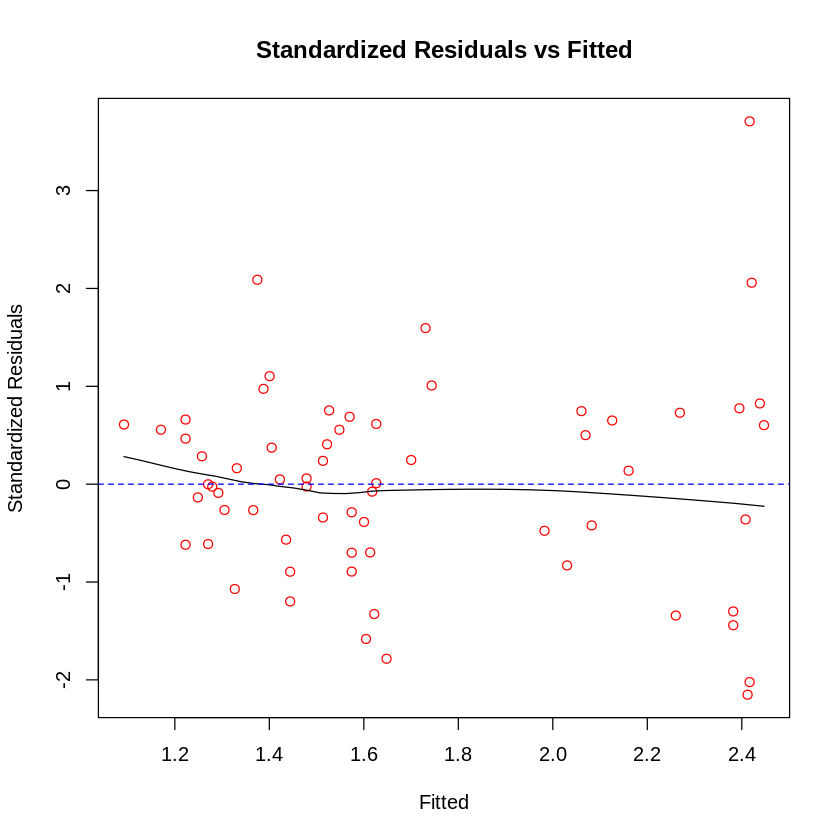

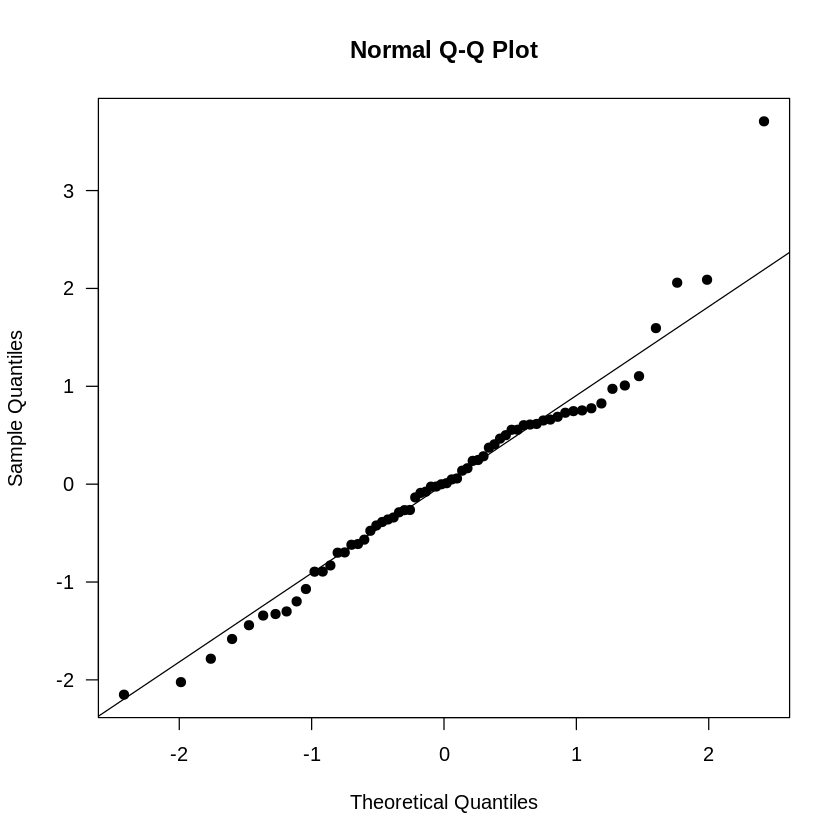

In [ ]:
# Biểu diễn phần dư chuẩn hóa theo cân nặng: Đánh giá sự tuyến tính
scatter.smooth(rstandard(m) ~ sheep$Weight,
               main = "Standardized Residuals vs Weight",
               xlab = "Weight",
               ylab = "Standardized Residuals",
               col = "red")
abline(h = 0, col = "blue", lty = 2)

#Biểu diễn phần dư chuẩn hóa theo giá trị ước lượng: Đánh giá Phương sai không đổi
scatter.smooth(rstandard(m) ~ fitted(m),
               main = "Standardized Residuals vs Fitted",
               xlab = "Fitted",
               ylab = "Standardized Residuals",
               col = "red")
abline(h = 0, col = "blue", lty = 2)

#Q-Q plot: Đánh giá phân phối chuẩn của phần dư
qqnorm(rstandard(m), las=1, pch=19)
qqline(rstandard(m))

dfb.1_ dfb.Wght    dffit    cov.r   cook.d      hat 
       0        0        4        2        0        0

,Weight,Energy
,<dbl>,<dbl>
6,52.6,1.70
11,52.6,3.73
36,52.4,2.28
49,52.7,3.15
57,52.5,1.65


,dfb.1_,dfb.Wght,dffit,cov.r,cook.d,hat
6,0.391,-0.474,-0.545,0.963,0.141,0.064
11,-0.785,0.952,1.094,0.669,0.474,0.064
36,0.066,-0.081,-0.093,1.098,0.004,0.063
49,-0.401,0.486,0.558,0.959,0.147,0.065
57,0.414,-0.504,-0.579,0.945,0.158,0.064


,dfb.1_,dfb.Wght,dffit,cov.r,cook.d,hat
6,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
11,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE
36,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
49,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
57,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE


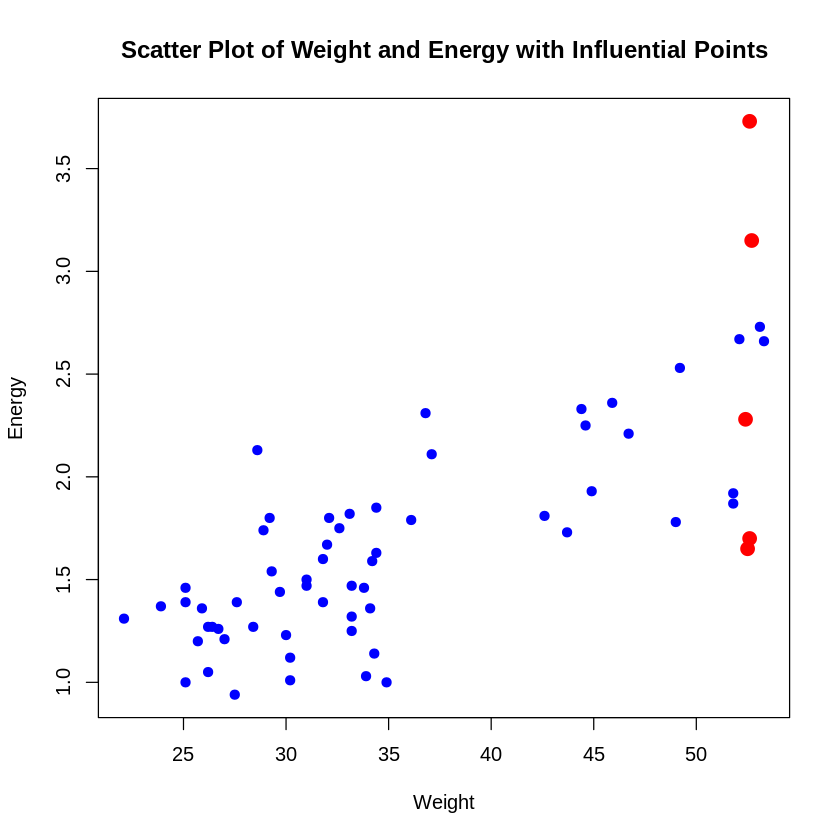

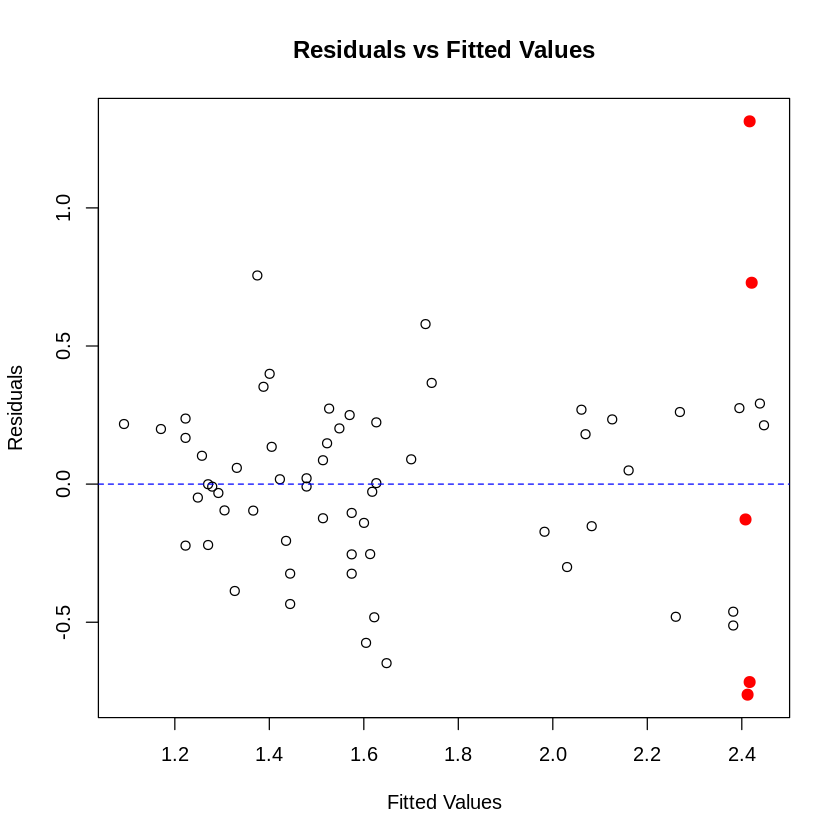

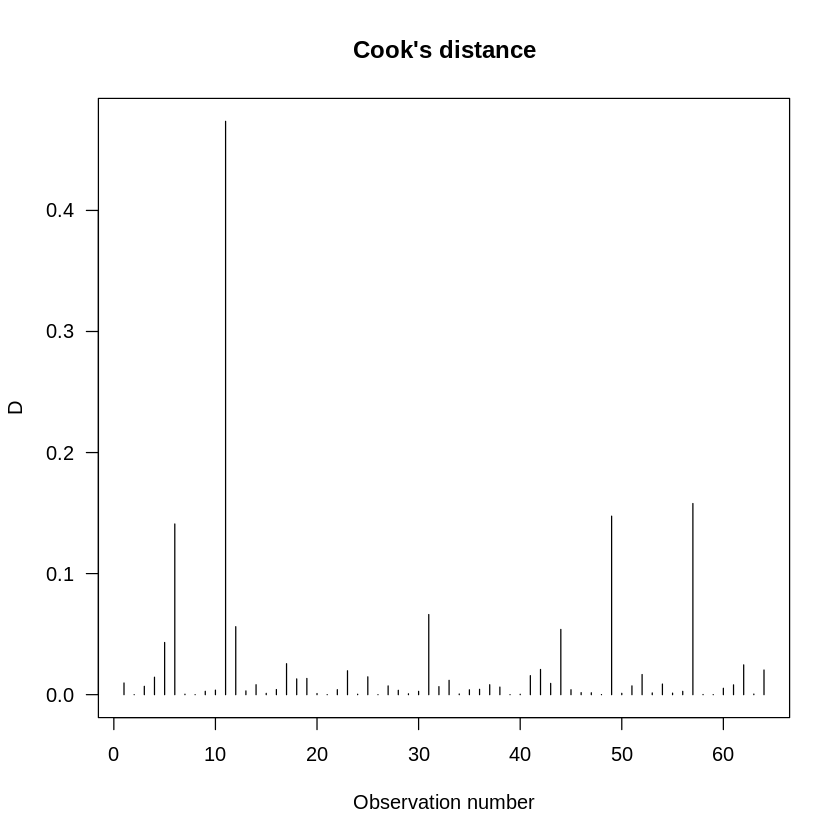

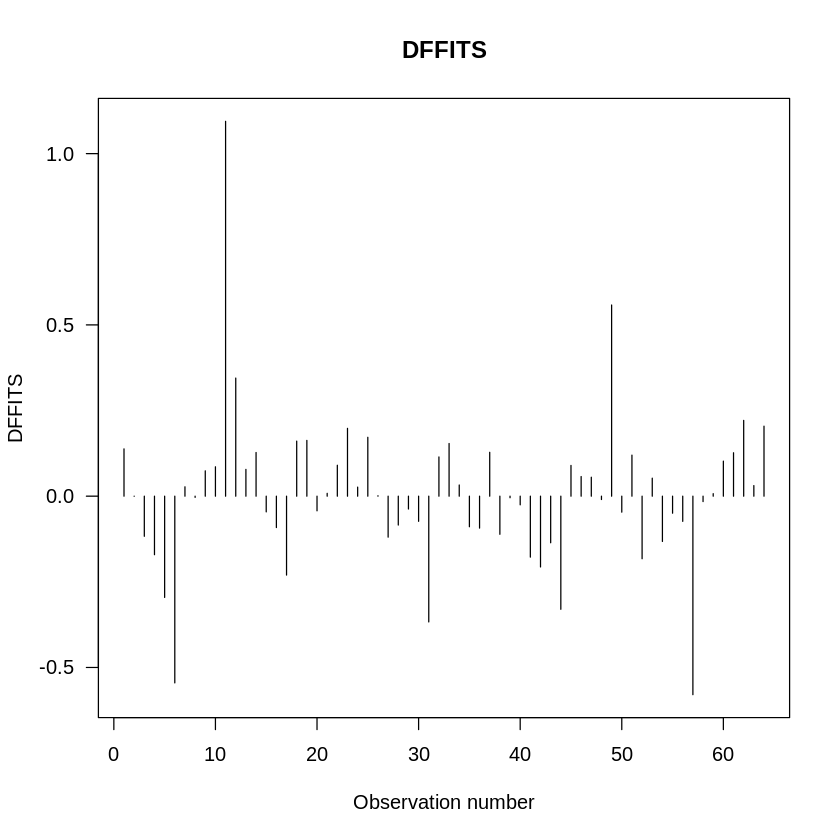

In [ ]:
# Đánh giá các quan sát có ảnh hưởng
m.im <- influence.measures(m)

colSums( m.im$is.inf )
# Lấy chỉ số hàng có ít nhất 1 giá trị TRUE
influential_obs <- which(apply(m.im$is.inf, 1, any))

# Xem chi tiết các quan sát này trong tập dữ liệu gốc
sheep[influential_obs, ]

round(m.im$infmat[influential_obs, ], 3)

m.im$is.inf[influential_obs, ]

#Biểu diễn các quan sát có ảnh hưởng
plot(sheep$Weight, sheep$Energy,
     xlab = "Weight",
     ylab = "Energy",
     main = "Scatter Plot of Weight and Energy with Influential Points",
     col = "blue",
     pch = 19)

points(sheep$Weight[influential_obs], sheep$Energy[influential_obs],
       col = "red",
       pch = 19,
       cex = 1.5)
#Biểu diễn độ lệch và giá trị ước lượng của quan sát có ảnh hưởng
plot(fitted(m), resid(m),
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values")

points(fitted(m)[influential_obs], resid(m)[influential_obs],
       col = "red",
       pch = 19,
       cex = 1.2)

abline(h = 0, col = "blue", lty = 2)

#Biểu đồ Cook's Distance và DFFITS
plot( cooks.distance( m ), type="h", main="Cook's distance",
ylab="D", xlab="Observation number", las=1 )

plot( dffits(m ), type="h", main="DFFITS",
ylab="DFFITS", xlab="Observation number", las=1 )


In [ ]:
m_log <- lm(log(Energy) ~ Weight, data=sheep)
summary(m_log)


Call:
lm(formula = log(Energy) ~ Weight, data = sheep)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45609 -0.13072  0.02761  0.12537  0.44848 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.366236   0.098997  -3.699 0.000461 ***
Weight       0.023562   0.002665   8.842 1.39e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2009 on 62 degrees of freedom
Multiple R-squared:  0.5577,	Adjusted R-squared:  0.5506 
F-statistic: 78.19 on 1 and 62 DF,  p-value: 1.386e-12


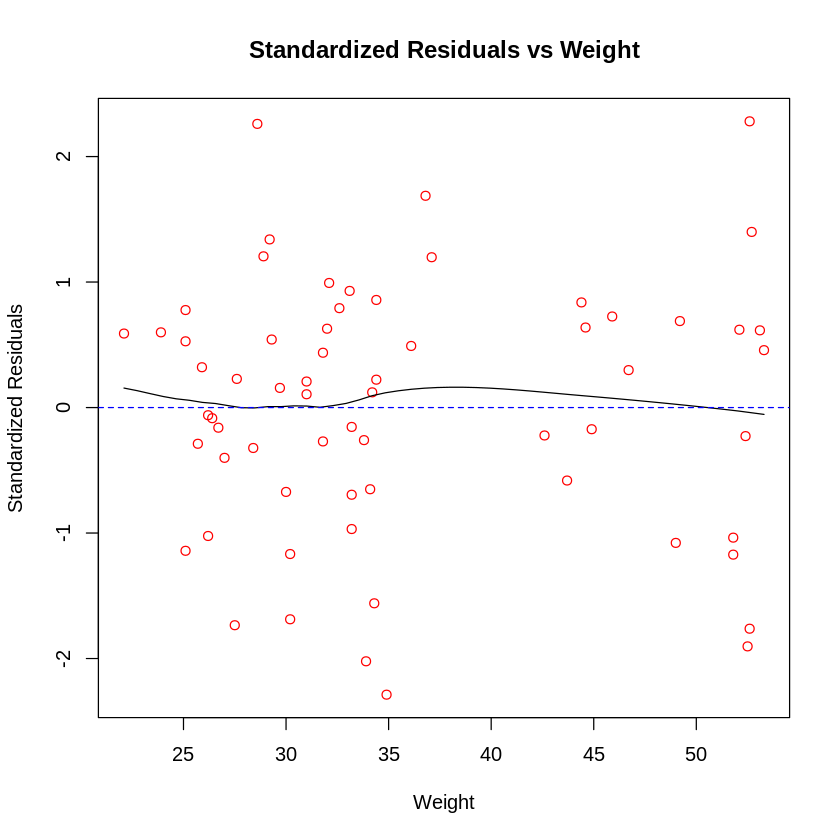

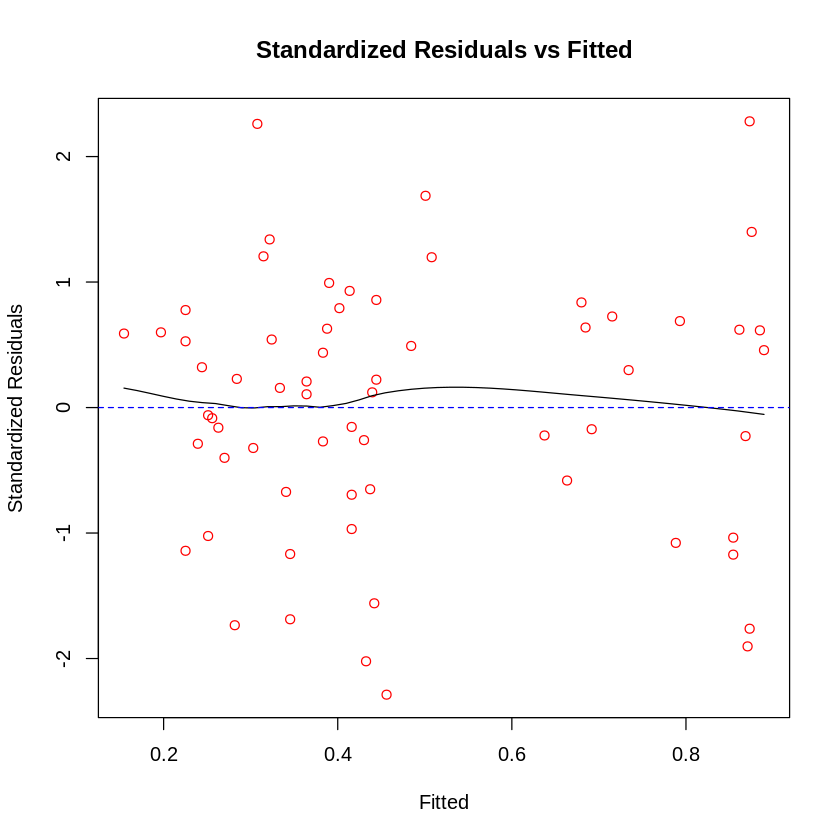

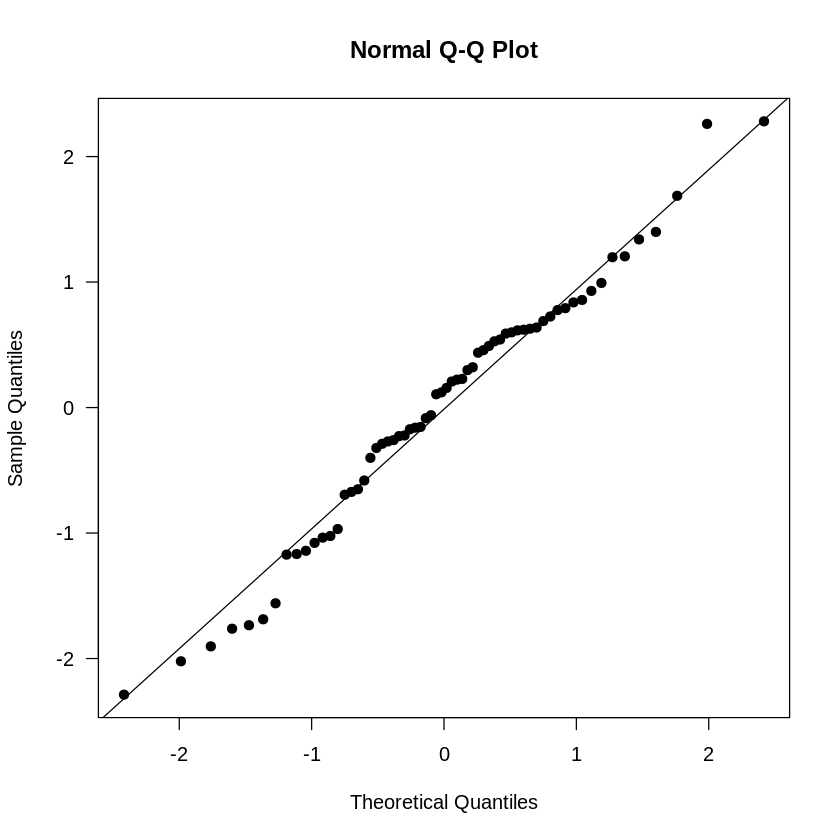

In [ ]:
# Biểu diễn phần dư chuẩn hóa theo cân nặng: Đánh giá sự tuyến tính
scatter.smooth(rstandard(m_log) ~ sheep$Weight,
               main = "Standardized Residuals vs Weight",
               xlab = "Weight",
               ylab = "Standardized Residuals",
               col = "red")
abline(h = 0, col = "blue", lty = 2)

#Biểu diễn phần dư chuẩn hóa theo giá trị ước lượng: Đánh giá Phương sai không đổi
scatter.smooth(rstandard(m_log) ~ fitted(m_log),
               main = "Standardized Residuals vs Fitted",
               xlab = "Fitted",
               ylab = "Standardized Residuals",
               col = "red")
abline(h = 0, col = "blue", lty = 2)

#Q-Q plot: Đánh giá phân phối chuẩn của phần dư
qqnorm(rstandard(m_log), las=1, pch=19)
qqline(rstandard(m_log))

dfb.1_ dfb.Wght    dffit    cov.r   cook.d      hat 
       0        0        1        4        0        0

,Weight,Energy
,<dbl>,<dbl>
11,52.6,3.73
12,28.6,2.13
17,34.9,1.00
19,53.3,2.66
36,52.4,2.28


,dfb.1_,dfb.Wght,dffit,cov.r,cook.d,hat
11,-0.445,0.540,0.620,0.927,0.179,0.064
12,0.298,-0.231,0.375,0.892,0.066,0.025
17,-0.108,0.033,-0.301,0.880,0.042,0.016
19,-0.090,0.108,0.123,1.102,0.008,0.069
36,0.042,-0.051,-0.059,1.101,0.002,0.063


,dfb.1_,dfb.Wght,dffit,cov.r,cook.d,hat
11,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
12,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
17,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
19,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
36,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE


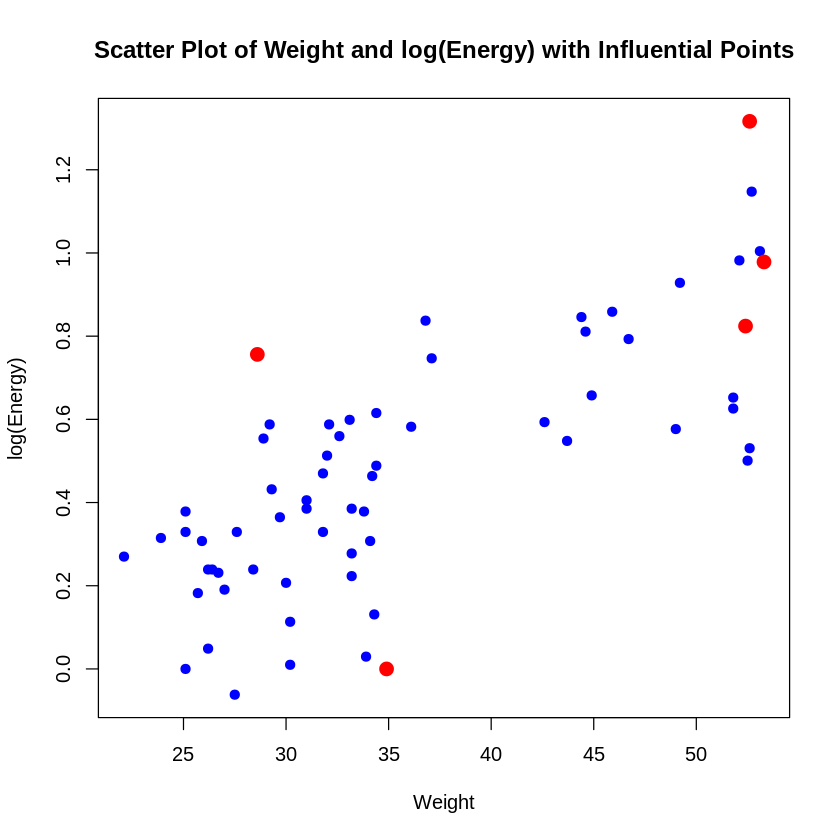

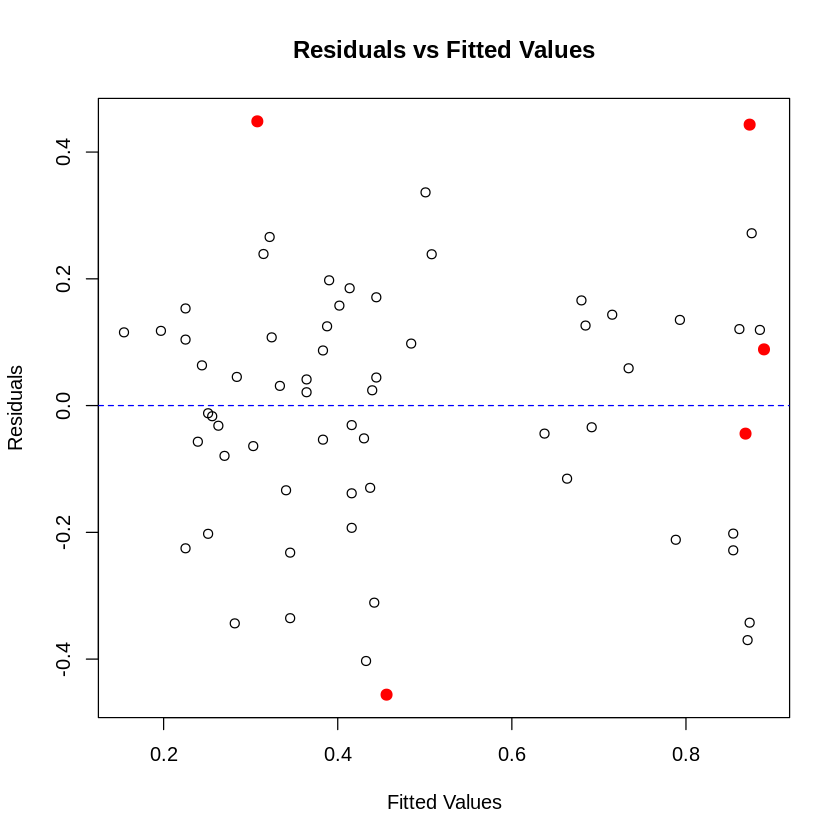

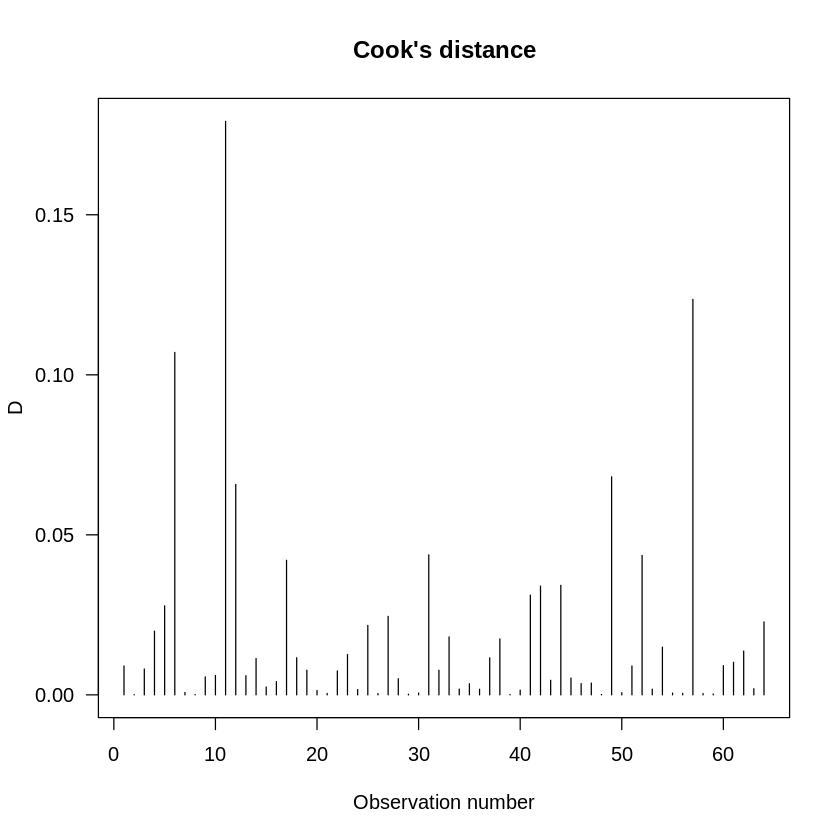

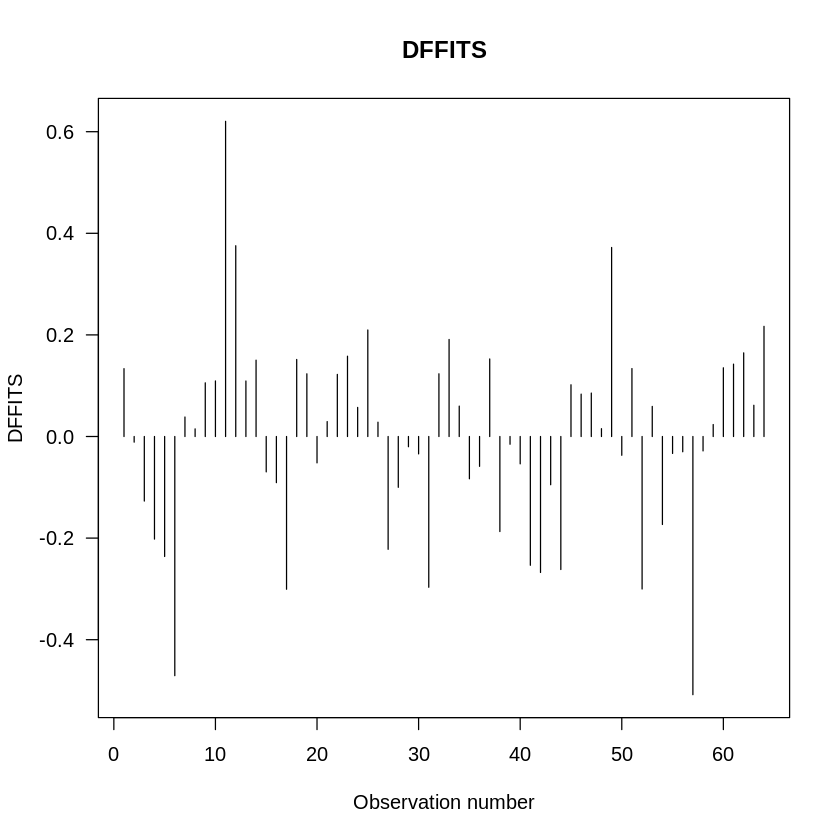

In [ ]:
# Đánh giá các quan sát có ảnh hưởng
m_log.im <- influence.measures(m_log)
colSums( m_log.im$is.inf )

# Lấy chỉ số hàng có ít nhất 1 giá trị TRUE
influential_obs_log <- which(apply(m_log.im$is.inf, 1, any))

# Xem chi tiết các quan sát này trong tập dữ liệu gốc
sheep[influential_obs_log, ]
round(m_log.im$infmat[influential_obs_log, ], 3)
m_log.im$is.inf[influential_obs_log, ]

#Biểu diễn các quan sát có ảnh hưởng
plot(sheep$Weight, log(sheep$Energy),
     xlab = "Weight",
     ylab = "log(Energy)",
     main = "Scatter Plot of Weight and log(Energy) with Influential Points",
     col = "blue",  # Màu các điểm không ảnh hưởng
     pch = 19)      # Hình dạng điểm

points(sheep$Weight[influential_obs_log], log(sheep$Energy)[influential_obs_log],
       col = "red",   # Màu đỏ cho các điểm có ảnh hưởng
       pch = 19,      # Hình dạng điểm
       cex = 1.5)     # Kích thước điểm lớn hơn một chút

#Biểu diễn độ lệch và giá trị ước lượng của quan sát có ảnh hưởng
plot(fitted(m_log), resid(m_log),
     xlab = "Fitted Values",
     ylab = "Residuals",
     main = "Residuals vs Fitted Values")

points(fitted(m_log)[influential_obs_log], resid(m_log)[influential_obs_log],
       col = "red",
       pch = 19,
       cex = 1.2)

abline(h = 0, col = "blue", lty = 2)

#Biểu đồ Cook's Distance và DFFITS
plot( cooks.distance( m_log ), type="h", main="Cook's distance",
ylab="D", xlab="Observation number", las=1 )

plot( dffits(m_log), type="h", main="DFFITS",
ylab="DFFITS", xlab="Observation number", las=1 )

In [ ]:
#So sánh hai mô hình

# AIC
c( "AIC (Energy)" = extractAIC(m)[2],
"        AIC (log-Energy)" = extractAIC(m_log)[2])

# BIC
k <- nobs(m) # The penalty to compute the BIC
c( "BIC (Energy)" = extractAIC(m, k=k )[2],
"        BIC (log-Energy)" = extractAIC(m_log, k=k )[2])

AIC (Energy)         AIC (log-Energy) 
               -126.6046                -203.4407

BIC (Energy)         BIC (log-Energy) 
               -2.604581               -79.440748

Cả AIC và BIC đều thấp hơn đối với mô hình sử dụng biến phụ thuộc là $log(Energy)$, cho thấy mô hình này có thể tốt hơn khi so sánh với mô hình hồi quy tuyến tính có biến phụ thuộc là Energy

In [ ]:
summary(m_log)


Call:
lm(formula = log(Energy) ~ Weight, data = sheep)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45609 -0.13072  0.02761  0.12537  0.44848 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.366236   0.098997  -3.699 0.000461 ***
Weight       0.023562   0.002665   8.842 1.39e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2009 on 62 degrees of freedom
Multiple R-squared:  0.5577,	Adjusted R-squared:  0.5506 
F-statistic: 78.19 on 1 and 62 DF,  p-value: 1.386e-12


Mô hình hồi quy tuyến tính được ước lượng với phương trình:

$$ log(Energy)= -0,366236 + 0,023562*Weight + \epsilon $$

**Diễn giải:**

**Hệ số chặn (Intercept): -0.366236**

Đây là giá trị của $log(Energy)$ khi Weight = 0. Tuy nhiên, cân nặng bằng 0 không có ý nghĩa thực tế, nên hệ số này chỉ mang tính tham chiếu.

**Hệ số của Weight (0.023562):**

Hệ số này có ý nghĩa thống kê với $𝑝 < 0,001$, cho thấy Weight có ảnh hưởng đáng kể đến log(Energy). Mỗi khi Weight tăng thêm 1 đơn vị (kg) thif $log(Energy)$ tăng khoảng 0.023562 đơn vị.

Để chuyển sang tỷ lệ phần trăm thay đổi của Energy, ta tính:
$ e^{0.023562} - 1 \approx 0.02385 \quad (2.39\%) $\. Nghĩa là: Khi cân nặng tăng thêm 1 kg, nhu cầu năng lượng tăng khoảng 2.39%.


**Độ phù hợp của mô hình:**

**Residual standard error: 0.2009**

Đây là độ lệch chuẩn của phần dư, thể hiện độ chính xác của dự đoán từ mô hình.

**Multiple R-squared: 0.5577**

Mô hình giải thích được khoảng 55.77% sự biến thiên của $log(Energy)$ từ biến Weight.

**Adjusted R-squared: 0.5506**

Giá trị này đã điều chỉnh cho số lượng biến trong mô hình, phù hợp khi đánh giá độ chính xác của mô hình với dữ liệu.

**F-statistic: 78.19, $p = 1.386 \times 10^{-12}$**

Giá trị F rất lớn và p-value rất nhỏ, cho thấy mô hình có ý nghĩa thống kê tổng thể.

# Bài 3.18 - Đinh Hải Lương & Bùi Thanh Mai


## Đề bài

A study [23] measured the body fat percentage and BMI of adults aged between 23 and 61 (Table 3.10; data set: `humanfat`).
1. Plot the data, distinguishing between males and females. Which assumptions, if any, appear to be violated?
2. Fit the linear regression model with systematic component `Percent.Fat ~ Age * Gender` to the data.
3. Write down the two systematic components corresponding to females and males.
4. Interpret each coefficient in this model.
5. Use a t-test to determine if the interaction term is significant.
6. Use an F-test to determine if the interaction term is significant.
7. Show that the P-values for the t- and F-tests are the same for the interaction term, and explain why. Also show that the square of the t-statistic is the F-statistic (within the limitations of computer arithmetic).
8. To the earlier plot, add the separate regression lines for males and females.
9. Compute and plot the 90% confidence intervals about the fitted values for both males and females, and comment
10. Argue that only using the females in the study is sensible. Furthermore, argue that only using females aged over 38 is sensible.
11. Using this subset of the data, find a model using `Age` and `BMI` as explanatory variables.
12. Using this model, compute Cook’s distance, leverages, Studentized residuals and standardized residuals to evaluate the model. Identify any outliers and influential observations, and discuss the differences between the Studentized and standardized residuals.

**Tiếng Việt**
1. Vẽ biểu đồ dữ liệu, phân biệt giữa nam giới và nữ giới. Những giả định nào bị vi phạm (nếu có)?
2. Ước lượng mô hình hồi quy tuyến tính với thành phần hệ thống là: `Percent.Fat ~ Age * Gender`
3. Viết hai thành phần hệ thống tương ứng cho nữ giới và nam giới.
4. Giải thích từng hệ số trong mô hình hồi quy này.
5. Sử dụng t-test để xác định liệu hệ số tương tác có ý nghĩa thống kê hay không.
6. Sử dụng F-test để kiểm tra xem liệu hệ số tương tác có ý nghĩa thống kê hay không.
7. Chứng minh rằng p-value của t-test và F-test là giống nhau cho hệ số tương tác và giải thích lý do tại sao. Đồng thời, chứng minh rằng bình phương của t-statistic chính là F-statistic (với hạn chế của tính toán số học trên máy tính).
8. Trên biểu đồ đã vẽ trước đó, thêm các đường hồi quy riêng biệt cho nam giới và nữ giới.
9. Tính toán và vẽ khoảng tin cậy 90% xung quanh các giá trị ước lượng cho nam giới và nữ giới, và đưa ra nhận xét.
10. Lập luận rằng chỉ sử dụng dữ liệu của nữ giới trong nghiên cứu này là hợp lý. Hơn nữa, lập luận rằng chỉ sử dụng dữ liệu của nữ giới trên 38 tuổi là hợp lý.
11. Sử dụng tập con dữ liệu này, xây dựng mô hình với Age và BMI là các biến giải thích.
12. Sử dụng mô hình này, tính toán Cook's distance, leverages, Studentized residuals and standardized residuals. Đánh giá mô hình và xác định các điểm ngoại lệ (outliers) và các quan sát có ảnh hưởng . So sánh sự khác nhau giữa Studentized residuals và standardized residuals.

## Đáp án

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data("humanfat")
d <- humanfat
str(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	18 obs. of  4 variables:
 $ Age        : int  23 23 27 27 39 41 45 49 50 53 ...
 $ Percent.Fat: num  9.5 27.9 7.8 17.8 31.4 25.9 27.4 25.2 31.1 34.7 ...
 $ Gender     : Factor w/ 2 levels "F","M": 2 1 2 2 1 1 2 1 1 1 ...
 $ BMI        : num  17.8 22.5 24.6 20.5 25.1 21.4 26 22.3 21.8 28.4 ...


**3.18, 1. Plot the data, distinguishing between males and females. Which assumptions, if any, appear to be violated?**

*Vẽ biểu đồ dữ liệu, phân biệt giữa nam giới và nữ giới. Những giả định nào bị vi phạm (nếu có)?*


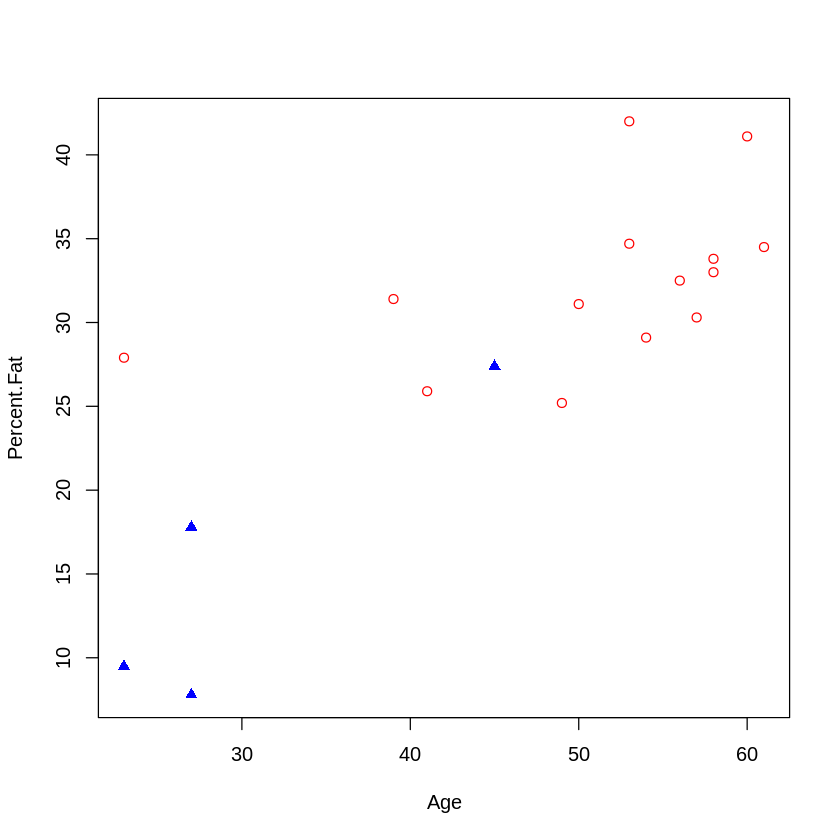

In [ ]:
Gender_colors <- ifelse(d$Gender=="F", "red", "blue")
Gender_pch <- ifelse(d$Gender=="F", 1, 17)
plot(Percent.Fat ~ Age, col=Gender_colors, pch=Gender_pch, data=d)

Nữ: Vòng tròn rỗng màu đỏ

Nam: Tam giác đầy màu xanh

Có thể thấy, có mối quan hệ tuyến tính giữa `Age` và `Gender` với `Percent.Fat`, nhưng phương sai của dữ liệu có thể không đồng nhất (heterogeneous) ở các nhóm khác nhau của Gender hoặc Age.

**3.18, 2. Fit the linear regression model with systematic component `Percent.Fat ~ Age * Gender` to the data.**

*Ước lượng mô hình hồi quy tuyến tính với thành phần hệ thống là: `Percent.Fat ~ Age * Gender`*

In [ ]:
m <- lm(Percent.Fat ~ Age*Gender, data=d)
m_sum <- summary(m)
m_sum


Call:
lm(formula = Percent.Fat ~ Age * Gender, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6756 -2.8862 -0.2464  1.9100  9.1641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  20.1116     6.2395   3.223  0.00613 **
Age           0.2401     0.1204   1.994  0.06600 . 
GenderM     -29.2692    10.4098  -2.812  0.01386 * 
Age:GenderM   0.5725     0.2893   1.978  0.06790 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.488 on 14 degrees of freedom
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.7591 
F-statistic: 18.86 on 3 and 14 DF,  p-value: 3.455e-05


**Mô hình hồi quy tuyến tính:**

`Percent.Fat` = 20.1116 + 0.2401⋅`Age` − 29.2692 ⋅ `GenderM` + 0.5725 ⋅ `Age⋅GenderM`

**Thành phần hệ thống cho từng nhóm:**

Nữ giới (GenderM = 0):

`Percent.Fat` = 20.1116 + 0.2401⋅`Age`

Nam giới (GenderM = 1):

`Percent.Fat` = 20.1116 + 0.2401⋅`Age` − 29.2692 ⋅ `GenderM` + 0.5725 ⋅ `Age⋅GenderM`

**Rút gọn:**

Nữ giới (GenderM = 0):

`Percent.Fat` = 20.1116 + 0.2401⋅`Age`

Nam giới (GenderM = 1):

`Percent.Fat` = -9.1576 + 0.8126 .`Age`

**3.18, 3. Write down the two systematic components corresponding to females and males.**

*Viết hai thành phần hệ thống tương ứng cho nữ giới và nam giới.*

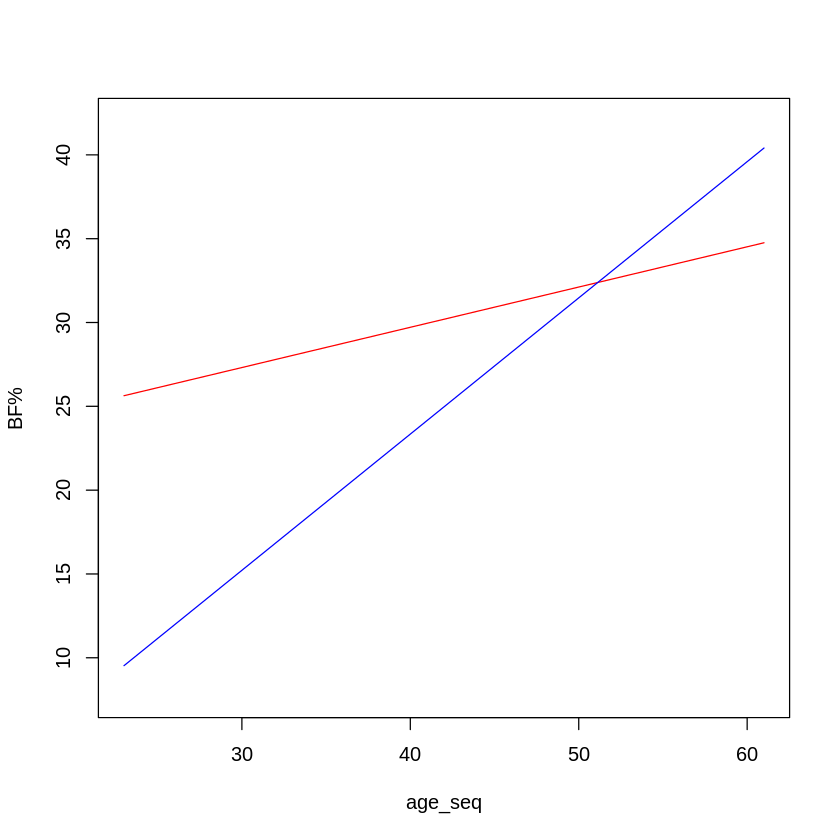

In [ ]:
age_seq <- seq(from=min(d$Age), to=max(d$Age), by=1) # Tạo một dãy giá trị tuổi từ min đến max với khoảng cách là 1

for_females <- coef(m_sum)[1] + coef(m_sum)[2]*age_seq
for_males <- for_females + coef(m_sum)[3] + coef(m_sum)[4]*age_seq

plot(for_females ~ age_seq, type="l", col="red", ylim=range(d$Percent.Fat), ylab="BF%")
lines(for_males ~ age_seq, col="blue")

**Đường màu đỏ**: Biểu diễn đường hồi quy dự đoán phần trăm mỡ cơ thể (Percent.Fat) cho nữ giới dựa trên tuổi.

**Đường màu xanh**: Biểu diễn đường hồi quy dự đoán phần trăm mỡ cơ thể cho nam giới dựa trên tuổi.

Hai đường cho thấy sự khác biệt giữa nam và nữ:

*   Nam giới có `Percent.Fat` thấp hơn nữ giới (đường màu xanh nằm dưới đường màu đỏ).
*   Nam giới có tốc độ tăng `Percent.Fat` theo tuổi nhanh hơn (do hệ số tương tác dương).

**3.18, 4. Interpret each coefficient in this model.**

*Giải thích từng hệ số trong mô hình hồi quy này.*

In [ ]:
m_sum


Call:
lm(formula = Percent.Fat ~ Age * Gender, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6756 -2.8862 -0.2464  1.9100  9.1641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  20.1116     6.2395   3.223  0.00613 **
Age           0.2401     0.1204   1.994  0.06600 . 
GenderM     -29.2692    10.4098  -2.812  0.01386 * 
Age:GenderM   0.5725     0.2893   1.978  0.06790 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.488 on 14 degrees of freedom
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.7591 
F-statistic: 18.86 on 3 and 14 DF,  p-value: 3.455e-05




1. Intercept (Hệ số chặn):
Intercept = 20.1116 ± 6.2395 (𝑝-value = 0.00613)

Ý nghĩa:

*   Khi `Age = 0` và `Gender = Female`, `Percent.Fat` trung bình được ước tính là 20.1116. Đây là giá trị phần trăm mỡ cơ thể giả định cho nữ giới khi tuổi bằng 0. Mặc dù trong thực tế, `Age = 0` (lúc mới sinh) không có ý nghĩa đối với người lớn, nhưng trong mô hình hồi quy, hệ số này vẫn tồn tại như một giá trị dự báo toán học.
*   p-value = 0.00613 cho thấy hệ số này có ý nghĩa thống kê, tức là khác 0 một cách đáng kể.

2. Age (Tác động của tuổi lên Percent.Fat):
Age = 0.2401 ± 0.1204 (𝑝-value = 0.06600)

Ý nghĩa:

*   Đối với nữ giới (nhóm tham chiếu), khi tuổi tăng thêm 1 năm, Percent.Fat tăng trung bình 0.2401 đơn vị.
*   p-value = 0.06600 cho thấy hệ số này chỉ có ý nghĩa ở mức 10% (không đủ mạnh ở mức ý nghĩa 5%).
Tuy nhiên, từ góc độ sinh lý học, có một xu hướng tự nhiên rằng phần trăm mỡ cơ thể tăng dần theo tuổi.

3. GenderM (Tác động của giới tính nam):

GenderM = −29.2692 ± 10.4098 (p-value = 0.01386)

Ý nghĩa:

*   Nam giới có Percent.Fat trung bình thấp hơn 29.2692 đơn vị so với nữ giới (nhóm tham chiếu), giữ nguyên các yếu tố khác (tuổi không đổi). Hệ số âm (-29.2692) cho thấy nam giới có phần trăm mỡ cơ thể ít hơn đáng kể so với nữ giới.
*   p-value = 0.01386 cho thấy sự khác biệt này có ý nghĩa thống kê ở mức 5%.

4. Age:GenderM (Tác động tương tác giữa tuổi và giới tính nam):
Age:GenderM  0.5725 ± 0.2893 (p-value = 0.06790)
Ý nghĩa:

*   Hệ số tương tác dương cho thấy tác động của tuổi lên phần trăm mỡ cơ thể lớn hơn ở nam giới so với nữ giới.
*   Tổng tác động của tuổi lên nam giới là:
0.2401(Age) +0.5725(Age:GenderM)=0.8126
Tức là, ở nam giới, khi tuổi tăng thêm 1 năm, phần trăm mỡ cơ thể tăng trung bình 0.8126 đơn vị.


Ví dụ:
Giá trị
𝑝
p-value = 0.06790 cho thấy hệ số này chỉ có ý nghĩa ở mức 10%.



**3.18, 5. Use a t-test to determine if the interaction term is significant.**

*Sử dụng t-test để xác định liệu hệ số tương tác có ý nghĩa thống kê hay không.*


In [ ]:
m_sum


Call:
lm(formula = Percent.Fat ~ Age * Gender, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6756 -2.8862 -0.2464  1.9100  9.1641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  20.1116     6.2395   3.223  0.00613 **
Age           0.2401     0.1204   1.994  0.06600 . 
GenderM     -29.2692    10.4098  -2.812  0.01386 * 
Age:GenderM   0.5725     0.2893   1.978  0.06790 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.488 on 14 degrees of freedom
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.7591 
F-statistic: 18.86 on 3 and 14 DF,  p-value: 3.455e-05


In [ ]:
t_beta <- (m_sum$coef["Age:GenderM", "Estimate"] - 0) / m_sum$coef["Age:GenderM", "Std. Error"]
t_beta

[1] 1.978474

**3.18, 6. Use an F-test to determine if the interaction term is significant.**


In [ ]:
(F_stat <- t_beta^2)
pf(F_stat,
   df1=1,
   df2=nrow(d)-4,
   lower.tail=FALSE)

[1] 3.914359

[1] 0.06789632

Sử dụng `anova` để thay thế.



In [ ]:
anova(m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,891.87365,891.87365,44.273608,1.089288e-05
Gender,1,168.78671,168.78671,8.378761,1.176673e-02
Age:Gender,1,78.85316,78.85316,3.914359,6.789632e-02
Residuals,14,282.02425,20.14459,NA,NA


# Bài 3.19 - Tào Lê Minh

#### Đề bài:

**English Version:**

A study of urethral length L and mass M of various mammals expected to find isometric scaling; that is, proportional relationships being
maintained as the size of animals increases. For these data (Table 3.11; data
set: urinationL) then, one postulated relationship is $L = kM^{1/3}$ for some proportionality constant k. By using a transformation, fit an appropriate
weighted linear regression model, and test the hypothesis using both a t-test
and an F -test. Interpret your model

**Tiếng Việt**

Một nghiên cứu về chiều dài niệu đạo L và khối lượng M của nhiều loại động vật được kì vọng cho thấy mối quan hệ isometric scaling, tức là mối quan hệ tỷ lệ được duy trì khi kích thước của động vật tăng lên. Với dữ liệu từ bảng 3.11, dataset: urinationL, mối quan hệ giả định được đưa ra là $L = kM^{1/3}$ với hằng số tỷ lệ $k$. Bằng cách sử dụng transformation, xây dựng weighted linear regression model và kiểm định giả thuyết bằng cả t-test và F-test.

### Đáp án

#### Transformation

Ta thấy mối quan hệ giả định có dạng hàm mũ $L = kM^{1/3}$ vì vậy ta sẽ thực hiện transformation bằng cách áp dụng hàm $log$ ở cả 2 vế.
$$log(L) = log(kM^{1/3})
\\ \implies log(L) = log(k) + log(M^{1/3})
\\ \implies log(L) = log(k) + \frac{1}{3}log(M)$$

Ở đây ta thấy mối quan hệ giữa L và M sau khi transformation đã trở thành mối quan hệ tuyến tính dạng $Y = AX + B$. Đặt $Y = log(L)$ và $X = log(M)$, mô hình trở thành:
$$Y = log(k) + \frac{1}{3}X$$

In [ ]:
system("sudo apt install libudunits2-dev")
install.packages("GLMsData", verbose=T, keep_outputs=T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

system (cmd0): /usr/lib/R/bin/R CMD INSTALL

foundpkgs: GLMsData, /tmp/Rtmp3qi86g/downloaded_packages/GLMsData_1.4.tar.gz

files: /tmp/Rtmp3qi86g/downloaded_packages/GLMsData_1.4.tar.gz



* installing *source* package ‘GLMsData’ ...
** package ‘GLMsData’ successfully unpacked and MD5 sums checked
** using staged installation
** data
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (GLMsData)


1): succeeded '/usr/lib/R/bin/R CMD INSTALL -l '/usr/local/lib/R/site-library' '/tmp/Rtmp3qi86g/downloaded_packages/GLMsData_1.4.tar.gz''



In [ ]:
library(GLMsData)

# Load the dataset
uni <- data("urinationL")

# Transform: Thêm 2 cột log(L) và log(M)
urinationL$log_M <- log(urinationL$Mass)
urinationL$log_L <- log(urinationL$Length)

head(urinationL)

,Animal,Sex,Mass,Length,SampleSize,log_M,log_L
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Mouse,F,0.02,10.0,1,-3.9120230,2.302585
2,Wister Rat,F,0.20,9.5,20,-1.6094379,2.251292
3,Rat,F,0.20,17.0,1,-1.6094379,2.833213
4,Sprague-Dawley Rat,F,0.30,20.0,61,-1.2039728,2.995732
5,Dunkin Hartley Guinea Pig,M,0.40,20.0,1,-0.9162907,2.995732
6,Normal Adult Cat,F,2.30,49.4,1,0.8329091,3.899950


#### Xây dựng mô hình Weighted Linear Regress Model

In [ ]:
model <- lm(log_L ~ log_M, data = urinationL, weights = urinationL$SampleSize)
summary(model)


Call:
lm(formula = log_L ~ log_M, data = urinationL, weights = urinationL$SampleSize)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.91075 -0.01707  0.14928  0.30587  1.06757 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.39500    0.04746   71.54   <2e-16 ***
log_M        0.44516    0.01231   36.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5761 on 45 degrees of freedom
Multiple R-squared:  0.9667,	Adjusted R-squared:  0.966 
F-statistic:  1307 on 1 and 45 DF,  p-value: < 2.2e-16


#### Kiểm định t-test:

Mục đích: kiểm tra độ dốc của đường hồi quy (hệ số $\beta_1$) của mô hình có phù hợp với mối quan hệ đã giả định (ở trường hợp này là $\frac{1}{3}$) hay không


Giả thuyết kiểm định:

*   $H_0$: $\beta_1 = \frac{1}{3}$
*   $H_α \neq \frac{1}{3}$

In [ ]:
# lấy hệ số góc
beta1 <- coef(model)["log_M"]

# lấy standard error
se_beta1 <- summary(model)$coefficients["log_M", "Std. Error"]

# Tính t-statistic
beta1_theory <- 1/3 # giá trị giả định
t_stat <- (beta1 - beta1_theory) / se_beta1

# Tính p-value
df <- nrow(urinationL) # Số bậc tự do
p_value <- 2 * pt(-abs(t_stat), df) # tính p_value

# So sánh với mức ý nghĩa 0.05
alpha <- 0.05
if (p_value < alpha) {
  cat("Bác bỏ H0: Hệ số góc khác 1/3")
} else {
  cat("Không bác bỏ H0")
}

Bác bỏ H0: Hệ số góc khác 1/3

#### Kiểm định F-test

Mục đích: đánh giá về tổng thể tính phù hợp của mô hình hồi quy. Cụ thể kiểm tra xem biến độc lập $log(M)$ có giải thích được phần lớn sự biến thiên của biến phụ thuộc $log(L)$ hay không.

Giả thuyết kiểm định:

*   $H_0$: $\beta_1 = 0$
*   $H_\alpha: \beta_1 \neq 0$

In [ ]:
# F-test
anova_model <- anova(model)
# print(anova_model)

# Tính giá trị F-statistic
F_stat <- anova_model$"F value"[1]
cat("F-statistic: ", F_stat, "\n")

# p-value của kiểm định F
p_value_f_stat <- anova_model$"Pr(>F)"[1]
cat("p_value: ", p_value_f_stat, "\n")

# So sánh với mức ý nghĩa
alpha <- 0.05
if (p_value_f_stat < alpha) {
  cat("Kết luận: Bác bỏ H0: Mô hình có ý nghĩa thống kê tổng thể.\n")
} else {
  cat("Kết luận: Không bác bỏ H0: Mô hình không có ý nghĩa thống kê tổng thể.\n")
}

F-statistic:  1306.672 
p_value:  6.801899e-35 
Kết luận: Bác bỏ H0: Mô hình có ý nghĩa thống kê tổng thể.


# Bài 3.20: Nguyễn Hồng Ngọc & Mai Trọng Nghĩa

[Bài 3.20](https://colab.research.google.com/drive/13sVokDAcYvVdhh90Ezr3MexH5Wx9hpbM#scrollTo=Bg1tzCav8-3w)